# Credit Risk Analyzer

#Problem Statement: The case study aims to determine the trends of whether a client's history is optimal or not using EDA.

#### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#### 2. Loading the data

In [2]:
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

#### 3. Checking the structure of the dataframes

In [3]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
df_app.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [5]:
df_app.shape

(307511, 122)

Note: Dataframe has 307511 rows and 122 coloumns

##### 3.1 Checking the data types, null values for df_app

In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Note: Datatypes look good, lot of null values in the columns

In [7]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### 4. Data quality and missing values validation and cleaning

In [8]:
df_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Note: Lots of columns with null values, changing the values to percentage and sorting for a better view

In [9]:
(df_app.isnull().sum()/len(df_app)*100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##### 4.1 Missing values

Note:<br>
* Taking the threshold of missing values as 40%
* Removing the columns where the missing values is more than the threshold

In [10]:
df_app = df_app.dropna(axis = 1, thresh= int(df_app.shape[0]*(1-0.4)))

In [11]:
df_app.shape

(307511, 73)

Obseration:<br>
* 49 Columns had null values more than 40%
* After removing the columns with null values more than 40%, we are left with 73 coloumns

In [12]:
round(df_app.isnull().sum()/len(df_app)*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

Note: From this we can see how many coloumns have null values greater 0% and deal with them accordingly

In [13]:
temp=df_app.columns[((df_app.isnull().sum()/len(df_app)*100) <= 40) & ((df_app.isnull().sum()/len(df_app)*100) > 0)]
print(temp)
print(len(temp))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


Observation: 
* Total of 18 columns are found with null values.
* We'll check for the outliers in the above for outliers if any.
* Althogh it is mentioned as to not to delete the data, we'll try and impute the columns.

##### 4.2 Going through the columns to check for outliers and imputing or deleting the columns

###### 4.2.1 AMT_ANNUITY

Note: It describes the Loan Annuity. Its a numerical column

In [14]:
df_app[df_app['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



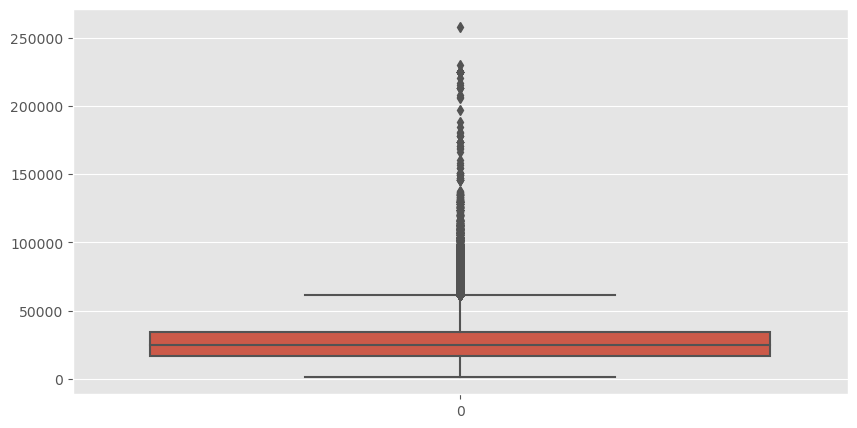

In [15]:
print(df_app['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df_app['AMT_ANNUITY'])
plt.show()

Observation:<br>
* Outliers present as 99th percentile is far off from the maximum value. As also seen in the boxplot
* We'll impute the median value 24903 in place of missing values


In [16]:
df_app['AMT_ANNUITY'] = df_app['AMT_ANNUITY'].fillna(df_app['AMT_ANNUITY'].median())

###### 4.2.2 AMT_GOODS_PRICE

Note: AMT_GOODS_PRICE is the price of goods against which loan is given. It's a numerical column

In [17]:
df_app[df_app['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64



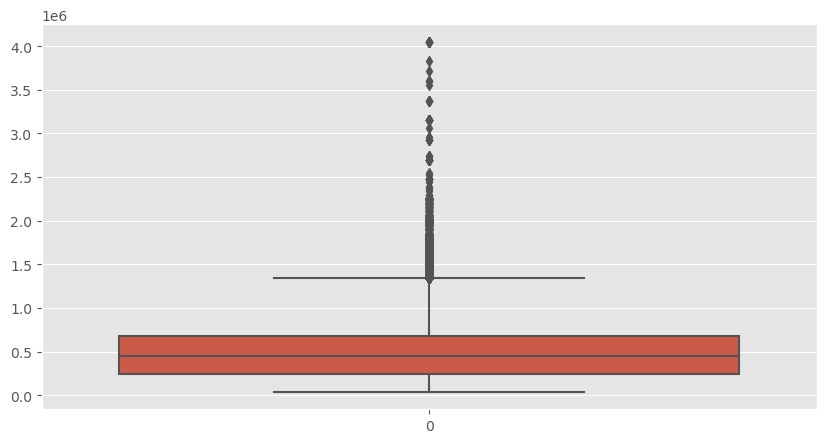

In [18]:
print(round(df_app['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2)) #rounding to 2
print()
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df_app['AMT_GOODS_PRICE'])
plt.show()

**Observation:**<br>
* Outliers present as 99th percentile is far off from the maximum value. As also seen in the boxplot.
* Using median value 4,50,000 the missing values can be imputed with.

In [19]:
df_app['AMT_GOODS_PRICE'] = df_app['AMT_GOODS_PRICE'].fillna(df_app['AMT_GOODS_PRICE'].median())

###### 4.2.3 NAME_TYPE_SUITE

**Note:** It's a categorical column with 0.42% of missing values.

In [20]:
df_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [21]:
df_app['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

**Observation:**<br>
* As NAME_TYPE_SUITE has majority of 'Unaccompanied' as user entries, we can make the assumption that the null values are the customers who were unaccompanied at the time of applying the loan.
* We can use 'Unaccompanied' to impute the missing values.

In [22]:
df_app['NAME_TYPE_SUITE'] = df_app['NAME_TYPE_SUITE'].fillna('Unaccompanied')

###### 4.2.4 OCCUPATION_TYPE

OCCUPATION_TYPE is a categorical column

In [23]:
df_app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [24]:
df_app['OCCUPATION_TYPE'].mode()[0]

'Laborers'

**Observation:**<br>
* Most of the loan applicants are Laborers.
* We can't use Laborers to impute the Occupation.
* We can create 'Other' category for the missing values.

In [25]:
df_app['OCCUPATION_TYPE'].fillna(value = 'Other', inplace = True)

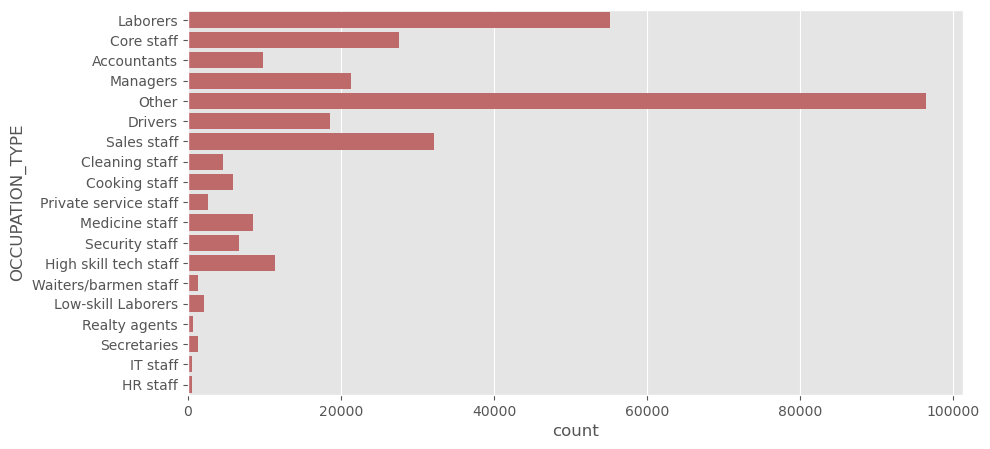

In [26]:
plt.figure(figsize=[10,5])
sns.countplot(data = df_app, y = "OCCUPATION_TYPE", color = "indianred")
plt.show()

###### 4.2.5 CNT_FAM_MEMBERS

**Note:** CNT_FAM_MEMBERS is a numerical column about how many family members the applicant has.

In [27]:
df_app['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [28]:
df_app[df_app['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0         450000.0   Unaccompanied  Commercial associate   
187348      29250.0         450000.0   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                       3.0                       0.0   
187348      0.670652                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                   -876.0                0                0   
187348                  -654.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15  FLA

count    307509.00
mean          2.15
std           0.91
min           1.00
10%           1.00
25%           2.00
50%           2.00
75%           3.00
99%           5.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64



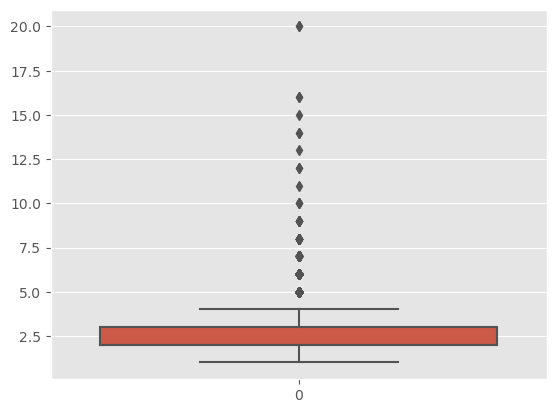

In [29]:
print(round(df_app['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(df_app['CNT_FAM_MEMBERS'])
plt.show()

**Observations:**<br>
* There can be many members in a family. Even being outliers, these numbers are not wrong.
* There are only 2 entries with null values, we can drop them but it will not make any difference in the analysis.
* We'll change the 'Unknown' to 'Married' as the number of married applicants is the maximum.

In [30]:
df_app['NAME_FAMILY_STATUS'] = df_app['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)
df_app['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

###### 4.2.6 EXT_SOURCE_2

**Note**: Normalized score from external data source. It's a numerical column with missing values at .21%

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64



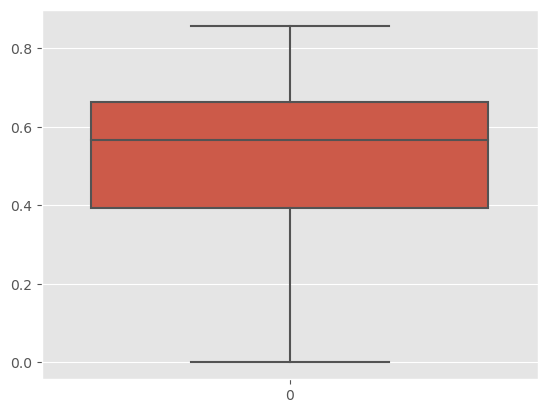

In [31]:
print(round(df_app['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(df_app['EXT_SOURCE_2'])
plt.show()

**Observation**:<br>
* There are no outliers in EXT_SOURCE_2.
* The missing values can be imputed with mean.

In [32]:
df_app['EXT_SOURCE_2'] = df_app['EXT_SOURCE_2'].fillna(df_app['EXT_SOURCE_2'].mean())

###### 4.2.7 EXT_SOURCE_3

Note: Normalized score from external data source. It's a numerical column with missing values at 19.83%

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64



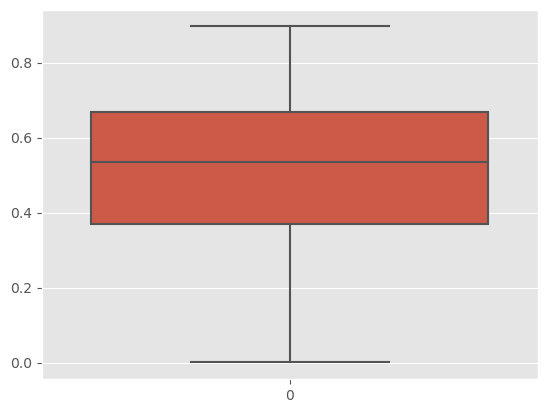

In [33]:
print(round(df_app['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),4))
print()
sns.boxplot(df_app['EXT_SOURCE_3'])
plt.show()

**Observation**:<br>
* There are no outliers in EXT_SOURCE_3.
* There's a high number of missing values.
* We can drop the coulmn as we can refer to EXT_SOURCE_2.

In [34]:
df_app = df_app.drop(columns=['EXT_SOURCE_3'])

###### 4.2.8 OBS_30_CNT_SOCIAL_CIRCLE

Note: OBS_30_CNT_SOCIAL_CIRCLE is number of observation of client's social surroundings with observable 30 DPD (days past due) default. Numerical column

count    306490.00
mean          1.42
std           2.40
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



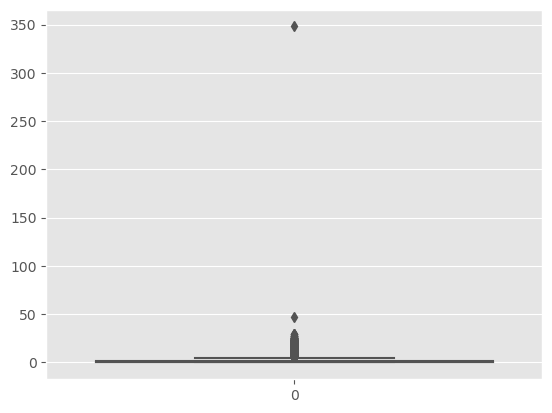

In [35]:
print(round(df_app['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(df_app['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations:**<br>
* Outliers present in OBS_30_CNT_SOCIAL_CIRCLE.
* Mean and median are very close, we use any to impute the missing values. Using median here.

In [36]:
df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_app['OBS_30_CNT_SOCIAL_CIRCLE'].median())

###### 4.2.8 DEF_30_CNT_SOCIAL_CIRCLE

Note: DEF_30_CNT_SOCIAL_CIRCLE is the number of observation of client's social surroundings defaulted on 30 DPD (days past due). It's a numerical column

count    306490.00
mean          0.14
std           0.45
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           0.00
99%           2.00
max          34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64



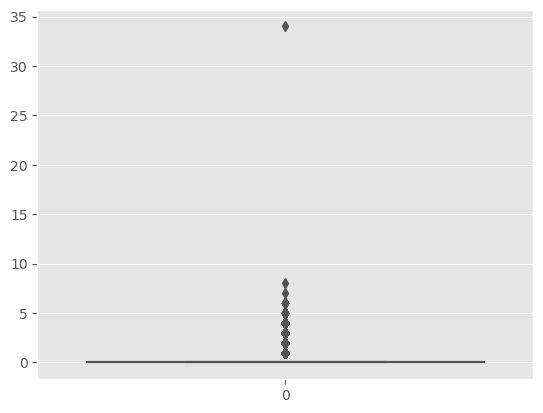

In [37]:
print(round(df_app['DEF_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(df_app['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations:**<br>
* There are ouliers in DEF_30_CNT_SOCIAL_CIRCLE.
* Using median to impute the missing values.

In [38]:
df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_app['DEF_30_CNT_SOCIAL_CIRCLE'].median())

###### 4.2.9 OBS_60_CNT_SOCIAL_CIRCLE

Note: OBS_60_CNT_SOCIAL_CIRCLE is the number of observation of client's social surroundings with observable 60 DPD (days past due) default. It's a numerical column

count    306490.00
mean          1.41
std           2.38
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           2.00
99%          10.00
max         344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64



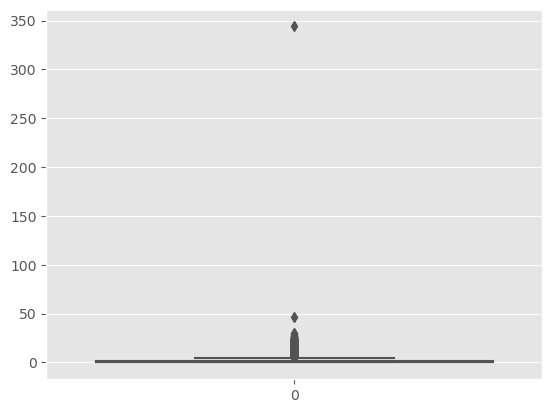

In [39]:
print(round(df_app['OBS_60_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(df_app['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations:**<br>
* There are outliers in OBS_60_CNT_SOCIAL_CIRCLE.
* Using median to impute the missing values.

In [40]:
df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_app['OBS_60_CNT_SOCIAL_CIRCLE'].median())

###### 4.2.10 DEF_60_CNT_SOCIAL_CIRCLE

Note: DEF_60_CNT_SOCIAL_CIRCLE is the number of observation of client's social surroundings defaulted on 60 (days past due) DPD. Its a numerical column

count    306490.00
mean          0.10
std           0.36
min           0.00
10%           0.00
25%           0.00
50%           0.00
75%           0.00
99%           2.00
max          24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64



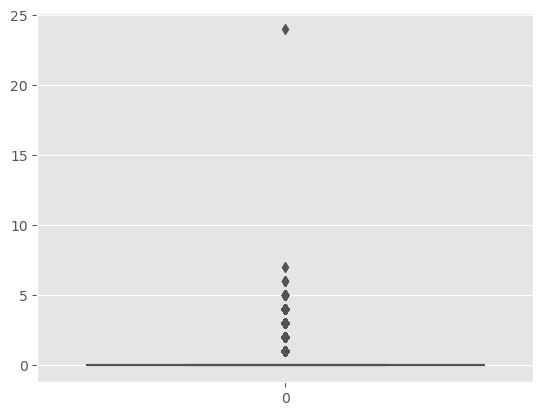

In [41]:
print(round(df_app['DEF_60_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]),2))
print()
sns.boxplot(df_app['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations**:<br>
* There are outliers in DEF_60_CNT_SOCIAL_CIRCLE.
* Using median to impute the missing values.

In [42]:
df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_app['DEF_60_CNT_SOCIAL_CIRCLE'].median())

###### 4.2.11 DAYS_LAST_PHONE_CHANGE

Note: The number of days before application did client change phone. 

In [43]:
print(df_app['DAYS_LAST_PHONE_CHANGE'].describe())
print()
print(df_app['DAYS_LAST_PHONE_CHANGE'].value_counts().head())
print()
print(df_app['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True).head())

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

DAYS_LAST_PHONE_CHANGE
 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: count, dtype: int64

DAYS_LAST_PHONE_CHANGE
 0.0    0.122507
-1.0    0.009144
-2.0    0.007538
-3.0    0.005733
-4.0    0.004179
Name: proportion, dtype: float64


**NOTE** Days cannot be in negative. Converting negative to positive and days to years for better understanding.

In [44]:
df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x < 0 else x)
print(df_app['DAYS_LAST_PHONE_CHANGE'].describe())

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


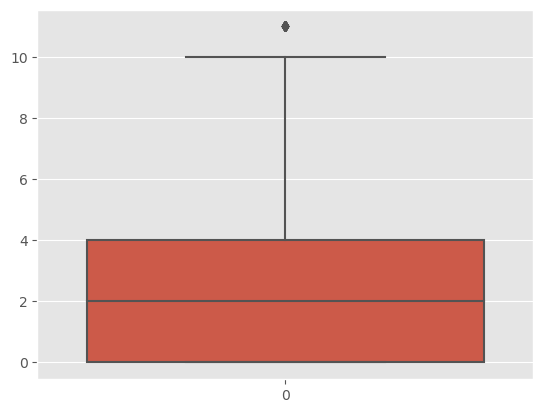

In [45]:
df_app['YEARS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: (x//365))
print(df_app['YEARS_LAST_PHONE_CHANGE'].describe())
sns.boxplot(data=df_app['YEARS_LAST_PHONE_CHANGE'])
plt.show()

**Observations:**
* Outliers at 11.
* Minimum years for changing the phone is 0.
* Mean for changing the phone is 2 years.
* Majority of clients changing the phone lies in 0-4 years.
* We can impute the data with 0 as no information or they haven't changed the phone yet.

In [46]:
df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].fillna(0)

###### 4.2.12 AMT_REQ_CREDIT_BUREAU

Note: Columns with number of enquiries to Credit Bureau are <br>
1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QRT,
3. AMT_REQ_CREDIT_BUREAU_MON,
4. AMT_REQ_CREDIT_BUREAU_WEEK,
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR


* These are numerical columns
* Missing percentage values is 13.50%

In [47]:
df_app[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
10%                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
99%                      8.000000                   2.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
10%                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
99%                     4.000000                    1.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
10%                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
99%                     0.000000                    0.000000  
max                     9.000000                    4.000000

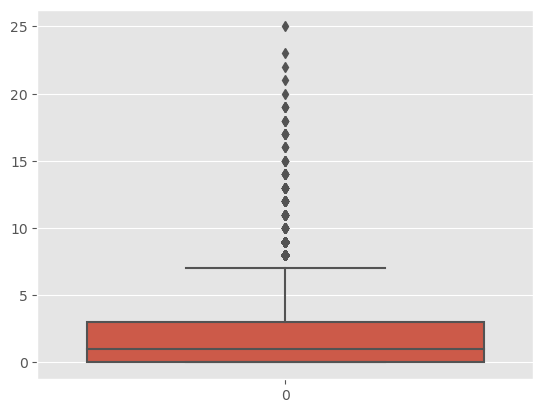

In [48]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()


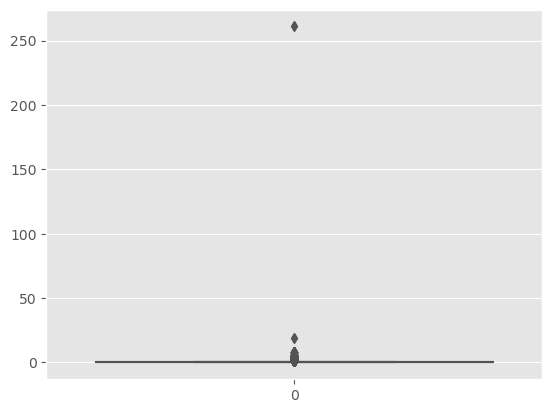

In [49]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

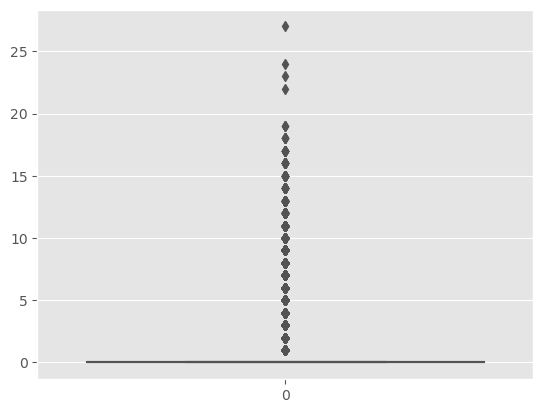

In [50]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

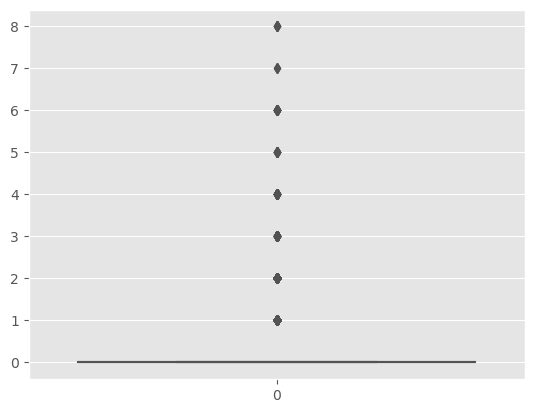

In [51]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.show()

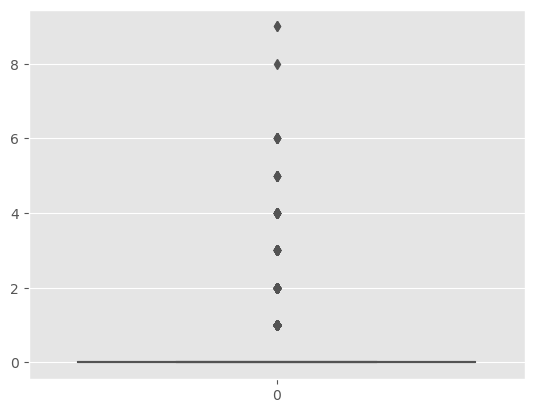

In [52]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

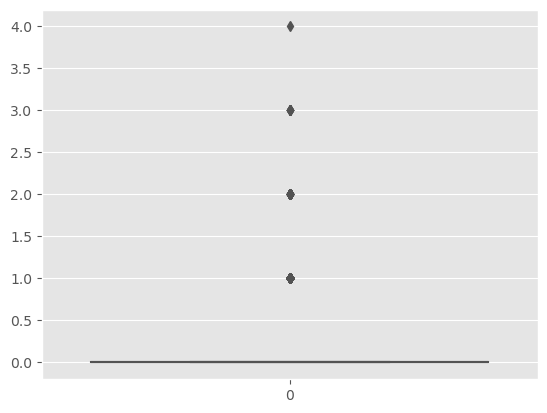

In [53]:
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [54]:
df_app[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0

**Observations:**<br>
* There are outliers in number of enquiries to Credit Bureau.
* The most occuring is 0 number of enquiries.
* The percentage of missing values is 13.50%. 
* Not imputing the missing values.

#### 4.3 Unknown Data Values

Checking the columns like Code_Gender, Days_Birth and NAME_FAMILY_STATUS 

###### 4.3.1 Code_Gender

Note: Gender can only be male or female.

In [55]:
df_app['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

**Observation**:<br>
<ol>
    <li>There can only be two genders F and M.</li>
    <li>XNA is unknown, which is more likely to missed while entering details</li>
    <li>As the number of females are more, we can impute XNA with F(only 4 more).</li>

In [56]:
df_app['CODE_GENDER'] = df_app['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
df_app['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

###### 4.3.2 Days_Birth

In [57]:
df_app['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

NOTE: Days of birth cannot be negative. Also will convert days to years for better understanding.

In [58]:
df_app['DAYS_BIRTH'] = df_app['DAYS_BIRTH'].apply(lambda x: abs(x) if x < 0 else x)
df_app['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


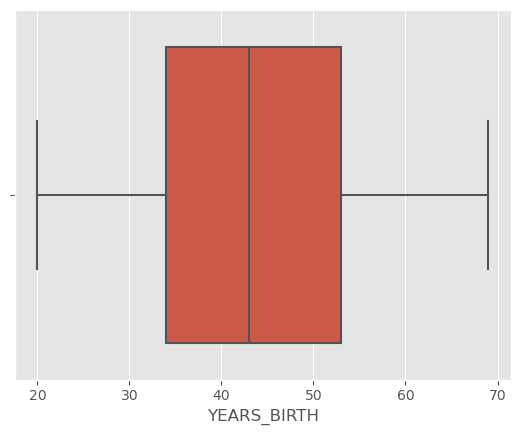

In [59]:
df_app['YEARS_BIRTH'] = df_app['DAYS_BIRTH'].apply(lambda x: (x//365))
print(df_app['YEARS_BIRTH'].describe())
sns.boxplot(data=df_app, x ='YEARS_BIRTH')
plt.show()

**Observations:**<br>
* Minimum Age of applicant is 20 years.
* Majority of the applicants are between 35 and 55 years of age.
* Max age of applicant is 69 years.
* Mean and median are very close to each other.

###### 4.3.3 DAYS_EMPLOYED

In [60]:
df_app['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

NOTE: Days of Employment cannot be negative. Also will convert days to years for better understanding.

In [61]:
df_app['DAYS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x < 0 else x)


In [62]:
df_app['YEARS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].apply(lambda x: (x//365))
print(df_app['YEARS_EMPLOYED'].describe())
print()
print(df_app['YEARS_EMPLOYED'].value_counts().head())
print()
print(df_app['YEARS_EMPLOYED'].value_counts(normalize=True).head())

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

YEARS_EMPLOYED
1000    55374
1       31841
2       29648
0       27904
3       25107
Name: count, dtype: int64

YEARS_EMPLOYED
1000    0.180072
1       0.103544
2       0.096413
0       0.090741
3       0.081646
Name: proportion, dtype: float64


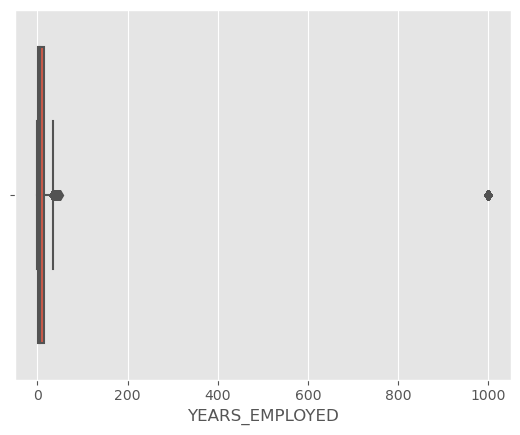

In [63]:
sns.boxplot(data=df_app, x='YEARS_EMPLOYED')
plt.show()

**Observations:**<br>
* Min Years Employed is 0.
* Max years employed is 1000, which is imposible.
* 18% of the data is of 1000 years of employed.
* Outliers in the data.

Let's check the income type of those for which data is showing as 1000 years of employment.

In [64]:
df_app[df_app['YEARS_EMPLOYED'] == 1000].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

**Observations:**<br>
* For pensioner and umemployed applicants, the years employed has been taken as 1000 years.
* We need to consider this while analysing otherwise the analysis can be off.

###### 4.3.4 DAYS_REGISTRATION

NOTE: How many days before the application did client change his registration

In [65]:
print(df_app['DAYS_REGISTRATION'].describe())
print()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64



**Note:** Days of registration cannot be negative. Chaning days to years for better understanding.

In [66]:
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x < 0 else x)
print(df_app['DAYS_REGISTRATION'].describe())

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


In [67]:
df_app['YEARS_REGISTRATION']=df_app['DAYS_REGISTRATION'].apply(lambda x:x//365)

In [68]:
df_app['YEARS_REGISTRATION'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64

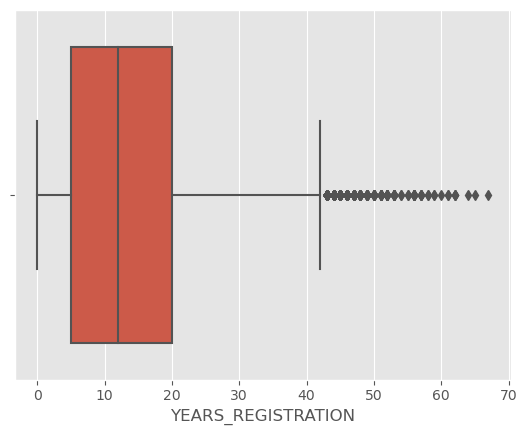

In [69]:
sns.boxplot(data=df_app, x='YEARS_REGISTRATION')
plt.show()

**Observation**<br>
* Min years_registration is 0.
* Max years_registration is 67.
* Outliers are present in the data, but are not wrong.

###### 4.3.5 DAYS_ID_PUBLISH

How many days before the application did client change the identity document with which he applied for the loan

In [70]:
df_app['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

**Note:** 
* Days cannot be negative.
* Changing days to years for better understanding.

In [71]:
df_app['DAYS_ID_PUBLISH'] = df_app['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x < 0 else x)
print(df_app['DAYS_ID_PUBLISH'].describe())

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


In [72]:
df_app['YEARS_ID_PUBLISH']=df_app['DAYS_ID_PUBLISH'].apply(lambda x:x//365)
df_app['YEARS_ID_PUBLISH'].describe()

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64

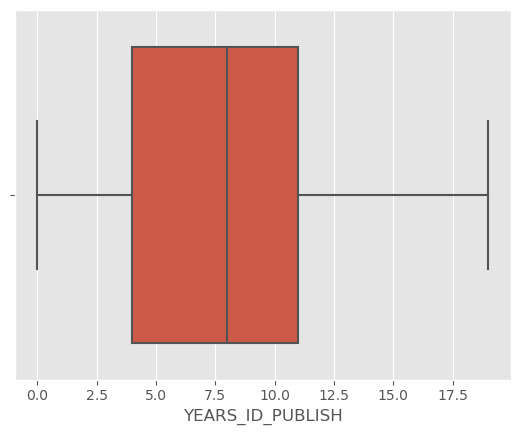

In [73]:
sns.boxplot(data=df_app, x='YEARS_ID_PUBLISH')
plt.show()

**Observation:**<br>
* Min ID change years is 0.
* Max ID change years is 19.
* No outliers present.

###### 4.3.6 DAYS_LAST_PHONE_CHANGE

How many days before application did client change phone

In [74]:
df_app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307511.000000
mean        962.855657
std         826.808966
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Note: Converting days to years for better understanding.

In [75]:
df_app['YEARS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: (x//365))
df_app['YEARS_LAST_PHONE_CHANGE'].describe()

count    307511.000000
mean          2.225107
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

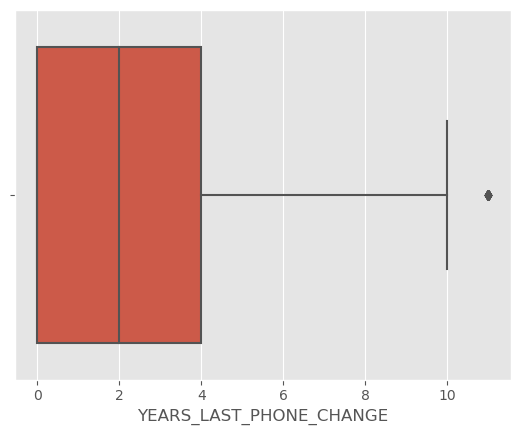

In [76]:
sns.boxplot(data=df_app, x='YEARS_LAST_PHONE_CHANGE')
plt.show()

**Observation:**<br>
* Min years for the last phone change is 0.
* Outlier present at 11.
* Most applicants changed phone in 0-4 years.

## 5. Data Analysis

### 5.1 Target

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

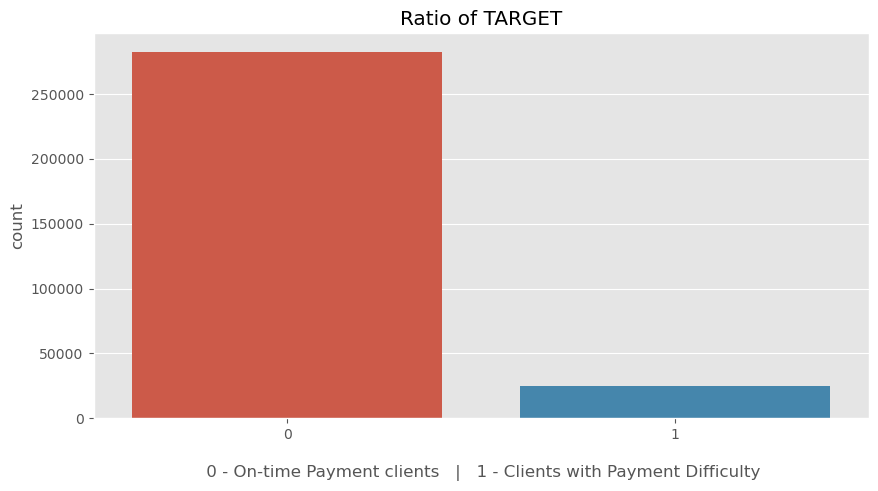

In [77]:
plt.figure(figsize = [10,5])
sns.countplot(data=df_app, x='TARGET')
plt.title("Ratio of TARGET")
plt.xlabel("\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty")
plt.show()

In [78]:
df_app[df_app.TARGET==0].shape[0]/df_app[df_app.TARGET==1].shape[0]

11.387150050352467

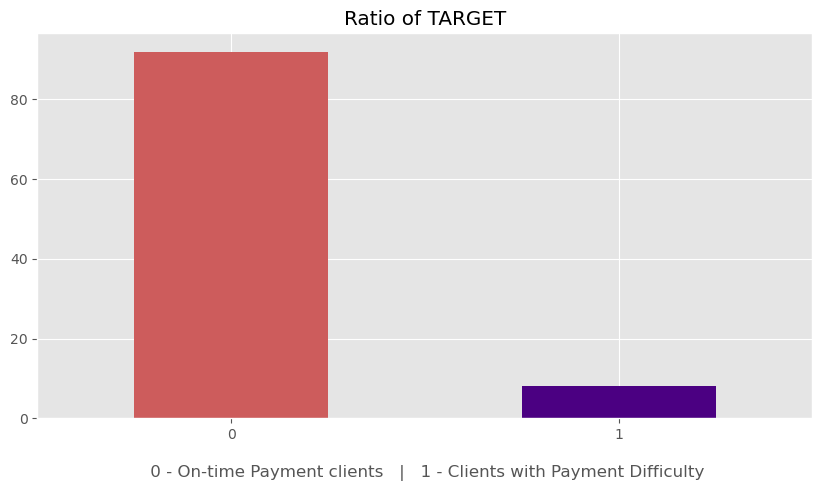

In [79]:
plt.figure(figsize = [10,5])
(df_app['TARGET'].value_counts(normalize=True)*100).plot.bar(color=['indianred', 'indigo'])
plt.title("Ratio of TARGET")
plt.xticks(rotation = 0)
plt.xlabel("\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty")
plt.show()

**Observation:**<br>
* 1 in 11 clients have payment difficulty.

#### 5.1.1 Deep Dive into TARGET column

In [80]:
df_app['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [81]:
df_app['TARGET'].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

**Observation:**<br>
* 91.92% clients make on time payments.
* 8.07% clients face difficulties with on time payments.

**Note**<br>
Spliting the Target column into 2 for better analysis.

In [82]:
tar0 = df_app[df_app['TARGET'] == 0]
tar1 = df_app[df_app['TARGET'] == 1]

### 5.2 Univariate Analysis

Creating a list for all object columns.

In [83]:
obj_col=list(df_app.columns[df_app.dtypes=="object"])
obj_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [84]:
for i in obj_col:
    print("--------------------------------------------------")
    print(f"{i} for clients with payment difficulties")
    print(tar1[i].value_counts().sort_values(ascending = False))
    print(f"\n{i} for on-time payment clients")
    print(tar0[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payment difficulties
NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: count, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
NAME_CONTRACT_TYPE
Cash loans         255011
Revolving loans     27675
Name: count, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payment difficulties
CODE_GENDER
F    14170
M    10655
Name: count, dtype: int64

CODE_GENDER for on-time payment clients
CODE_GENDER
F    188282
M     94404
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payment difficulties
FLAG_OWN_CAR
N    17249
Y     7576
Name: count, dtype: int64

FLAG_OWN_CAR for on-time payment clients
FLAG_OWN_CAR
N    185675
Y     97011
Name: count, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payment difficulties
FLAG_OWN_REALTY

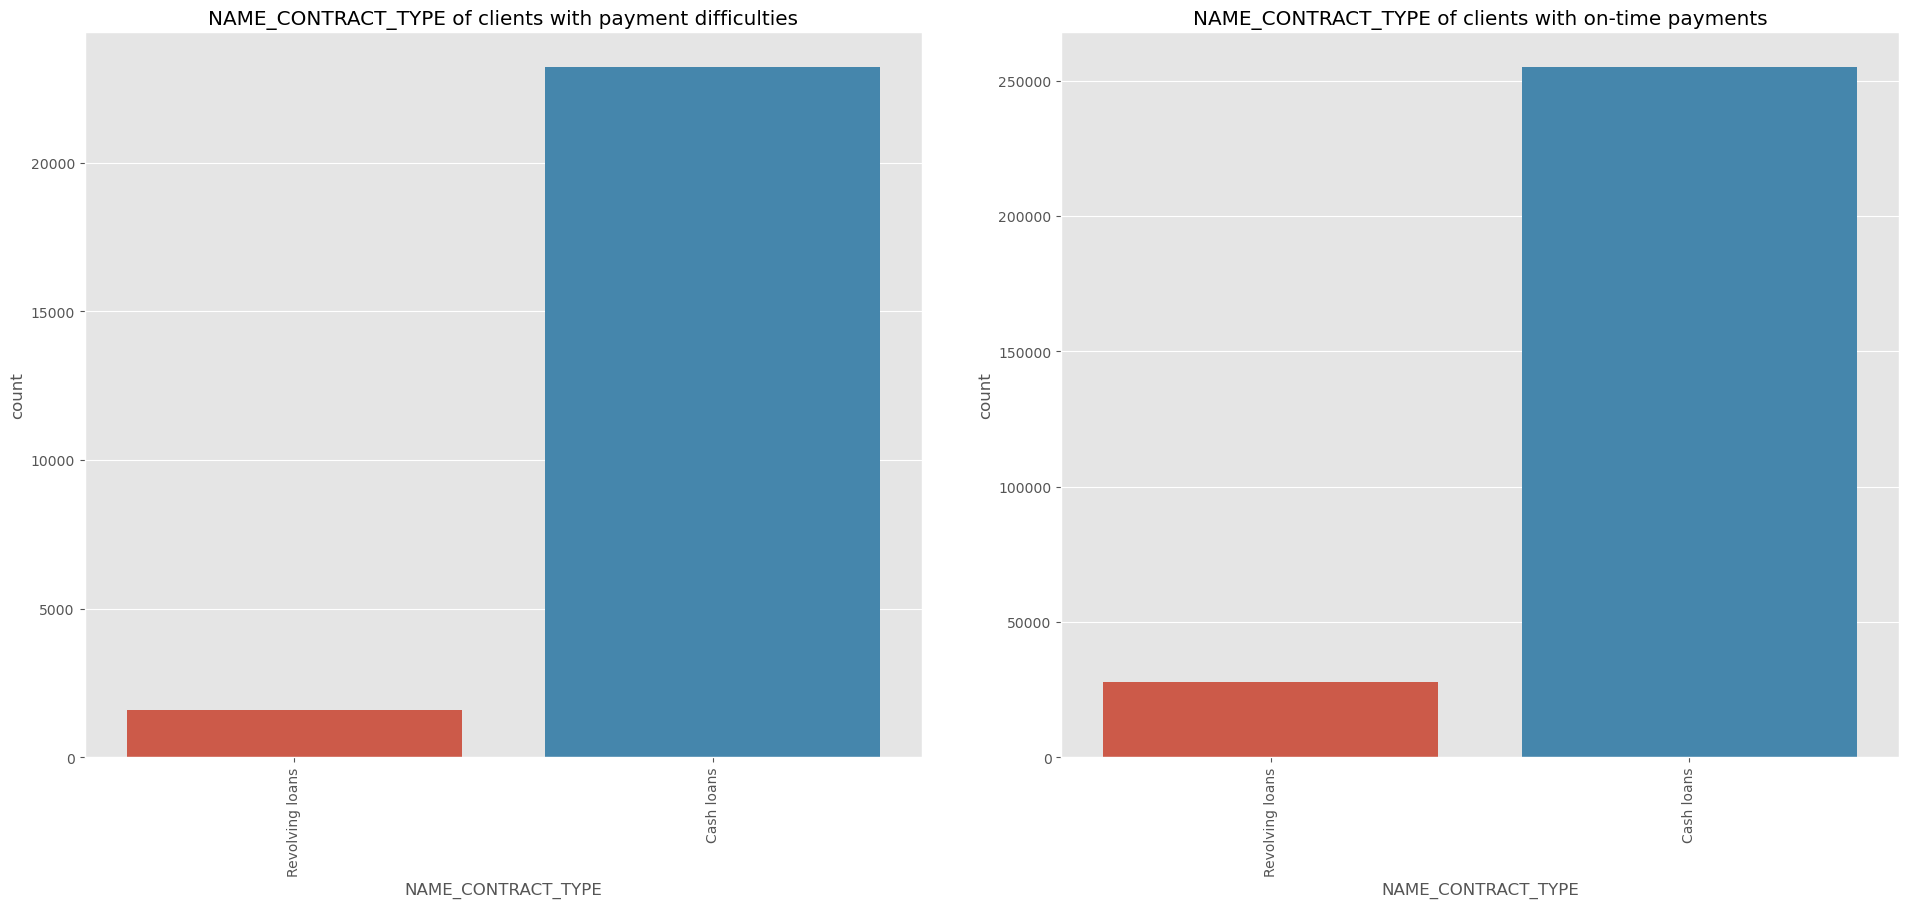

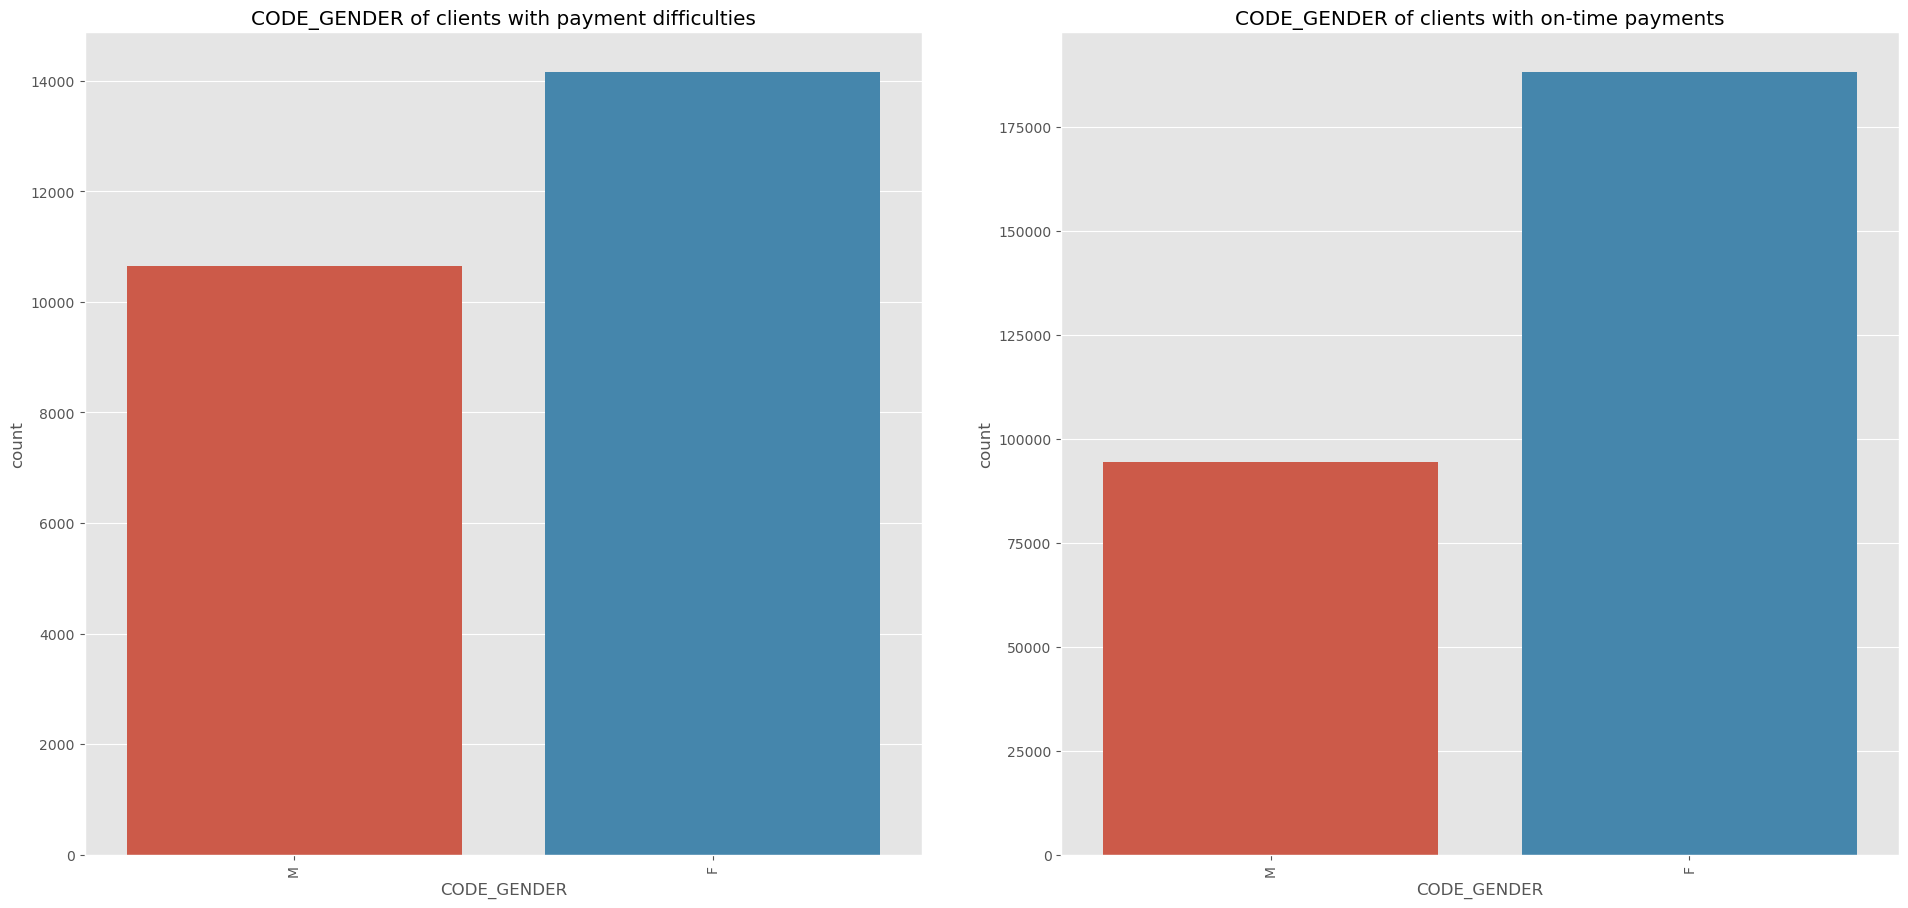

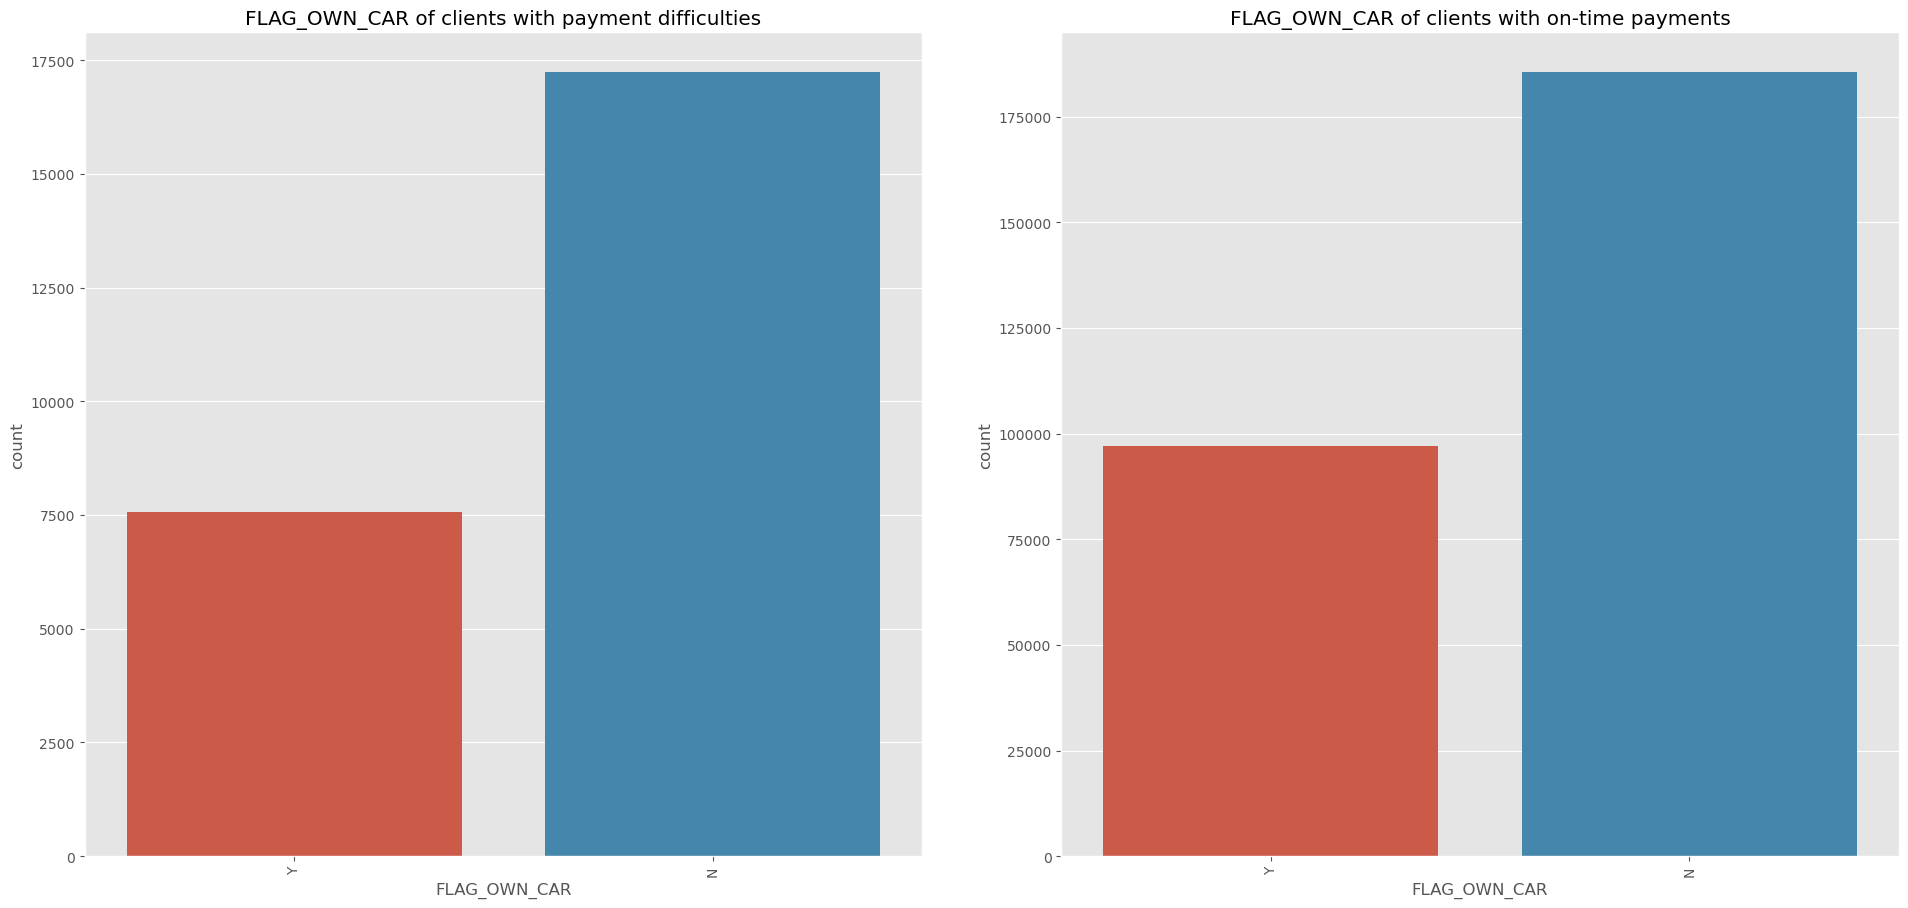

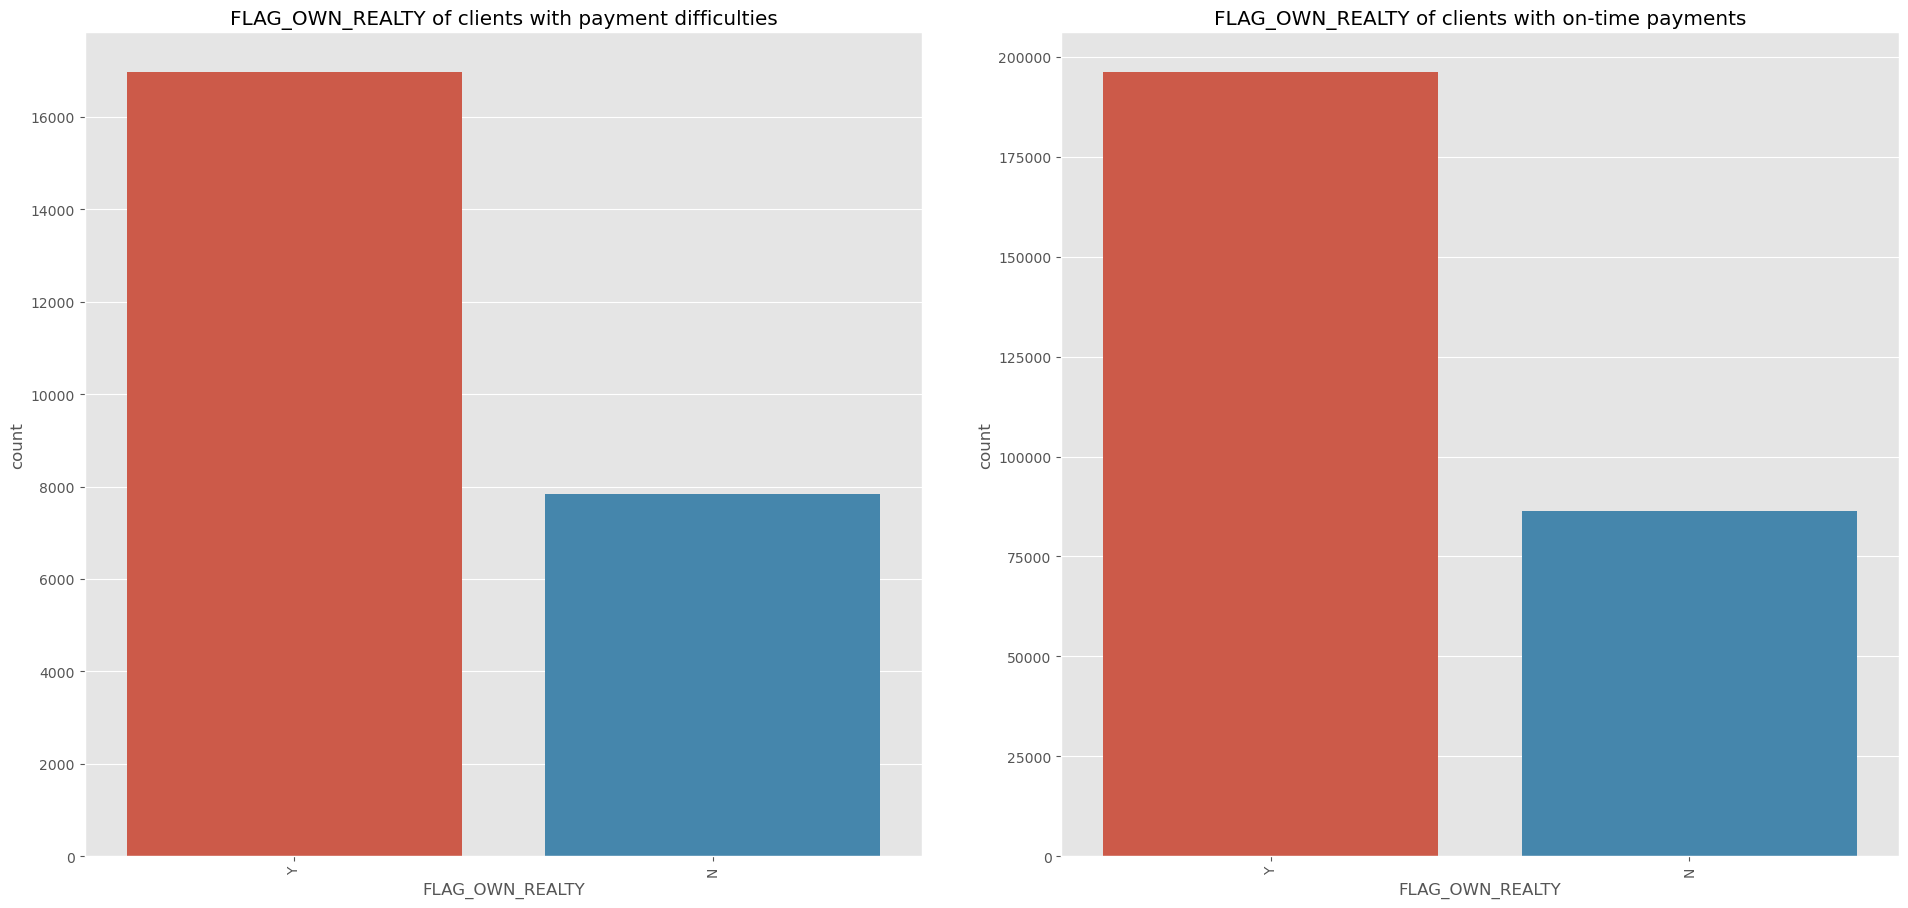

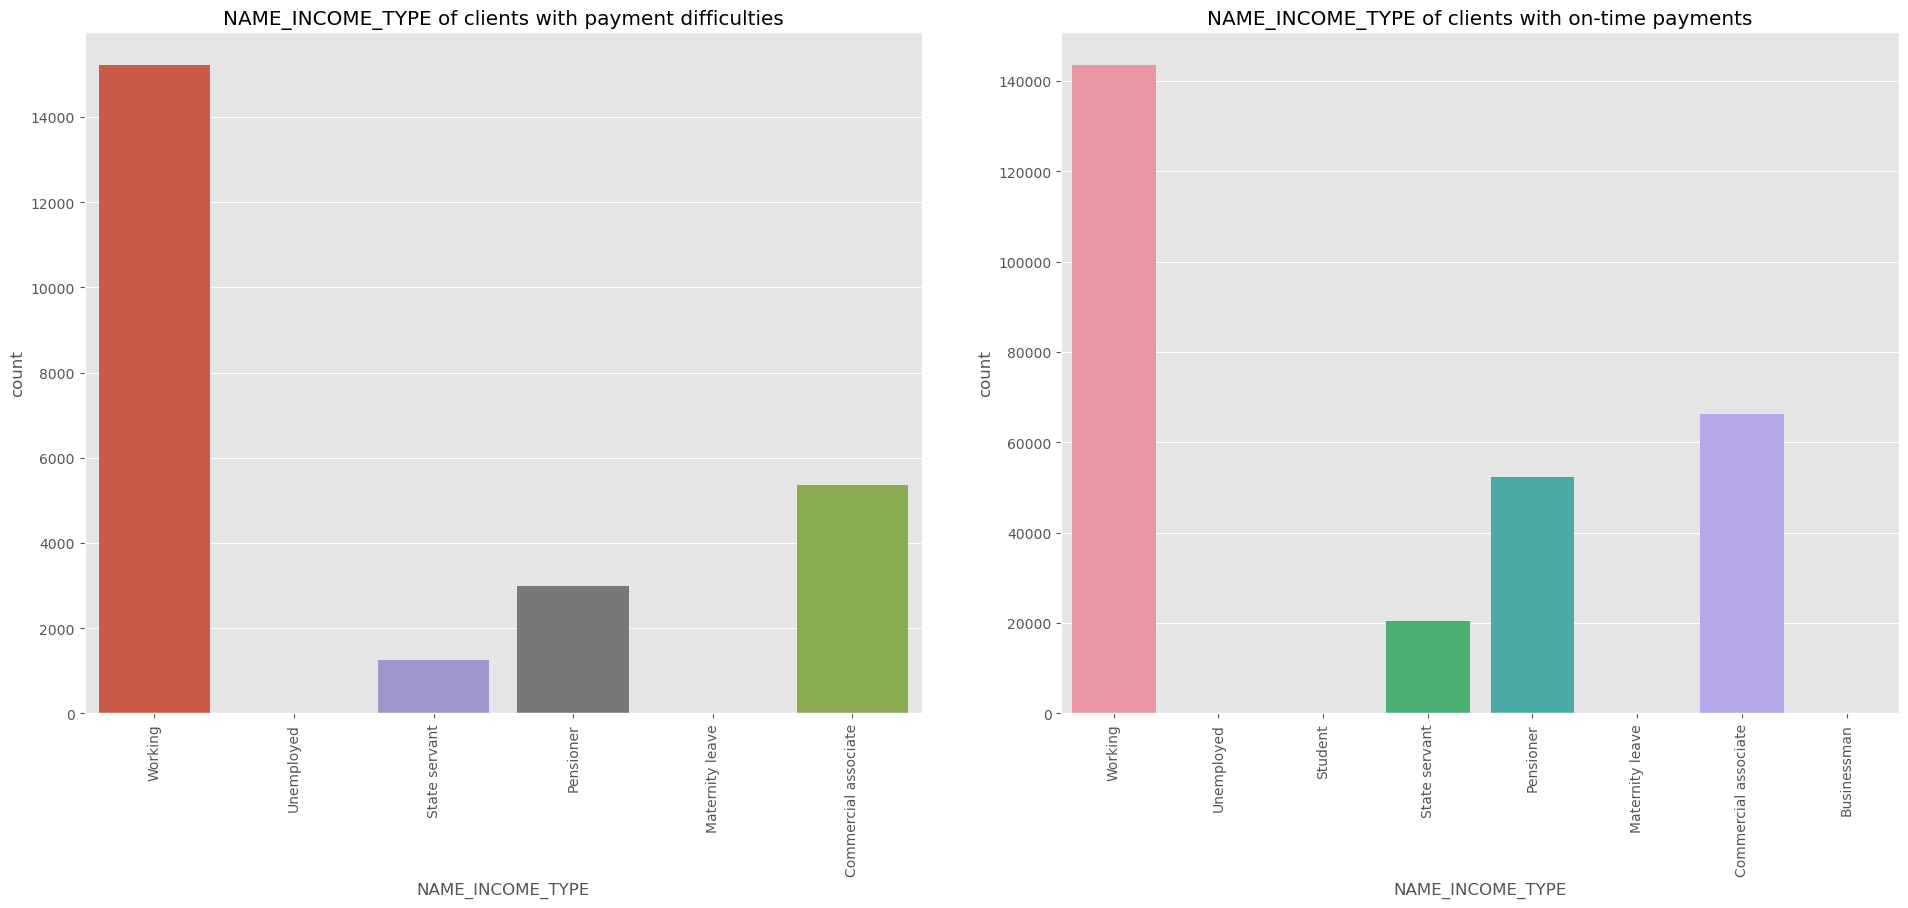

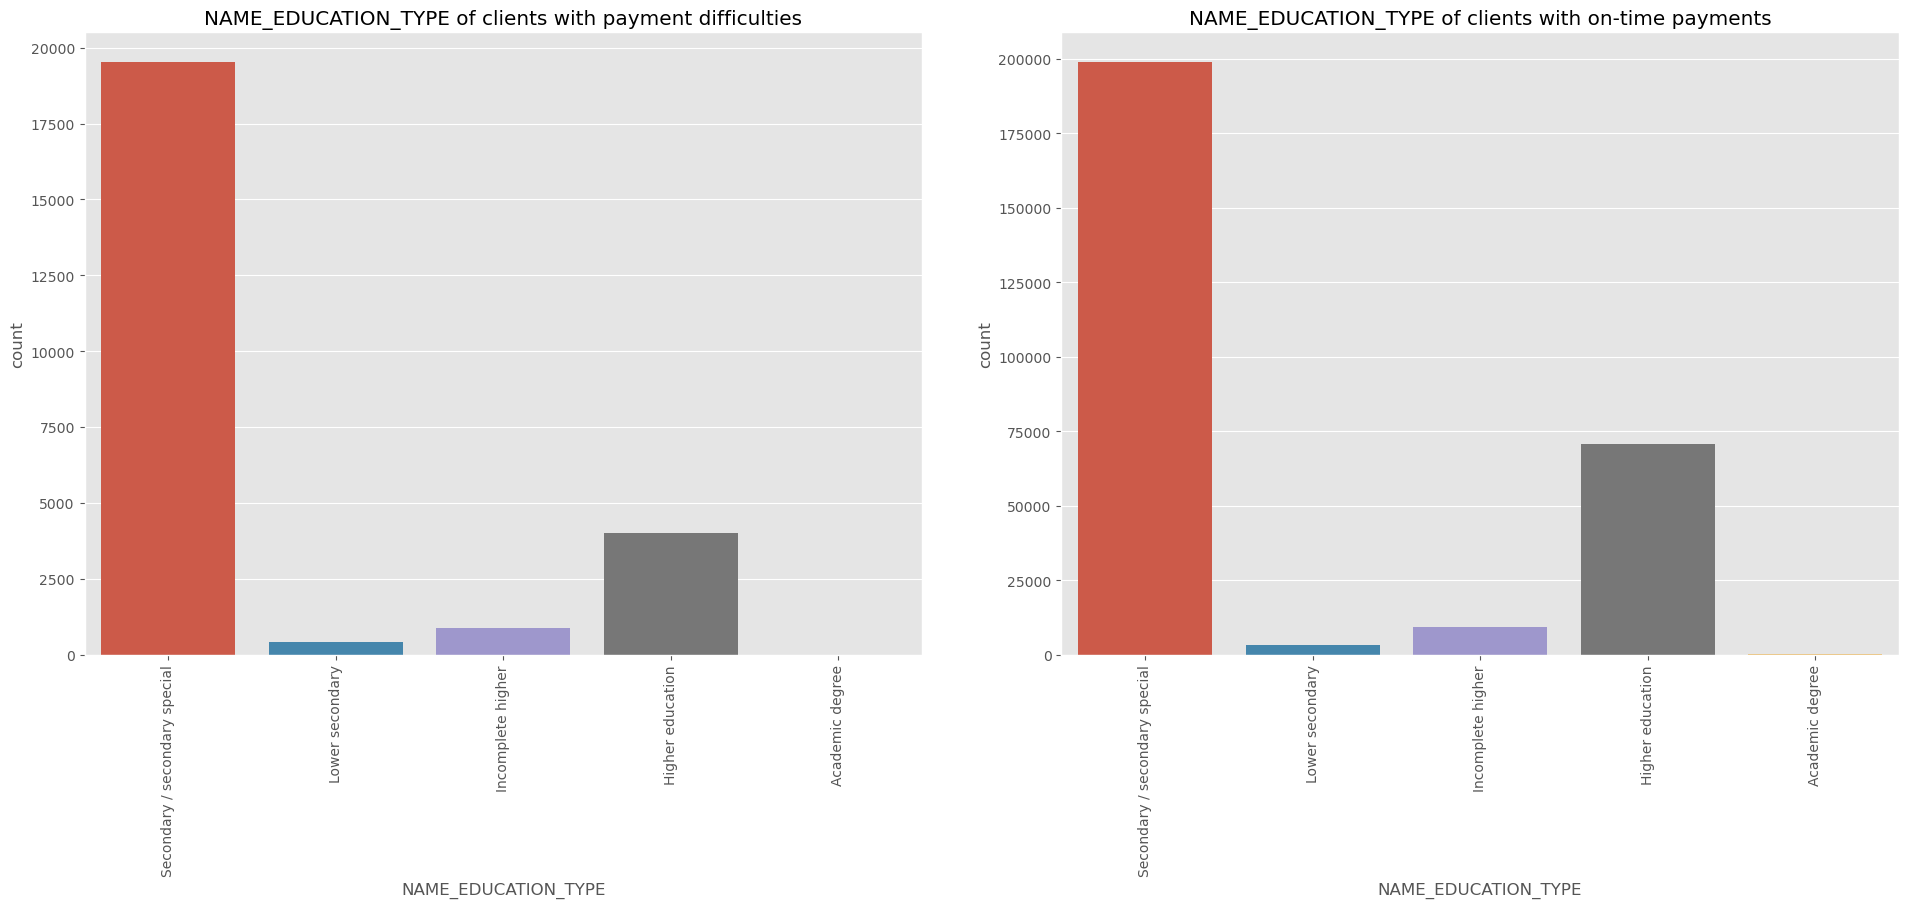

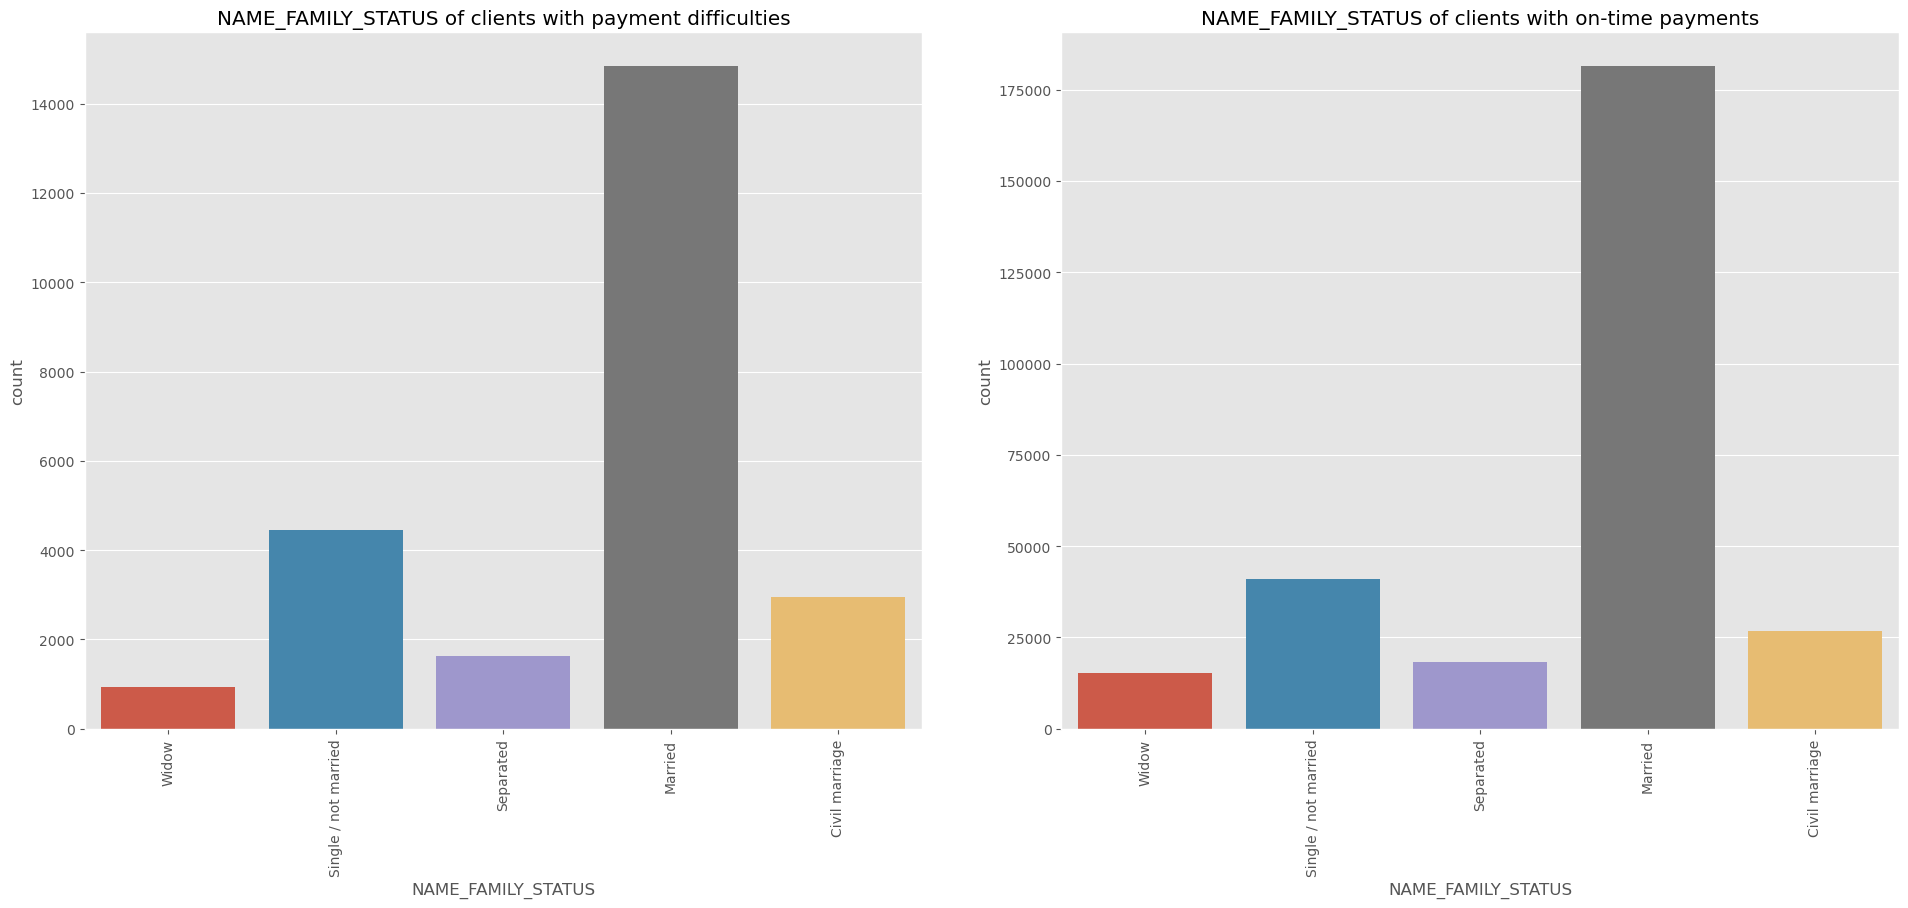

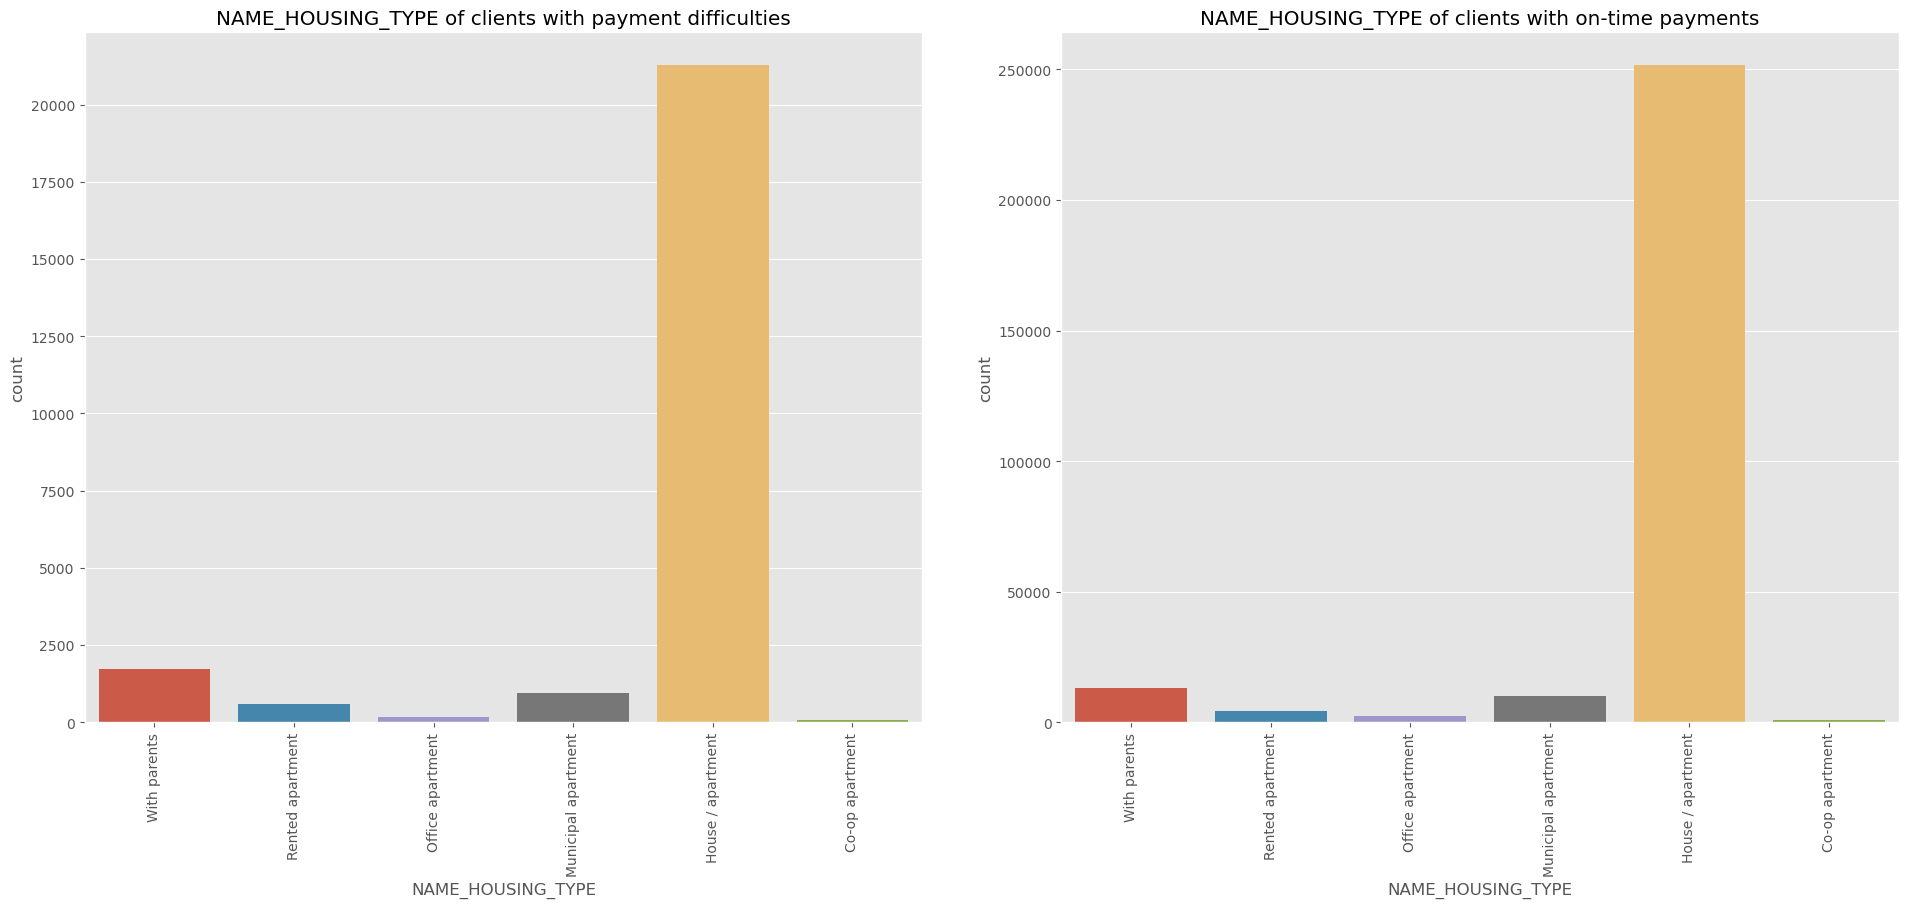

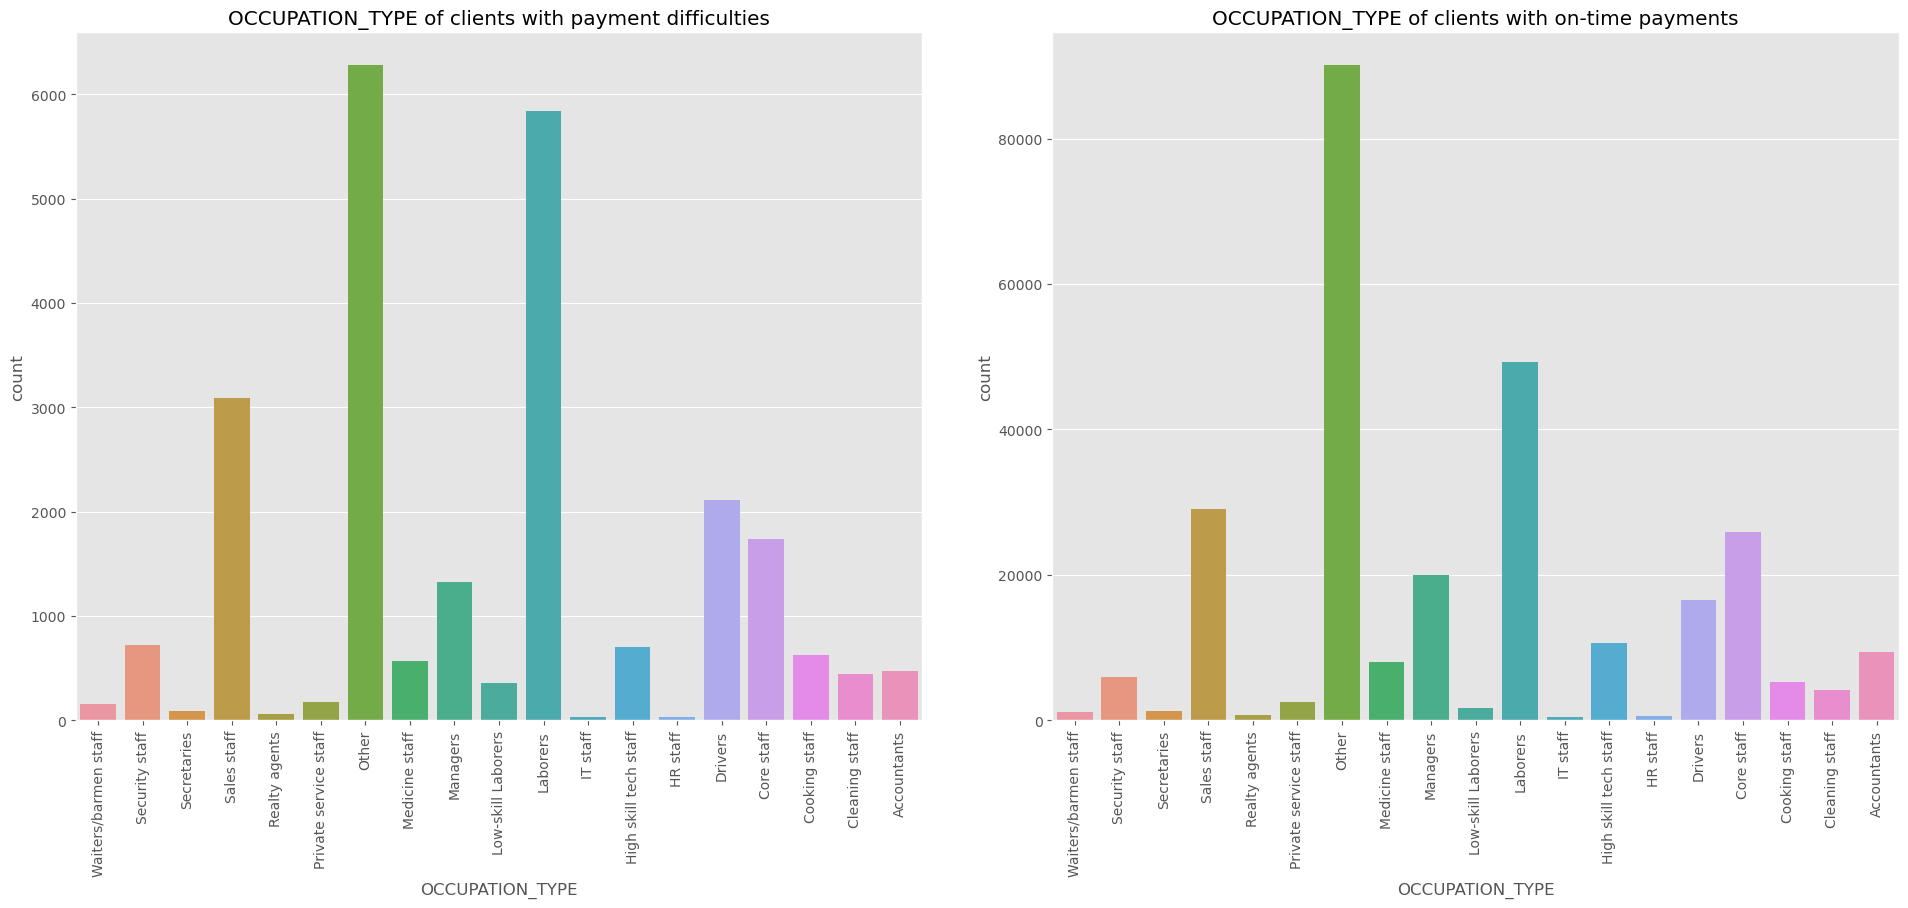

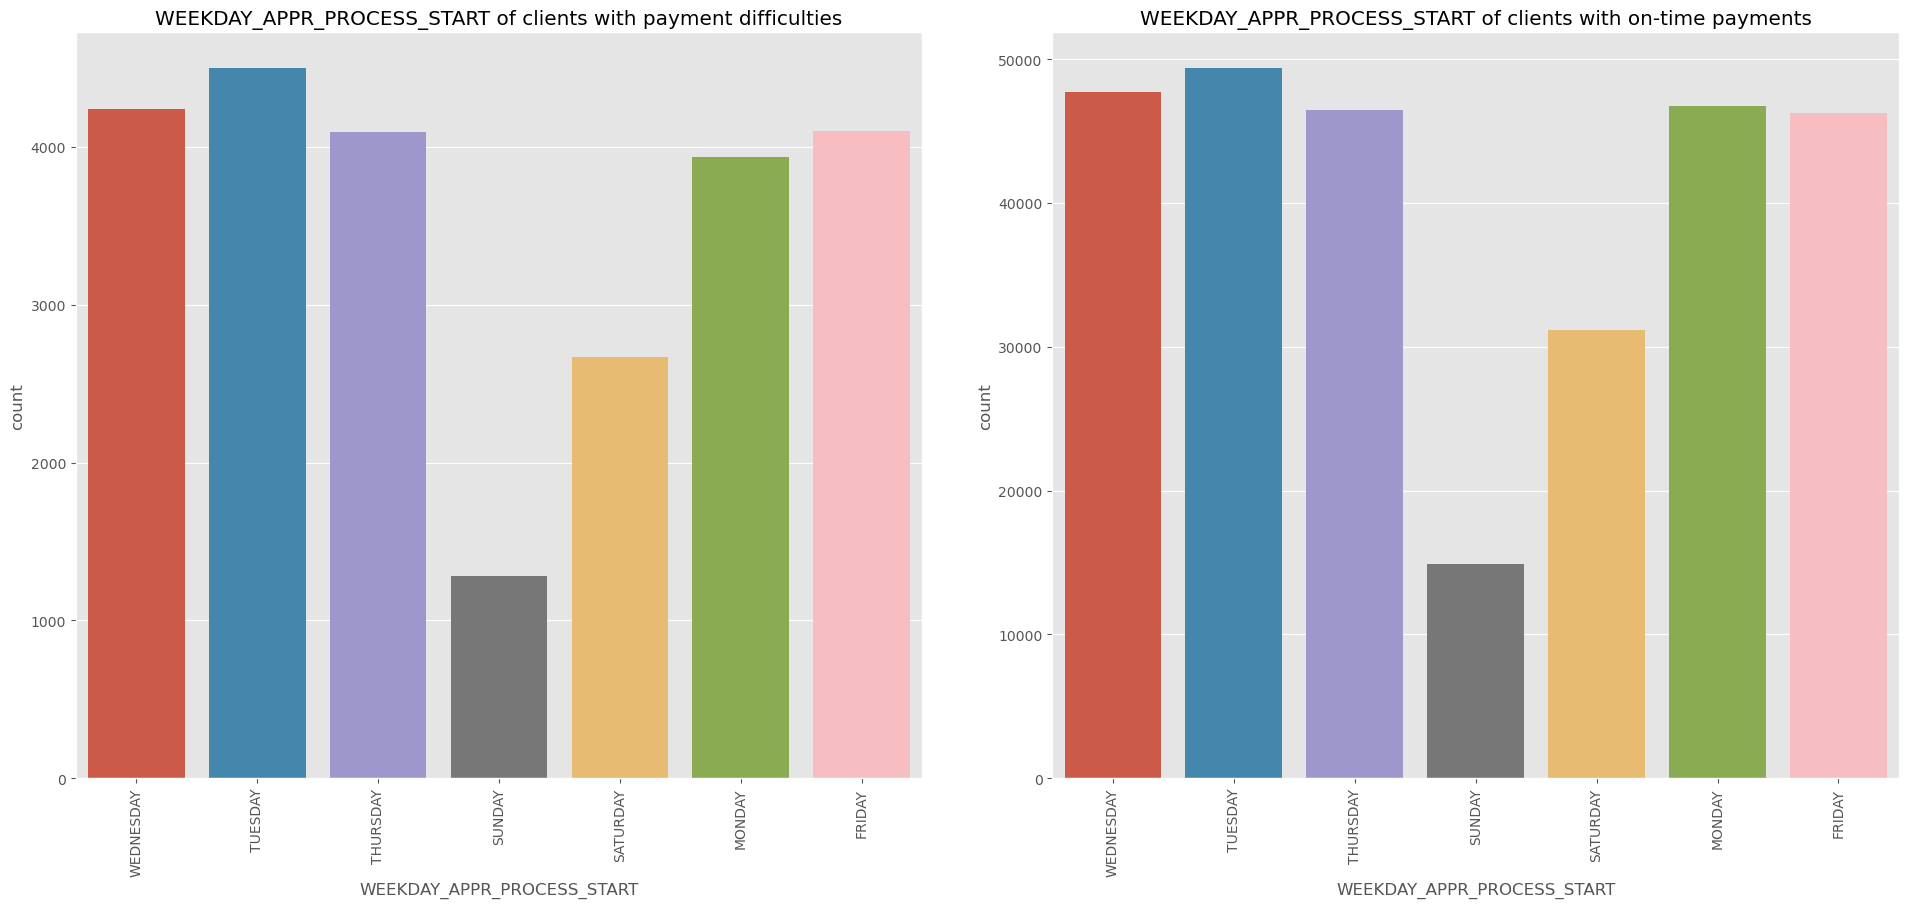

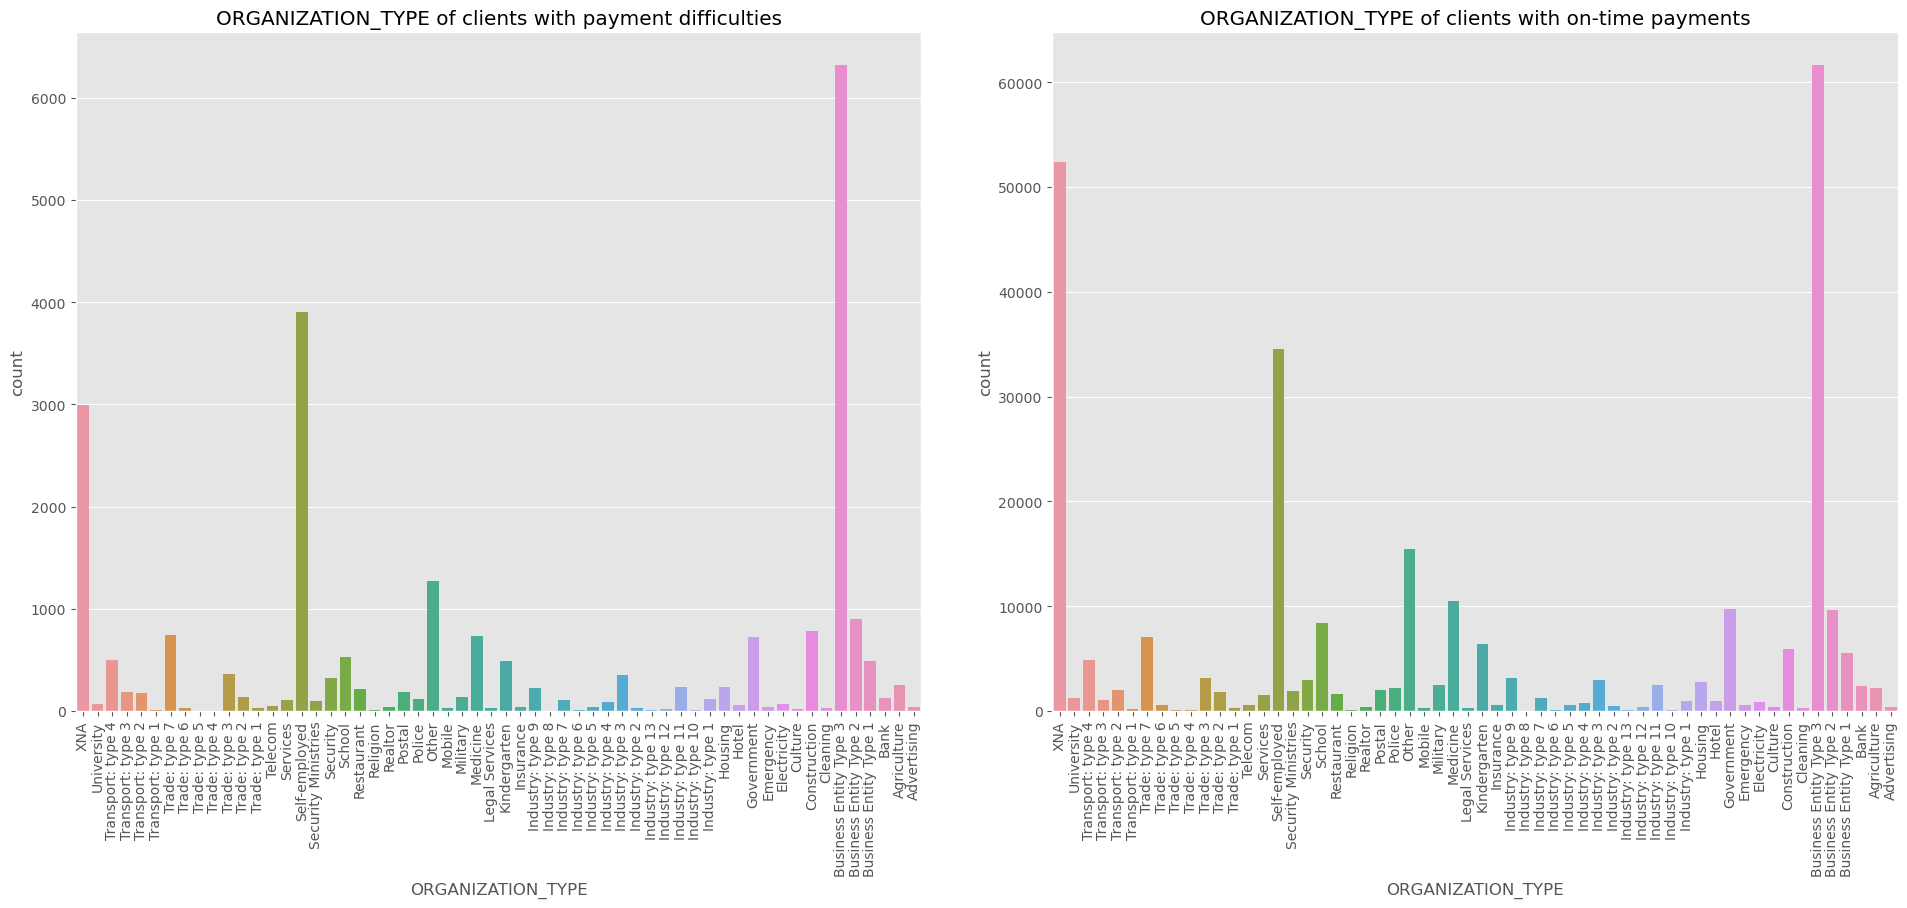

In [85]:
tar_count=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in tar_count:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,10])
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=tar1, x =i, order = sorted(tar1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=tar0, x =i, order = sorted(tar0[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 4)
    plt.show()

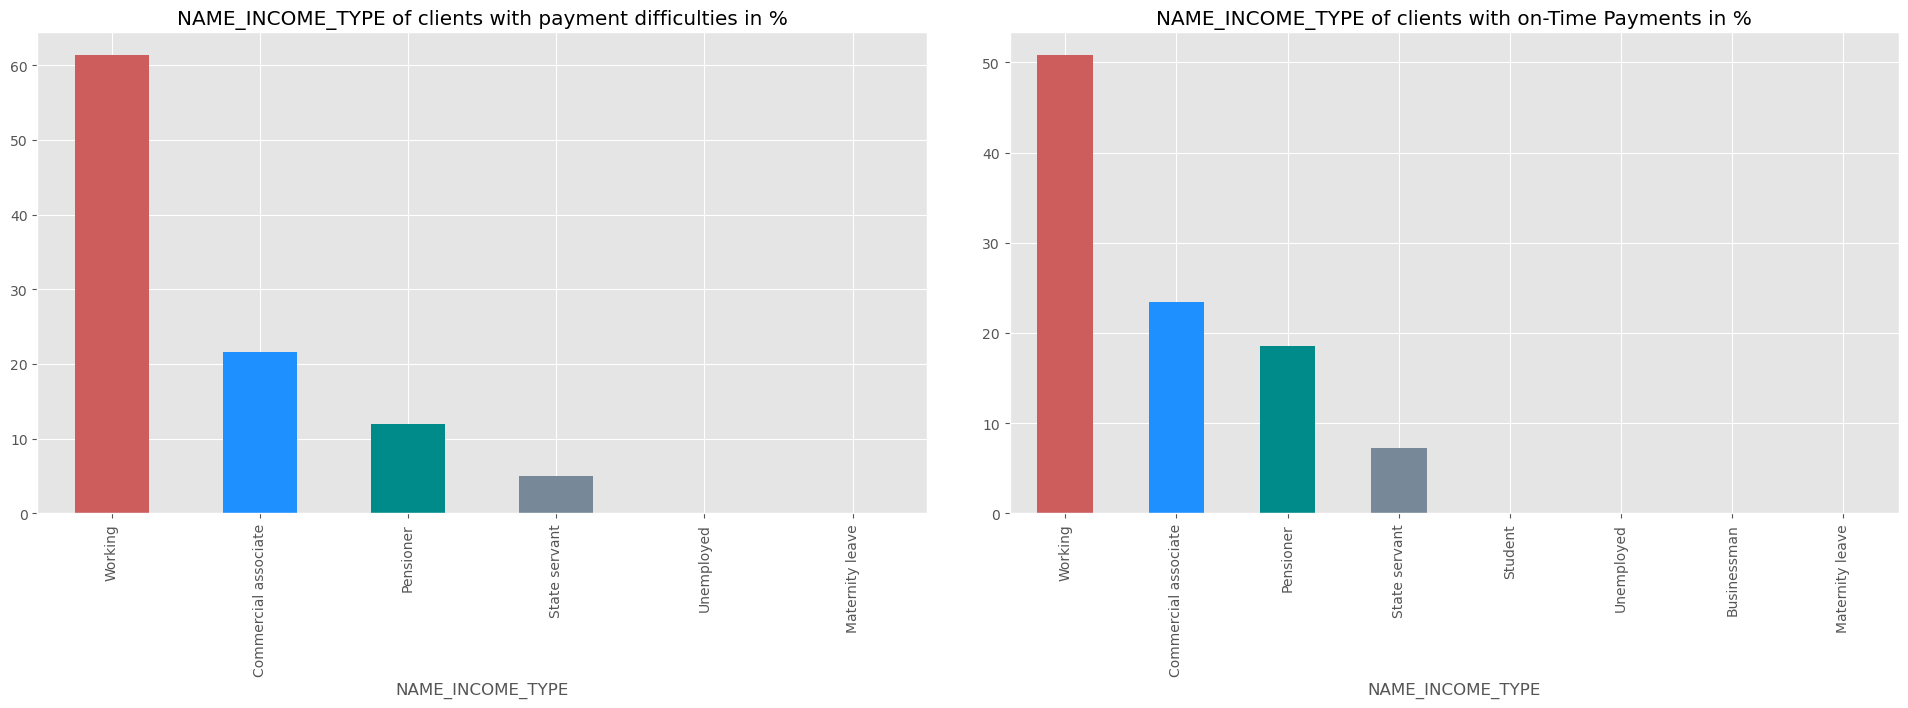

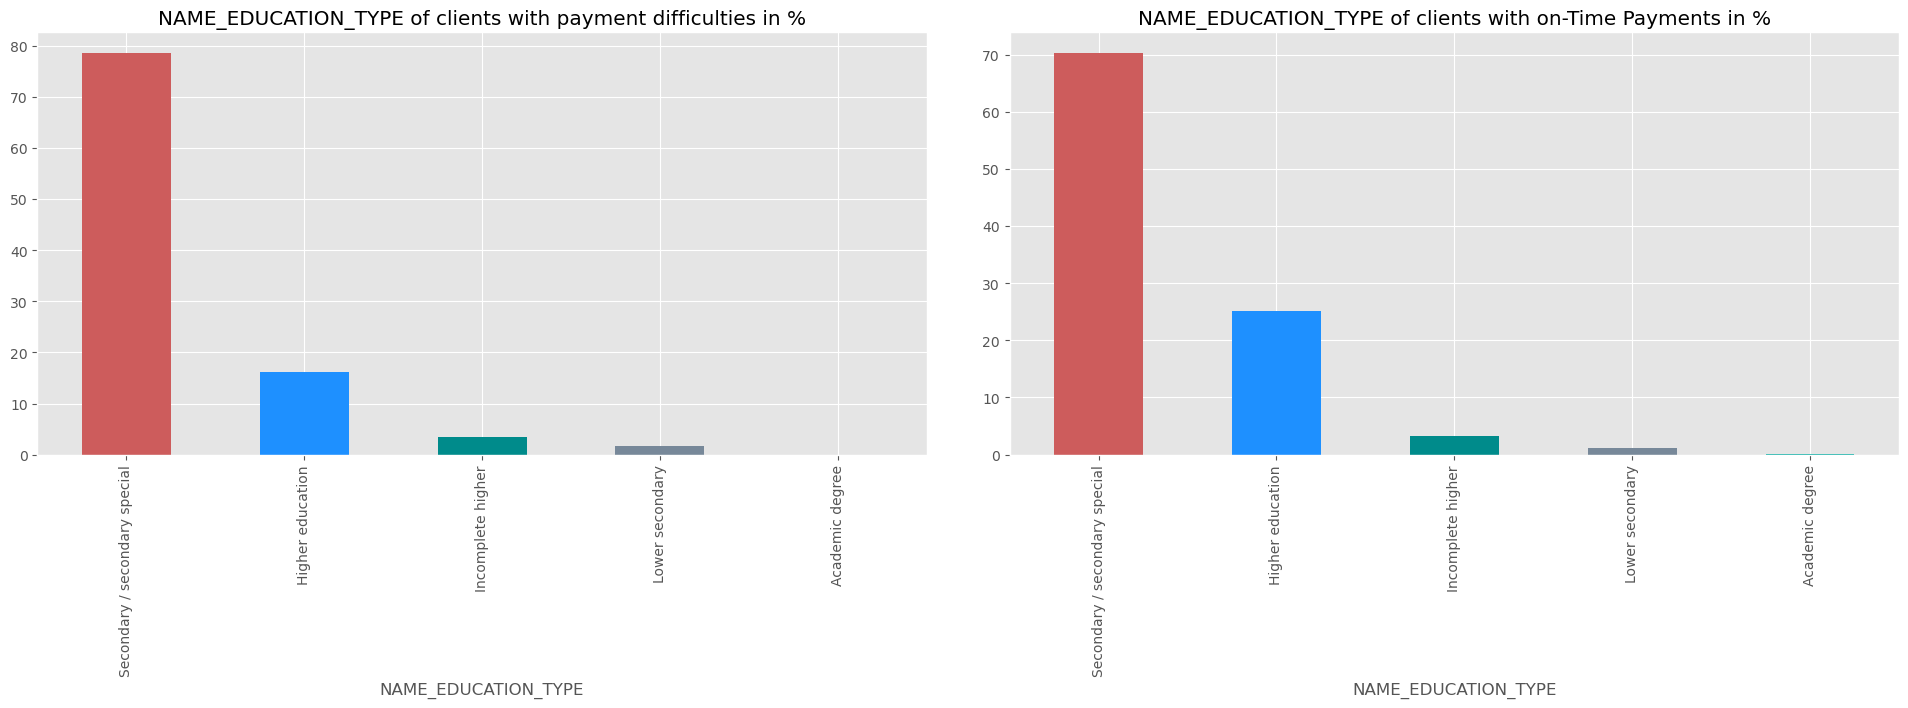

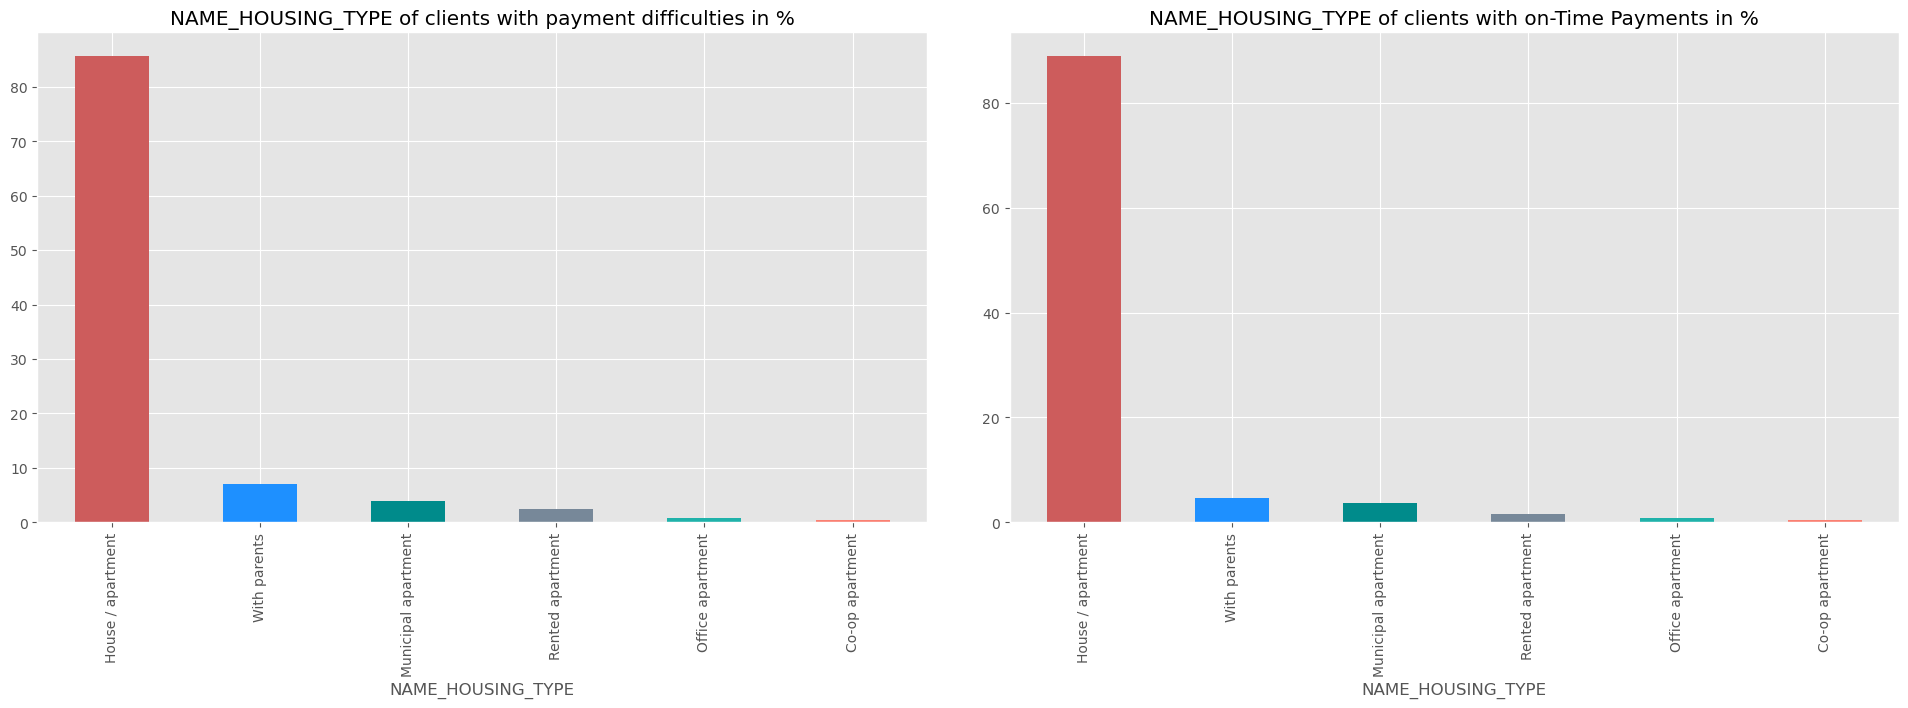

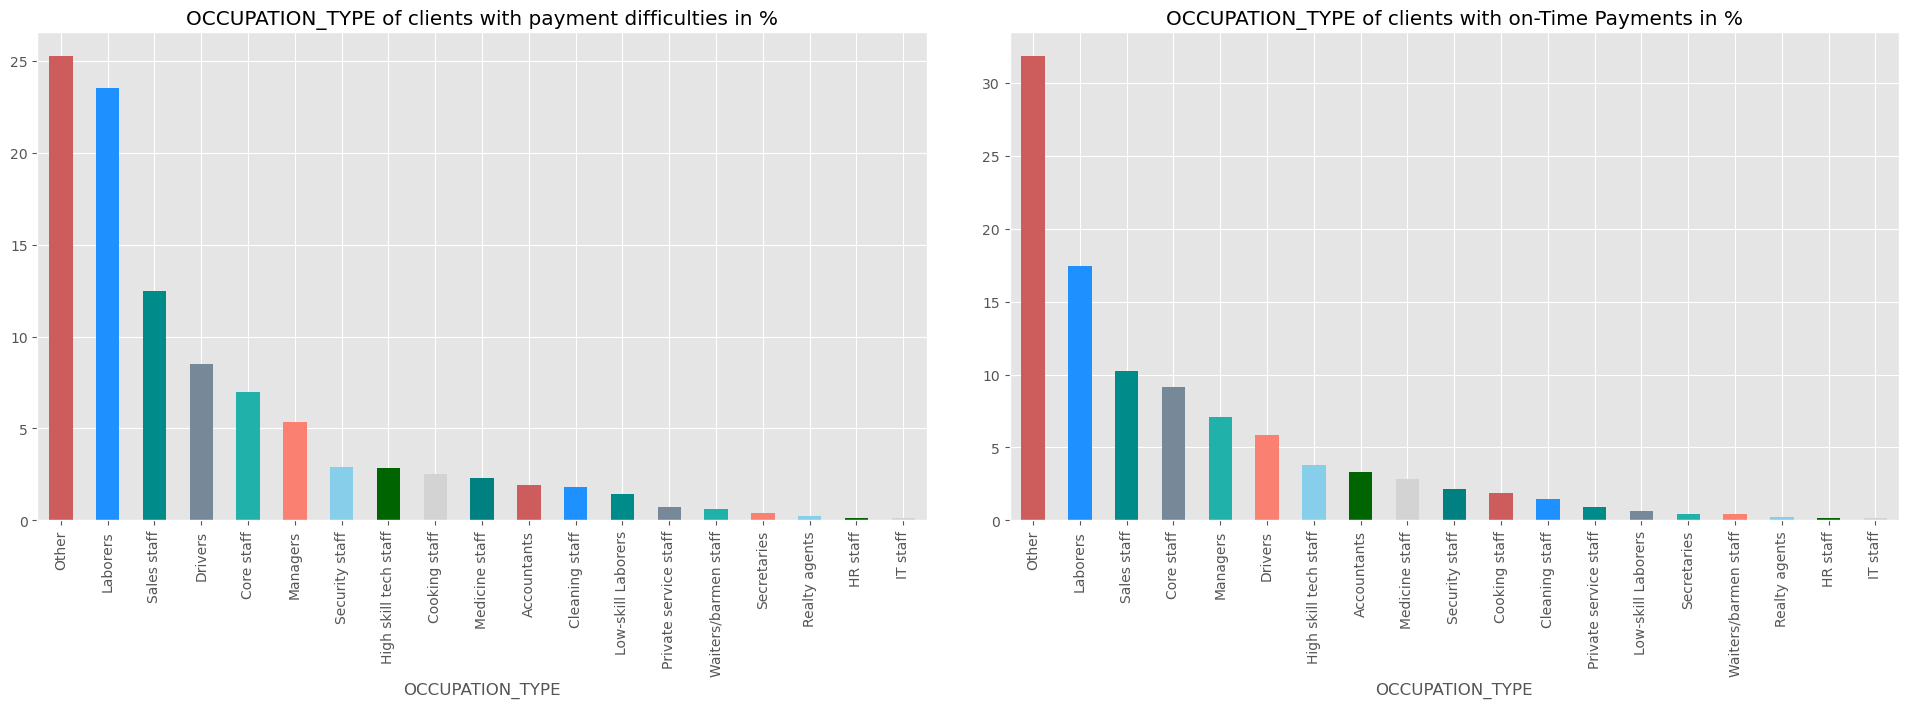

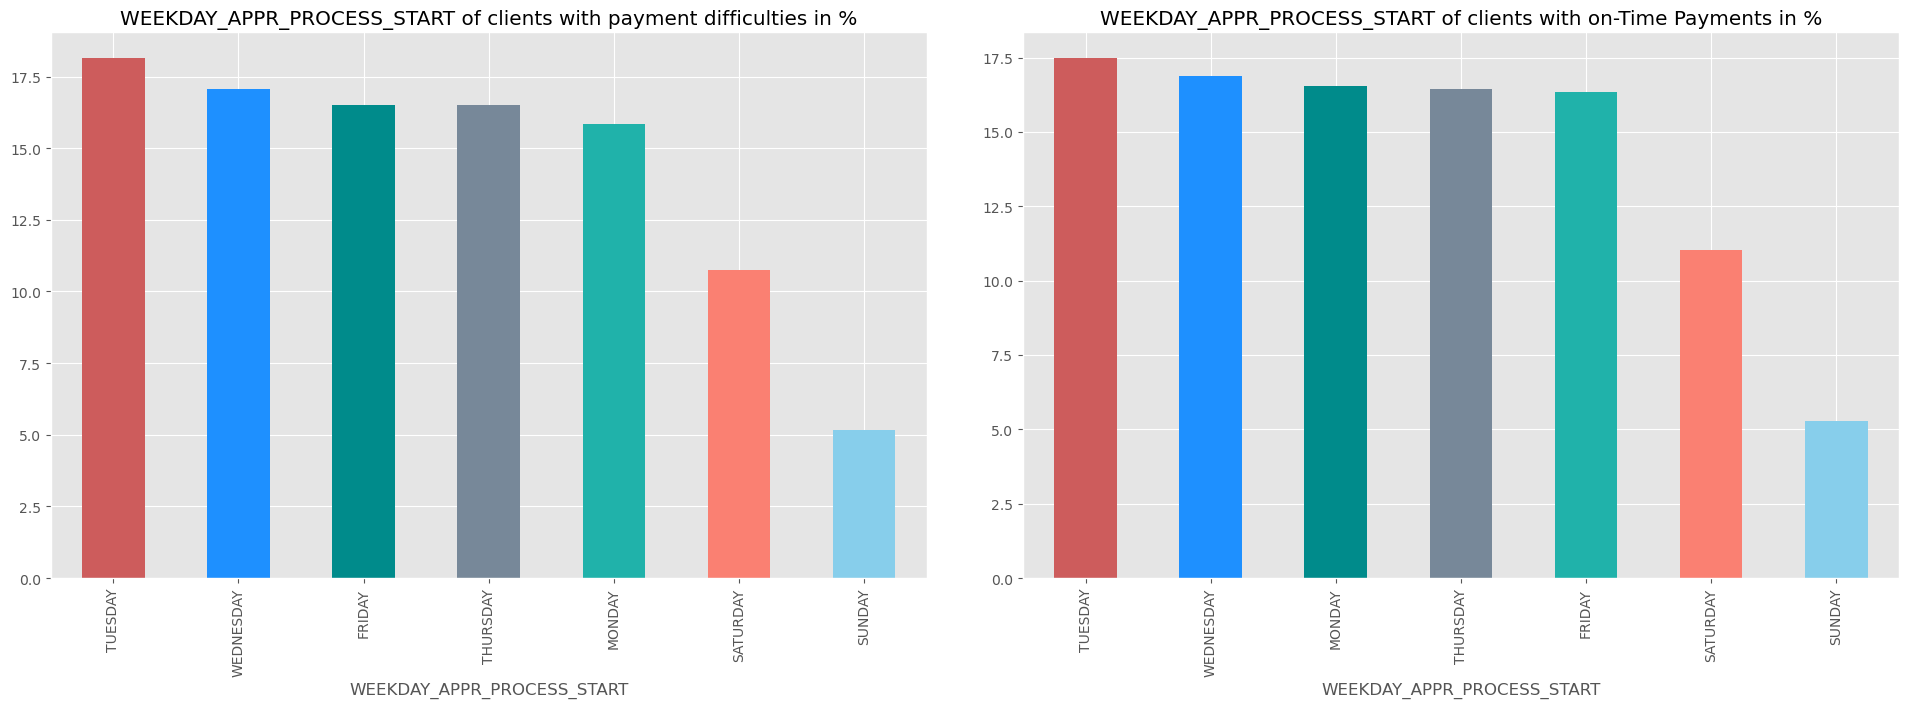

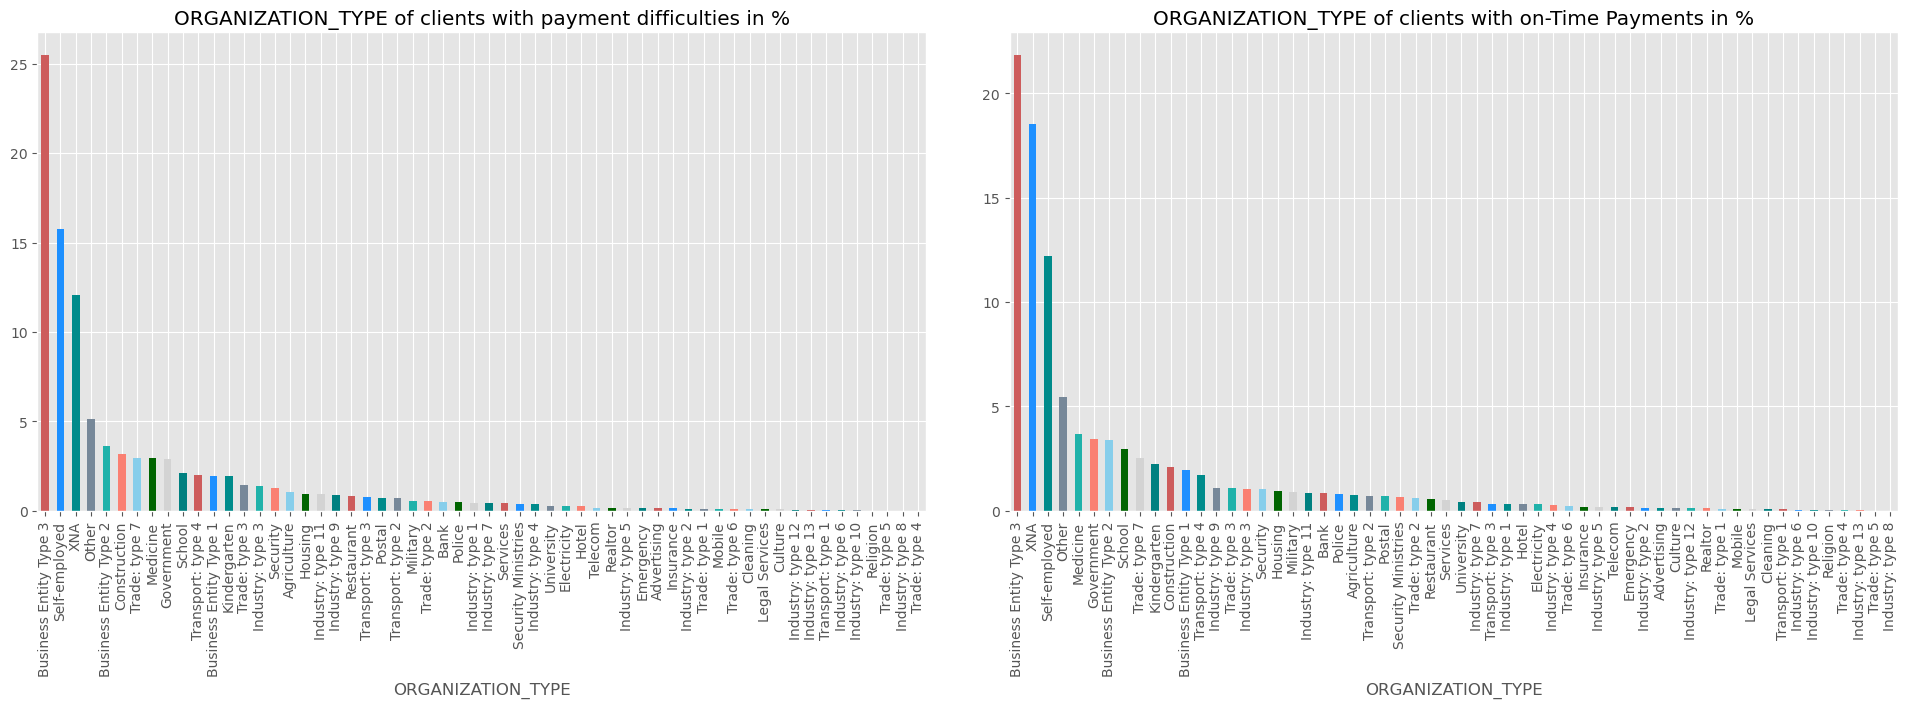

In [86]:
bar_plot=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in bar_plot:
    plt.figure(figsize = [20,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    (tar1[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with payment difficulties in %", color = ['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen', 'salmon', 'skyblue', 'darkgreen', 'lightgrey', 'teal'])
    plt.xticks(rotation=90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    (tar0[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with on-Time Payments in %", color = ['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen', 'salmon', 'skyblue', 'darkgreen', 'lightgrey', 'teal'])
    plt.xticks(rotation=90)
    plt.tight_layout(pad = 4)
    plt.show()

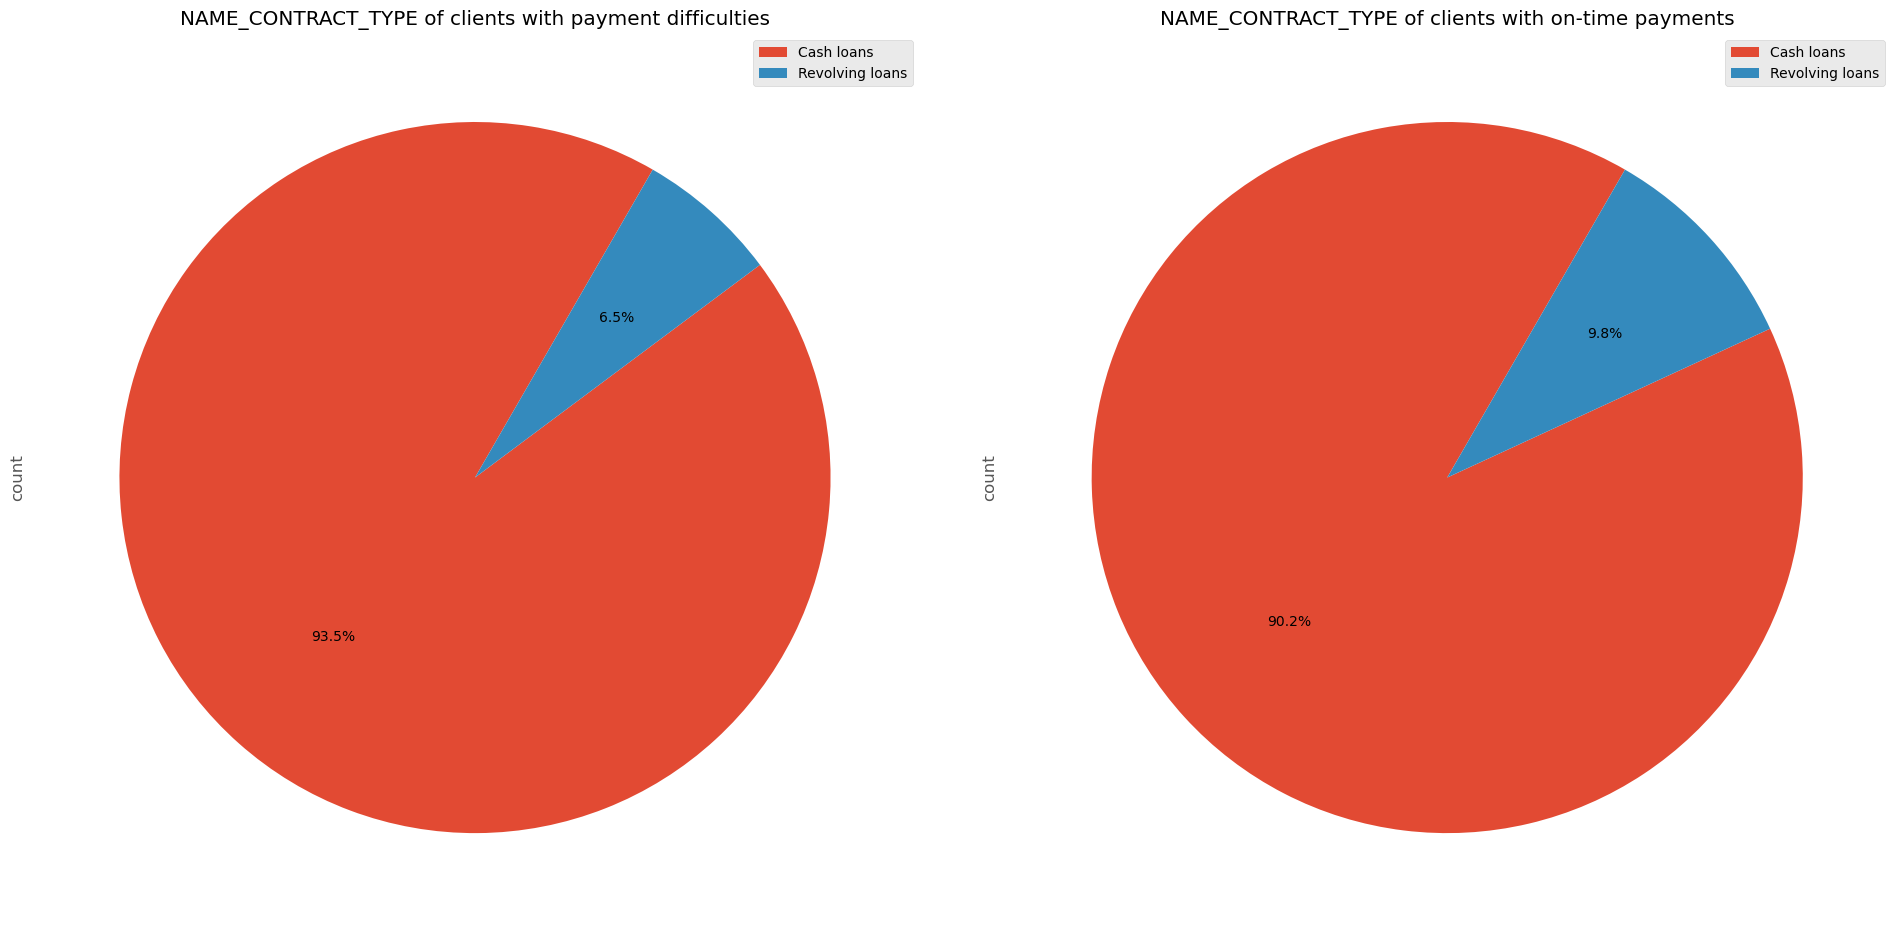

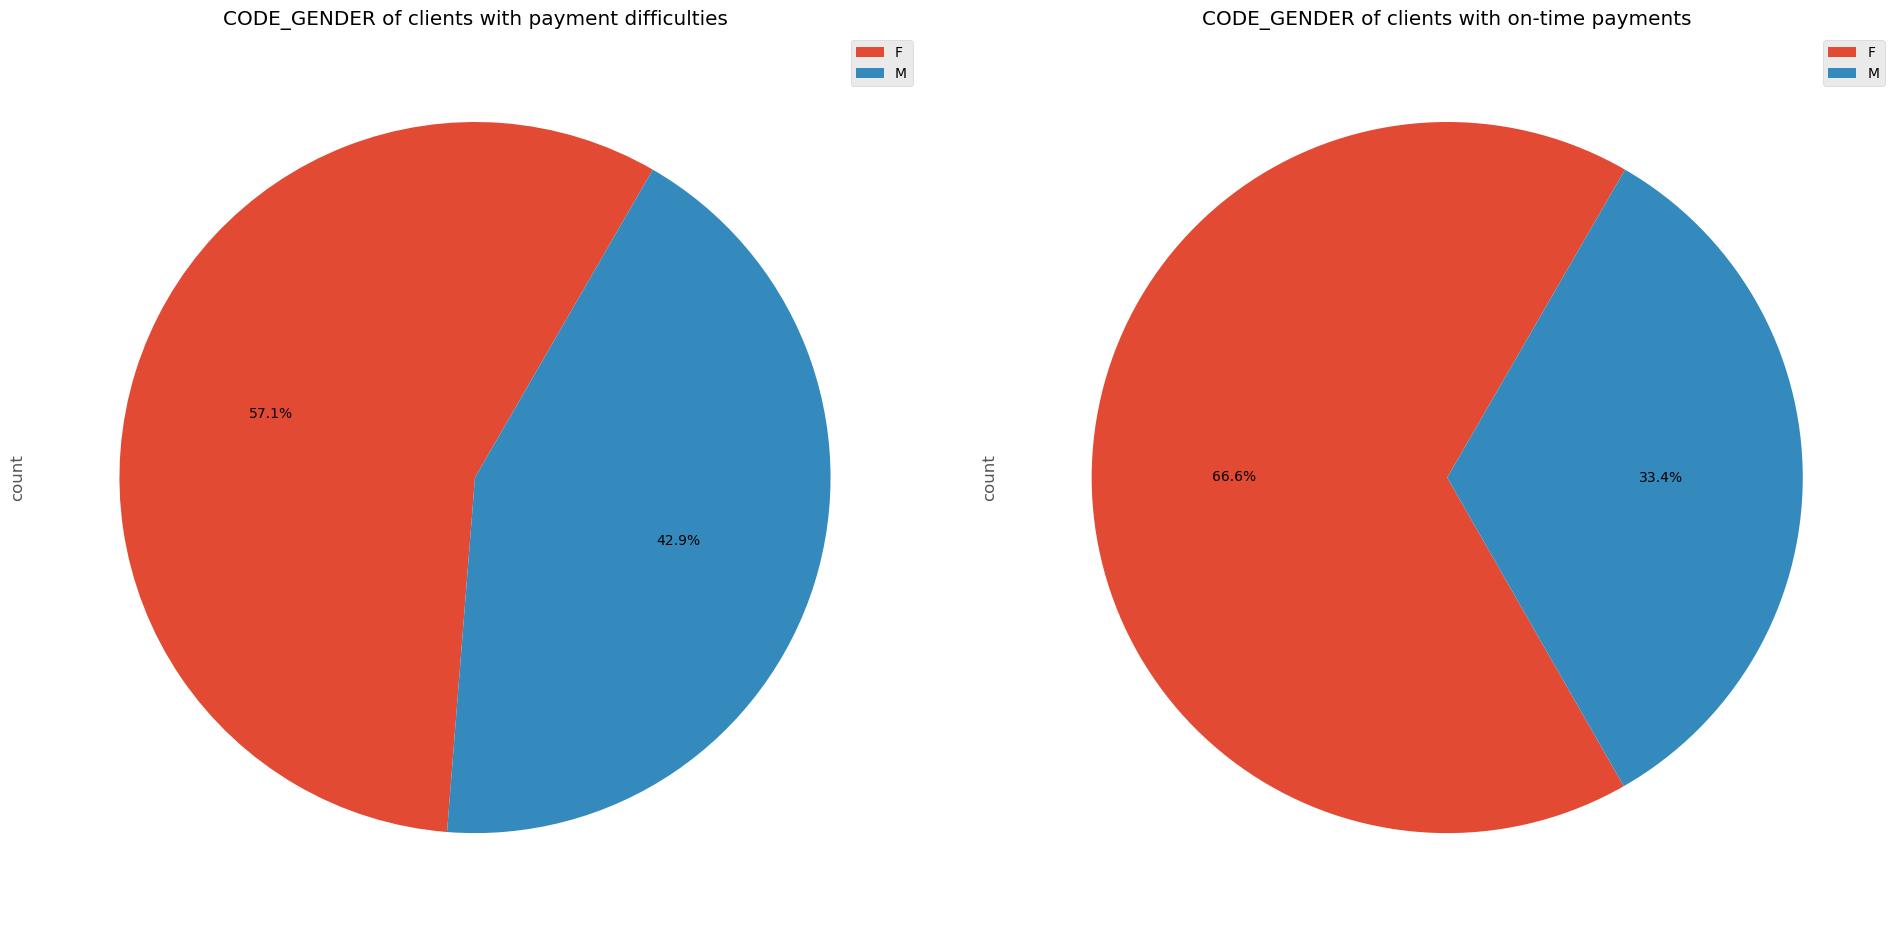

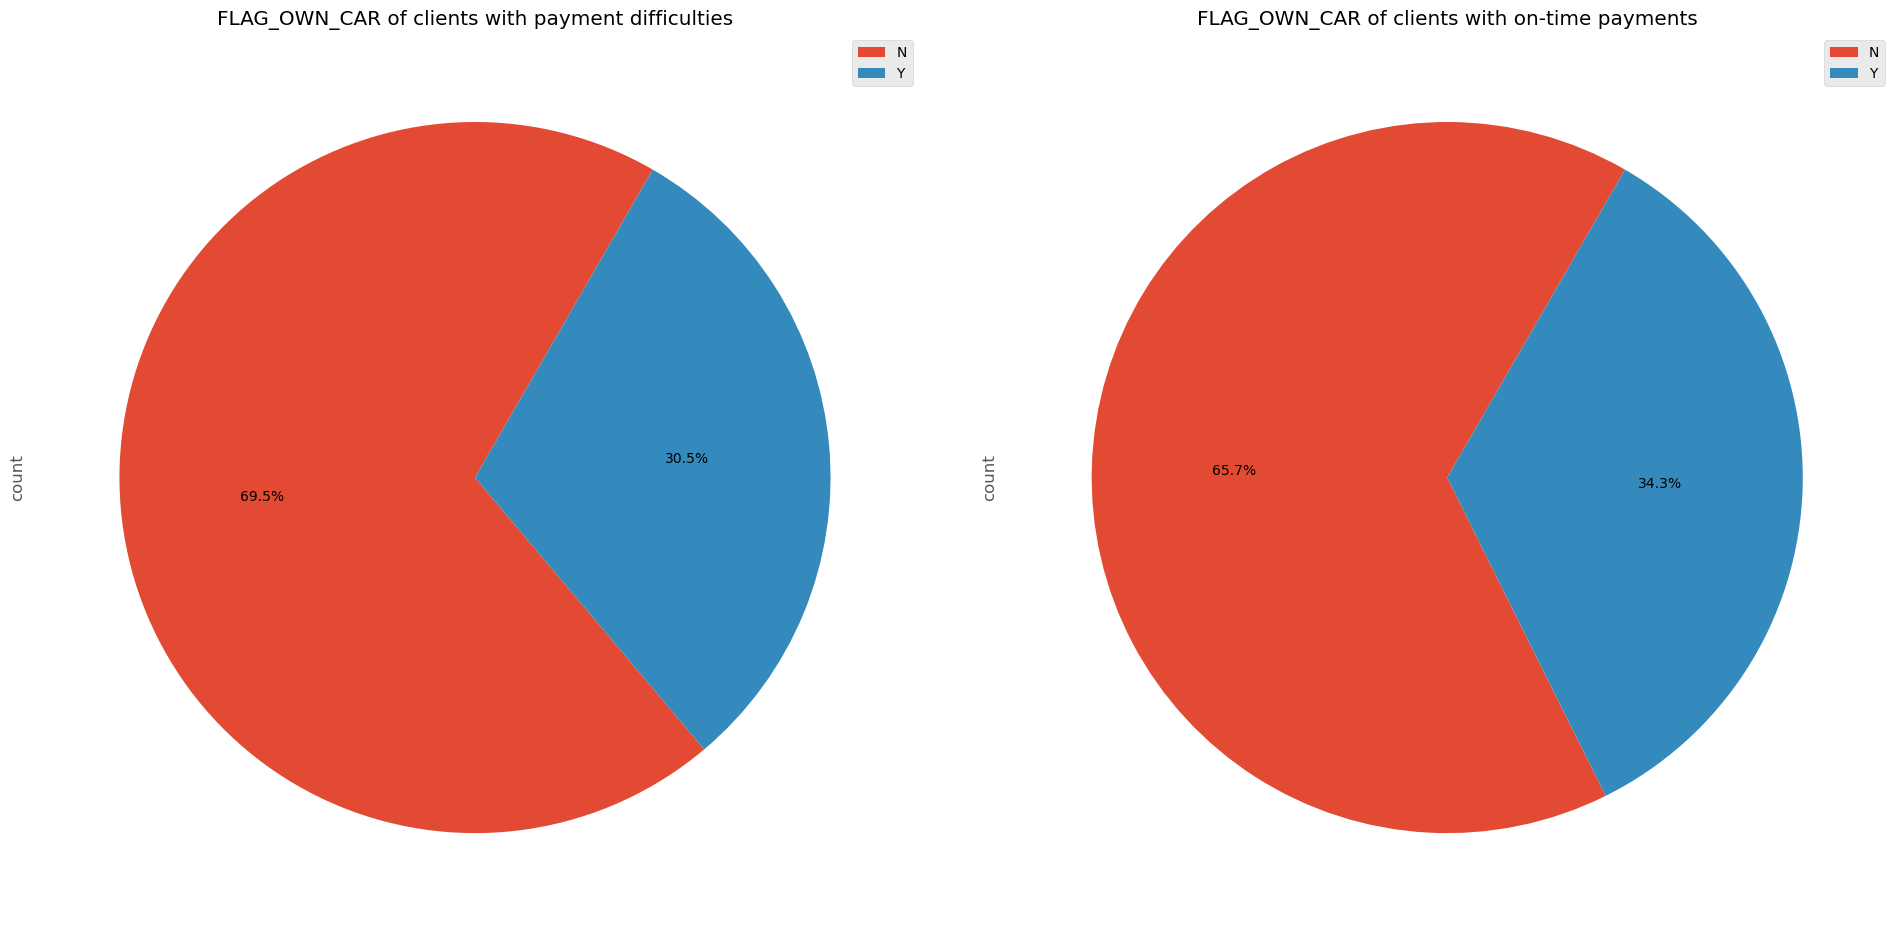

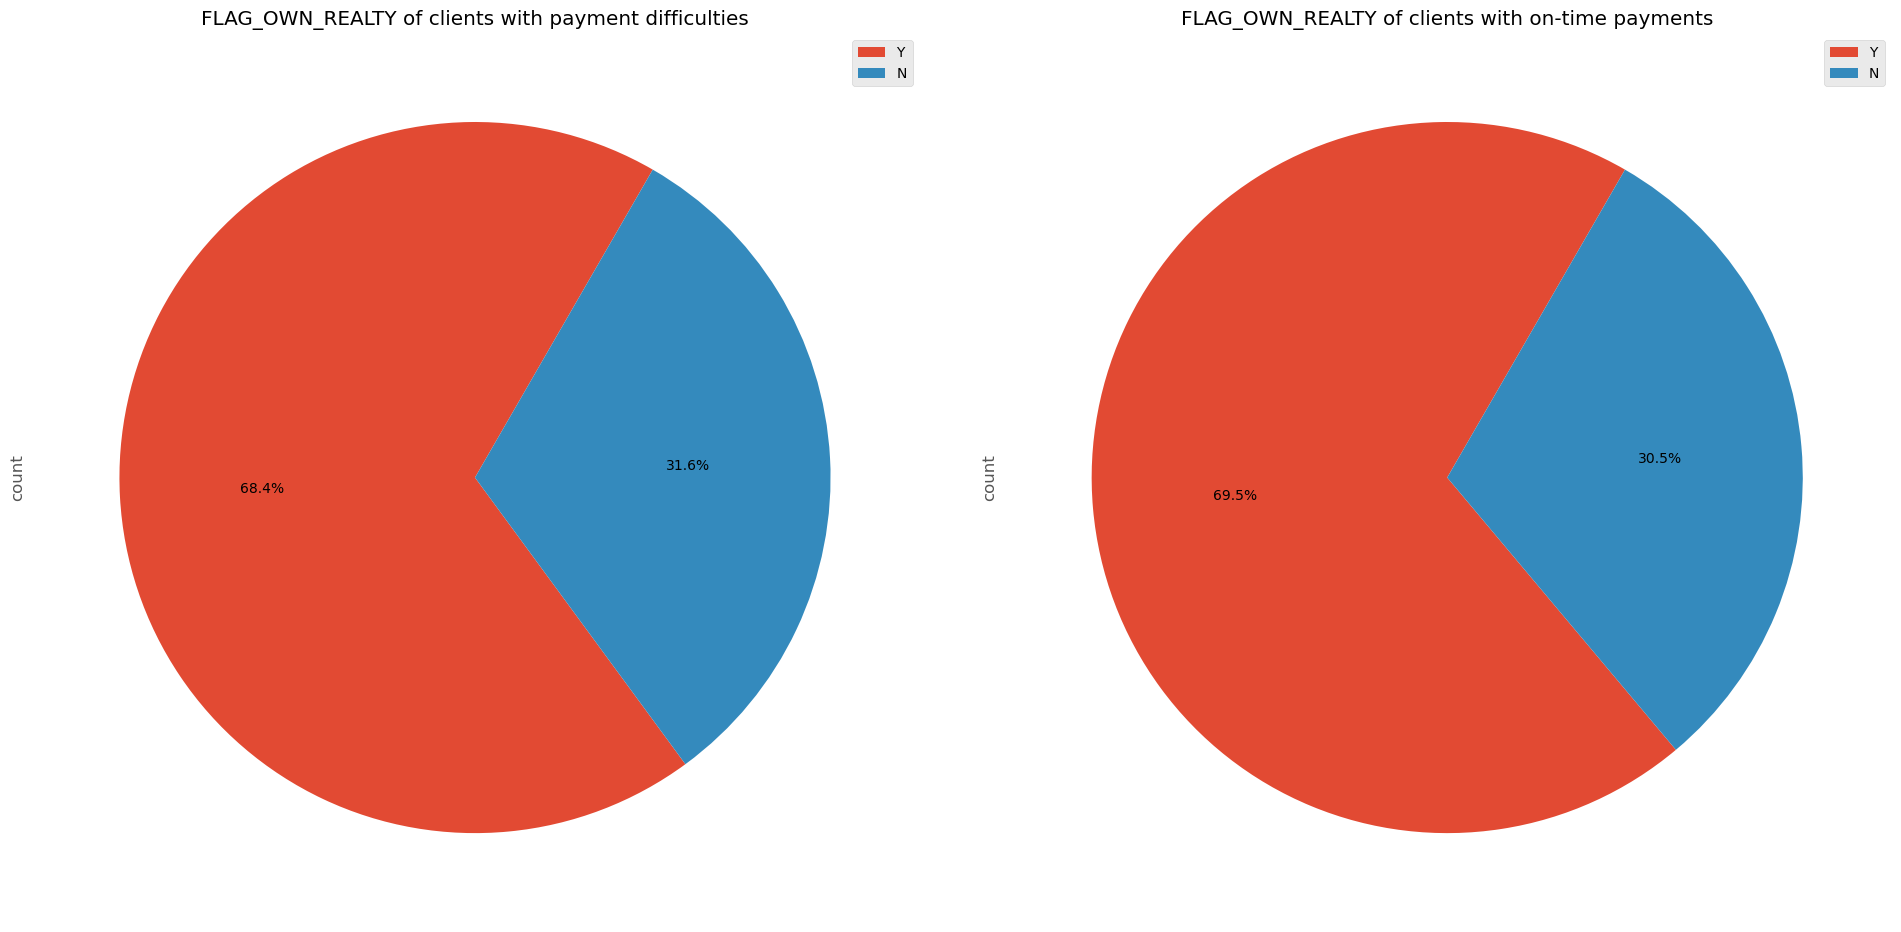

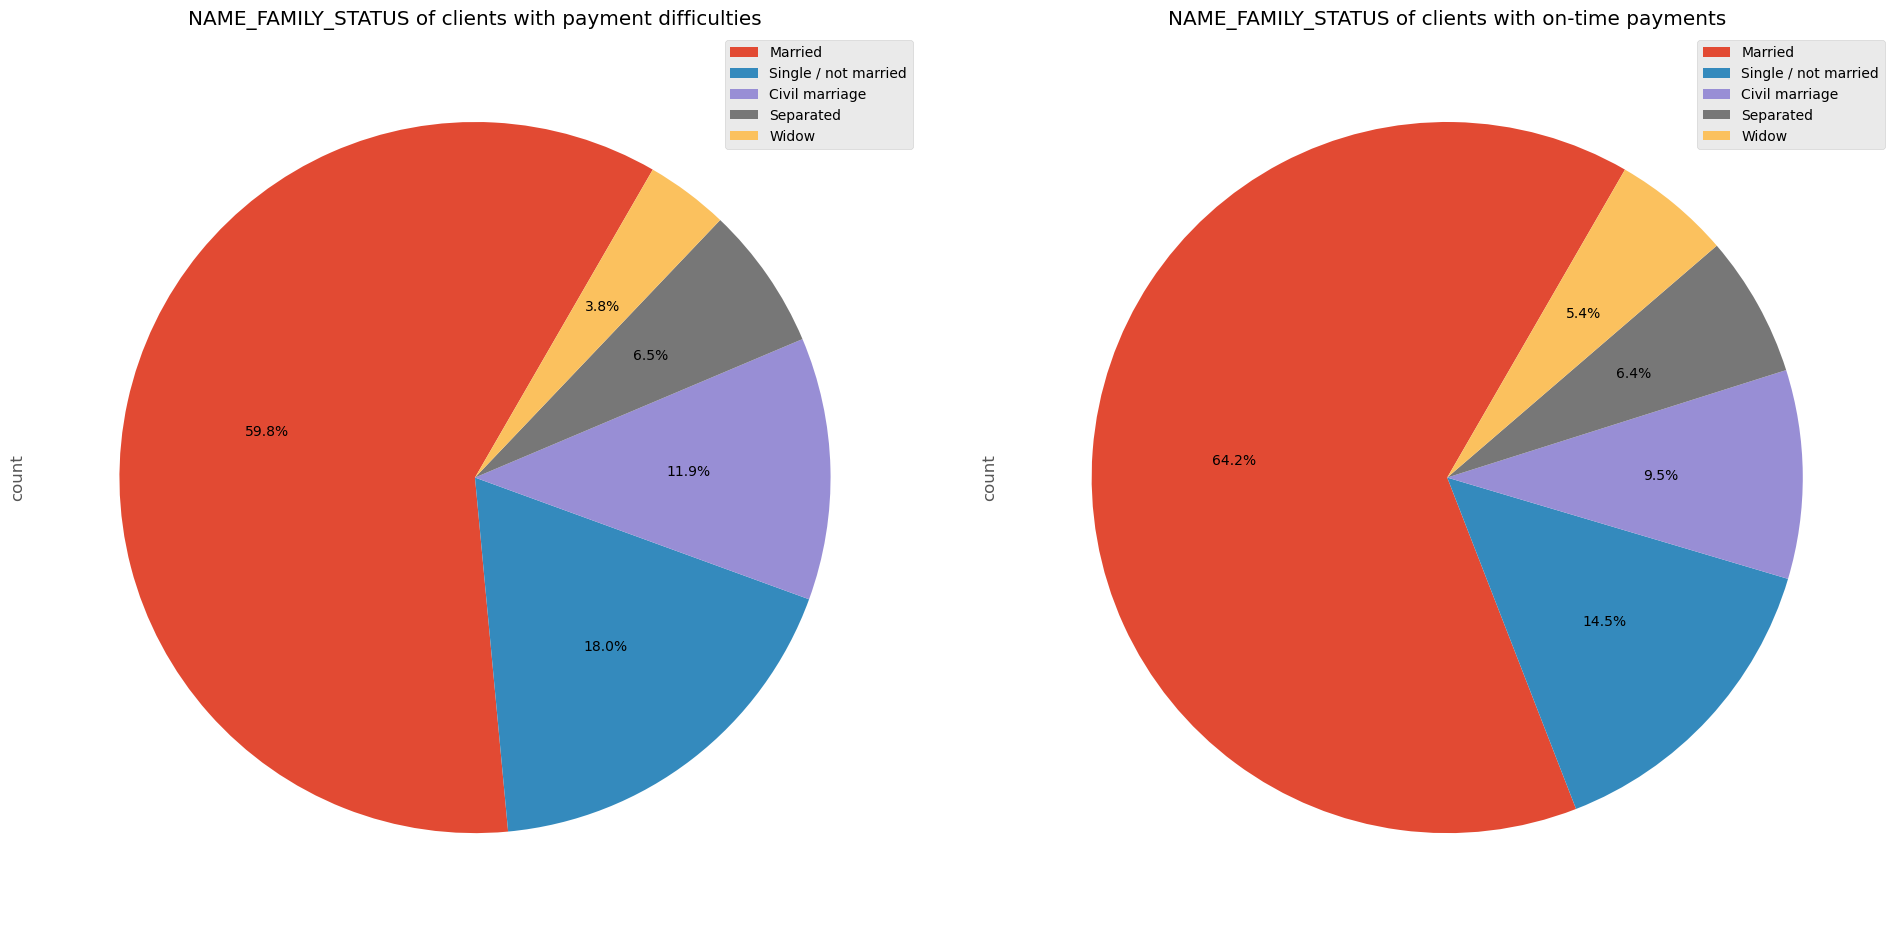

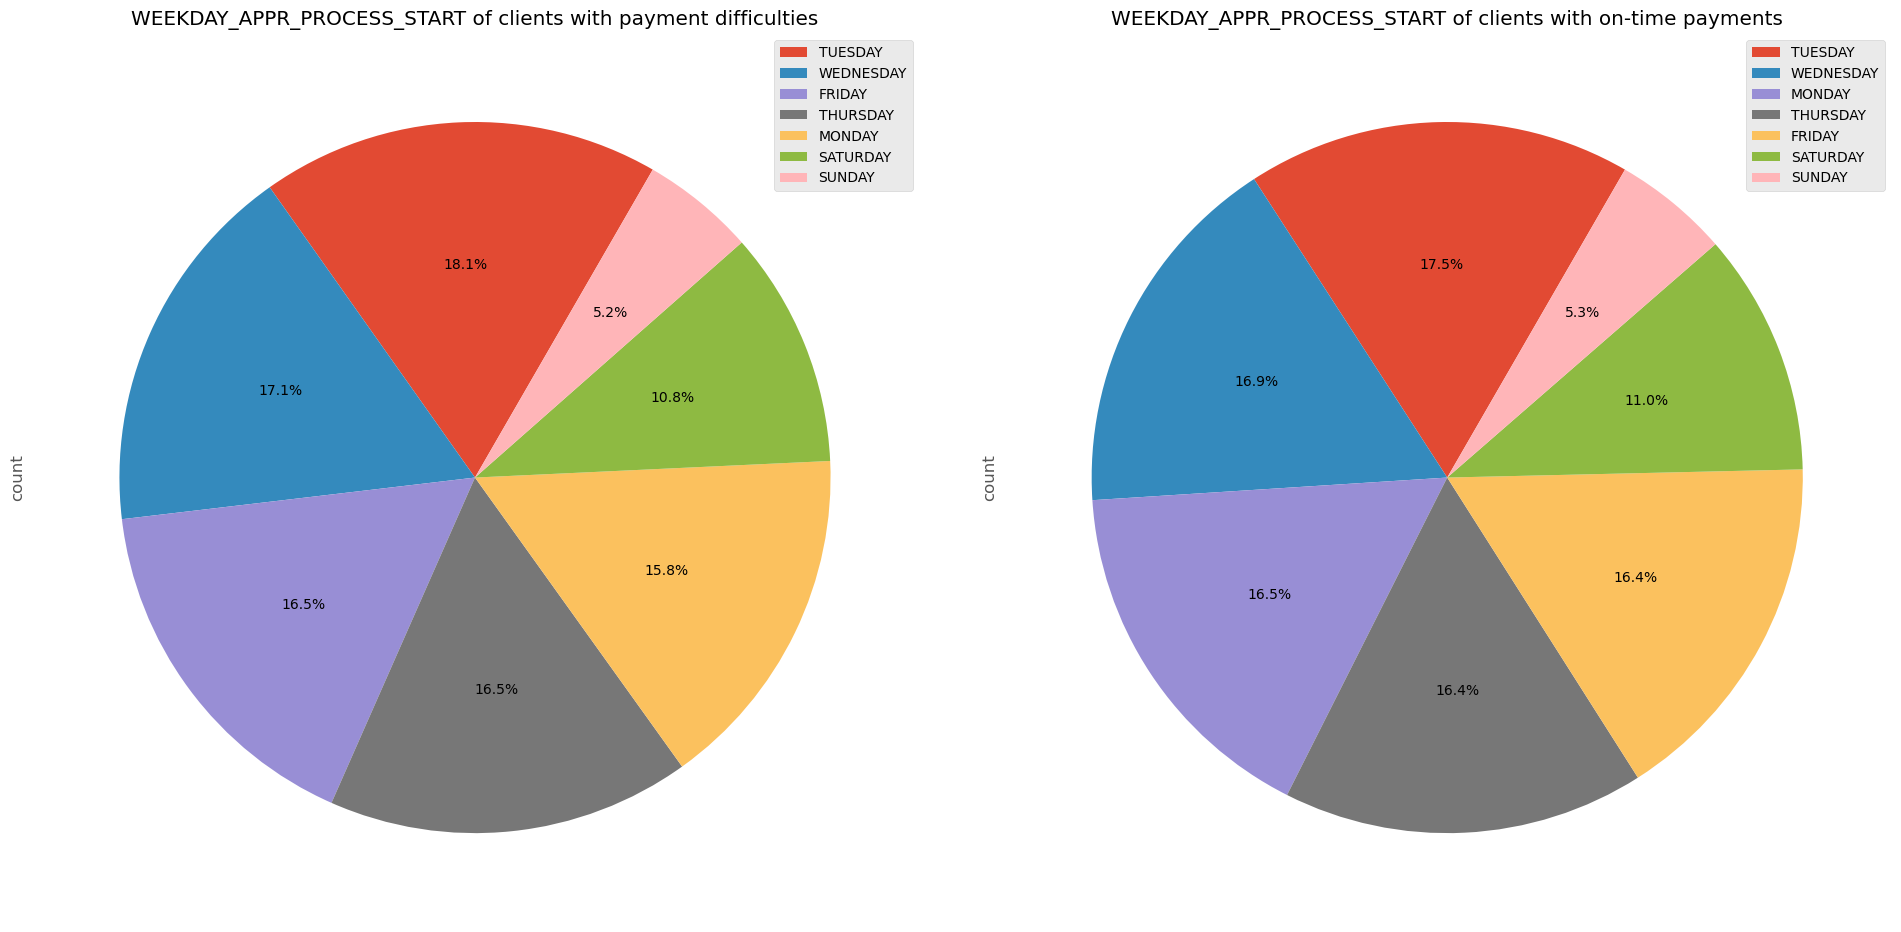

In [87]:
tar_pie=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in tar_pie:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,10])
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    tar1[i].value_counts().plot.pie(autopct='%1.1f%%', startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    tar0[i].value_counts().plot.pie(autopct='%1.1f%%', startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

**Observations:**<br>
<ol>
    <li>NAME_CONTRACT_TYPE</li>
    Cash Loans are given more than revolving loans.
    <ul>
        <li>For clients with difficulties in payment: 93.5% are cash loans and 6.5% are revolving loans.</li>
        <li>For clients with on time payment: 90.2% are cash loans and 9.8% are revolving loans.</li>
    </ul>
    <br>
    <li>CODE_GENDER</li>
    Females clients are more than males.
    <ul>
        <li>For clients with difficulties in payment: 57.1% is female and 42.9% is male.</li>
        <li>For clients with on time payment: 66.6% is female and 33.4% is male.</li>
    </ul>
    <br>
    <li>FLAG_OWN_CAR</li>
    The clients with car owners are more in comparison to non car owners.
    <ul>
        <li>For clients with difficulties in payment: 69.5% are car owners and 30.5% are non car owners.</li>
        <li>For clients with on time payment: 65.7% are car owners and 34.3% are non car owners.</li>
    </ul>
    <br>
    <li>FLAG_OWN_REALTY</li>
    The clients with home owners are more in comparison to non home owners.
    <ul>
        <li>For clients with difficulties in payment: 68.4% are home owners and 31.6% are non home owners.</li>
        <li>For clients with on time payment: 69.5% are home owners and 30.5% are non home owners.</li>
    </ul>
    <br>
    <li>NAME_FAMILY_STATUS</li>
    Clients with married status are major in number.
    <ul>
        <li>Married or Widowed are making more on time payments comparatively.</li>
        <li>Single/Non-Married have more payment difficulties.</li>
    </ul>
    <br>
    <li>NAME_INCOME_TYPE</li>
    <ul>
        <li>Pensioners and state servants are more likely to make on time payments than delay the payments.</li>
    </ul>
    <br>
    <li>NAME_EDUCATION_TYPE</li>
    <ul>
        <li>Clients with higher education are paying on time more rather than delaying the payments.</li>
    </ul>
 </ol>        

#### 5.2.1 Numerical Columns

In [88]:
df_app.columns[(df_app.dtypes=="int64") | (df_app.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FL

NOTE: Removing flag type columns.

In [89]:
for i in df_app.columns:
    if i.startswith("FLAG"):
        df_app.drop(columns=i, inplace=True)

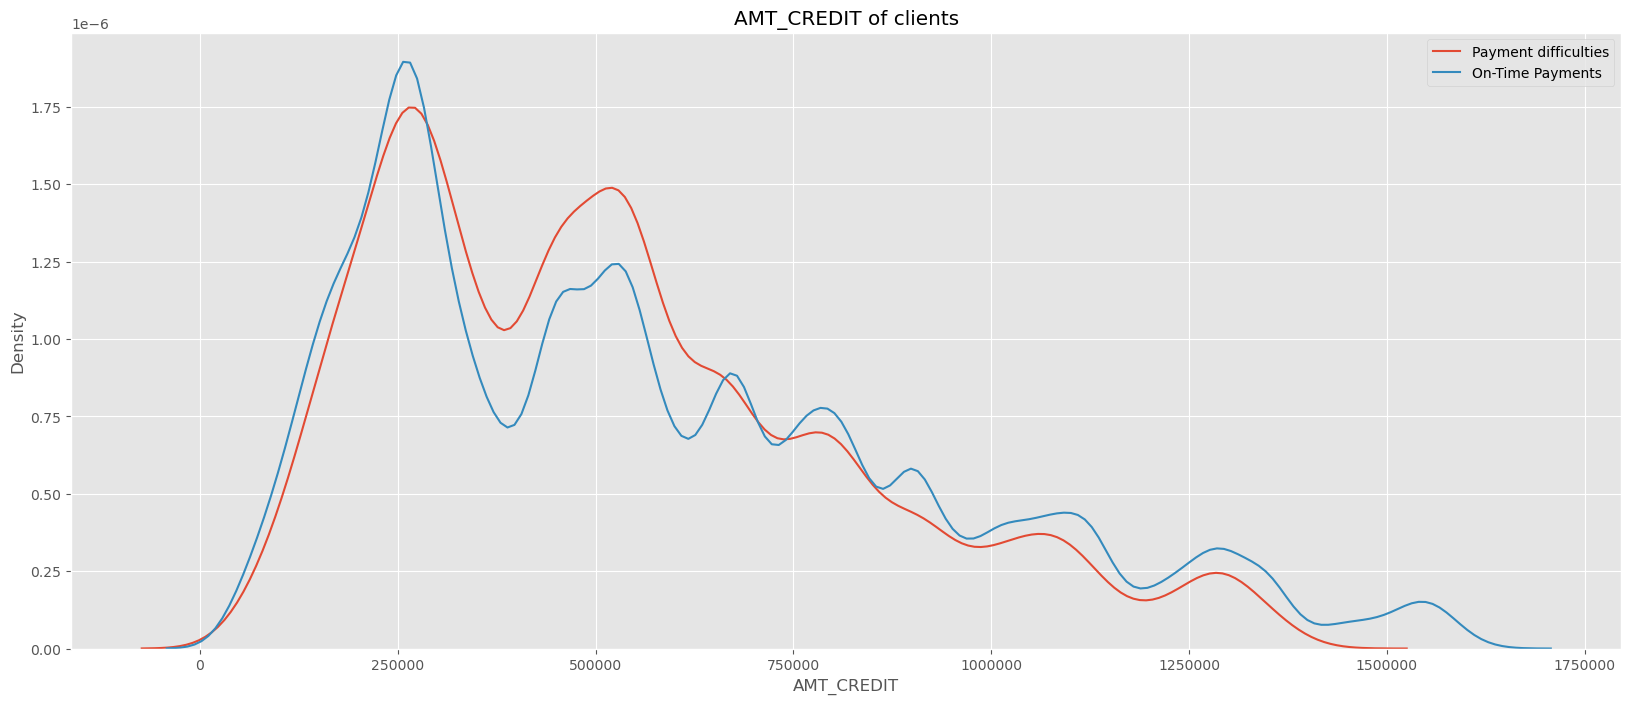

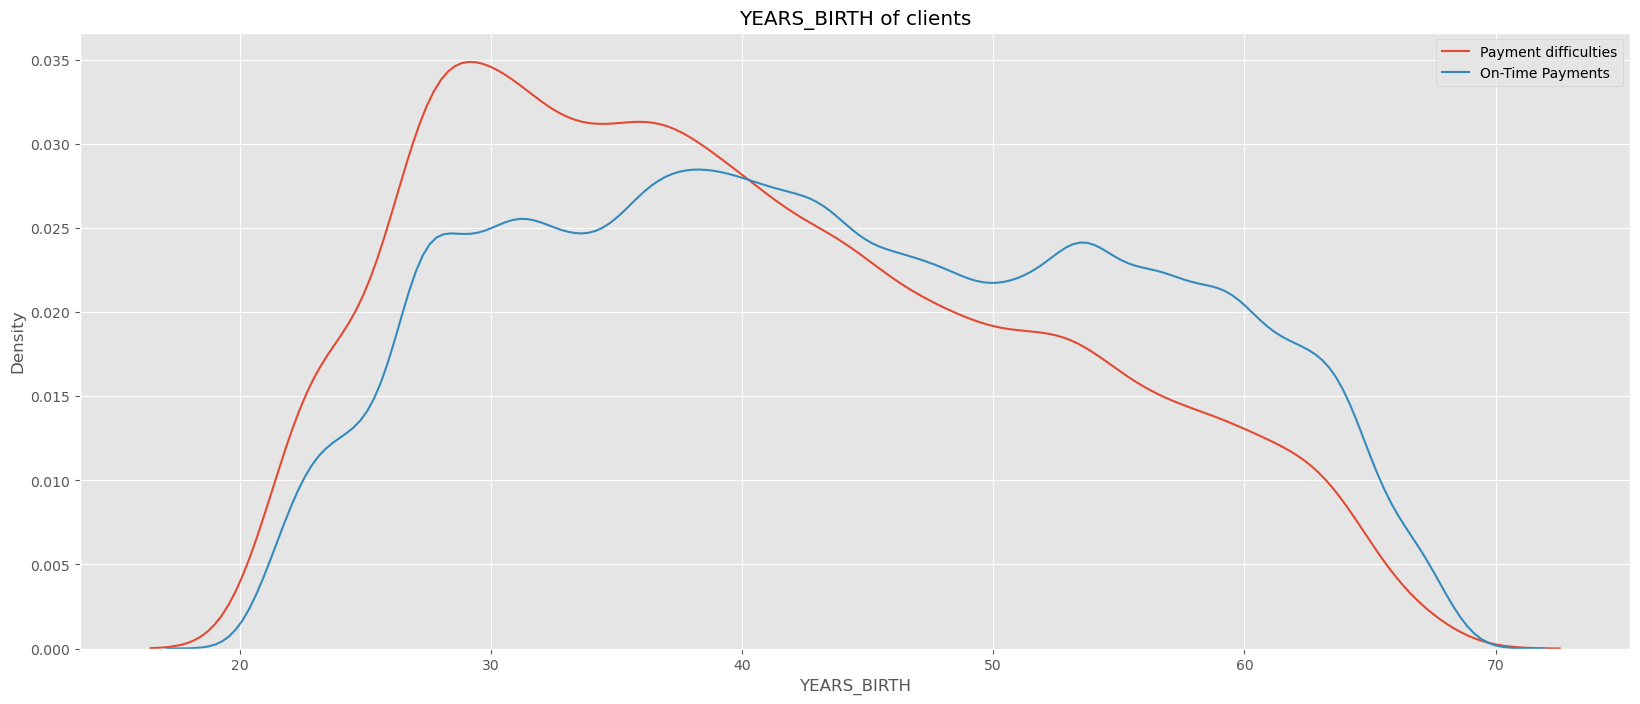

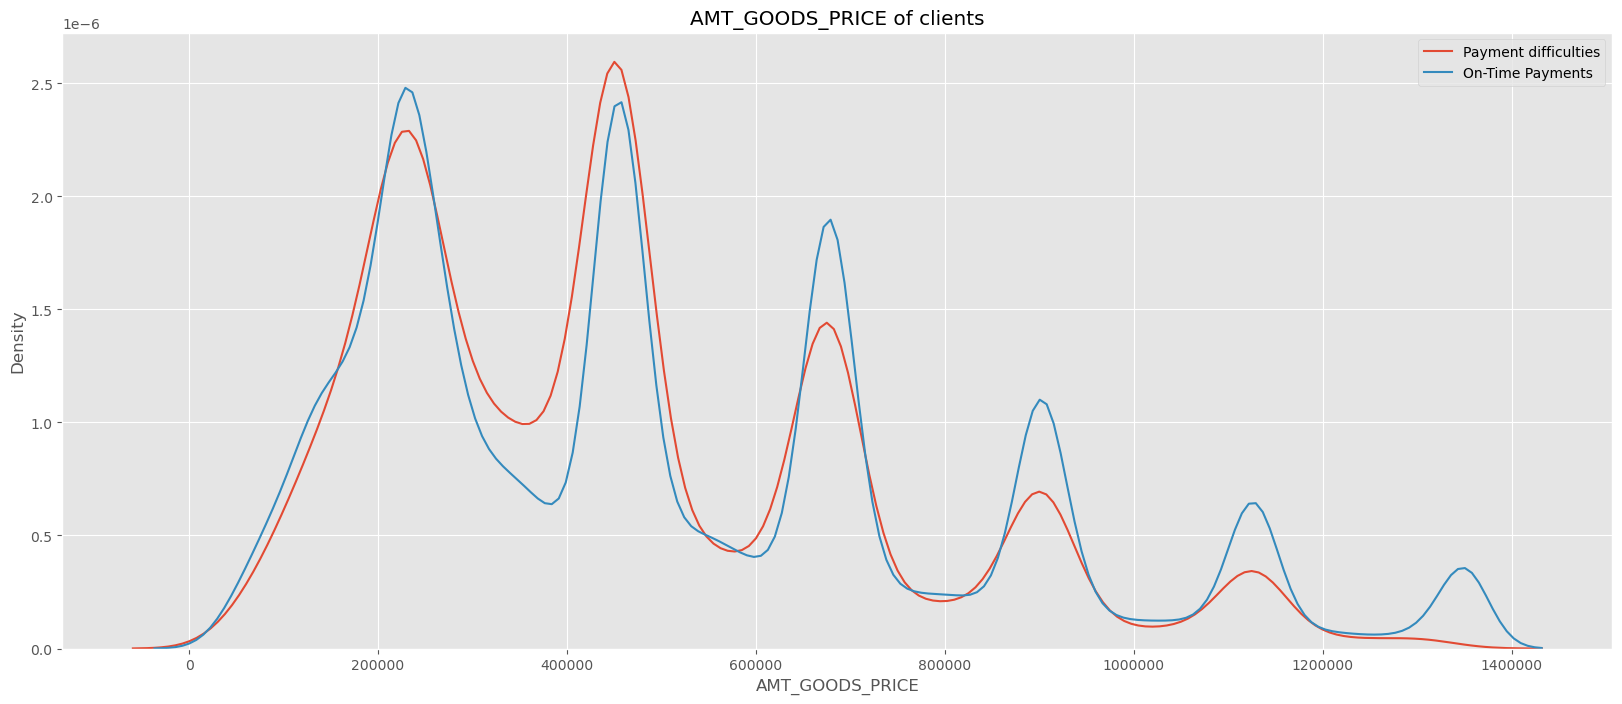

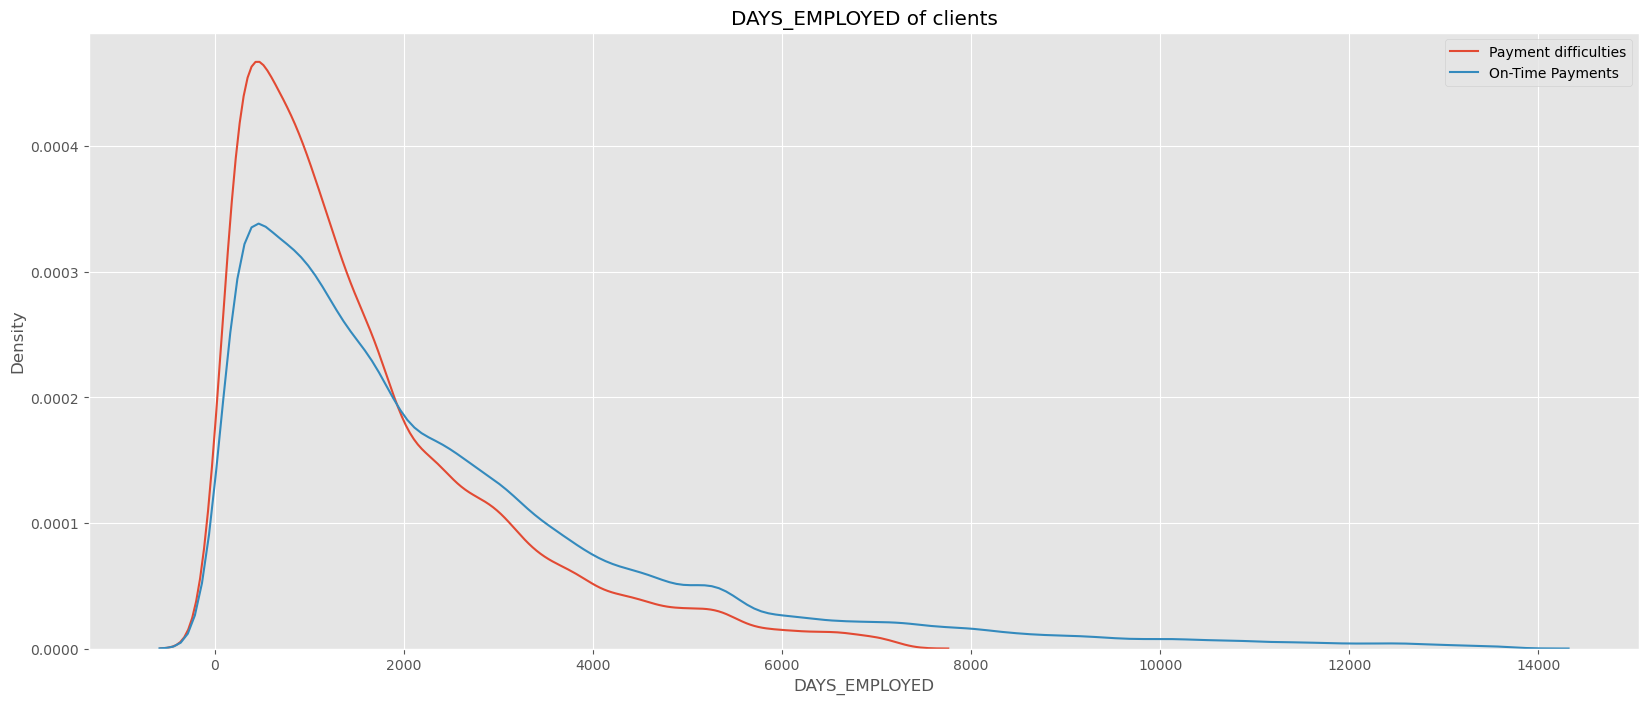

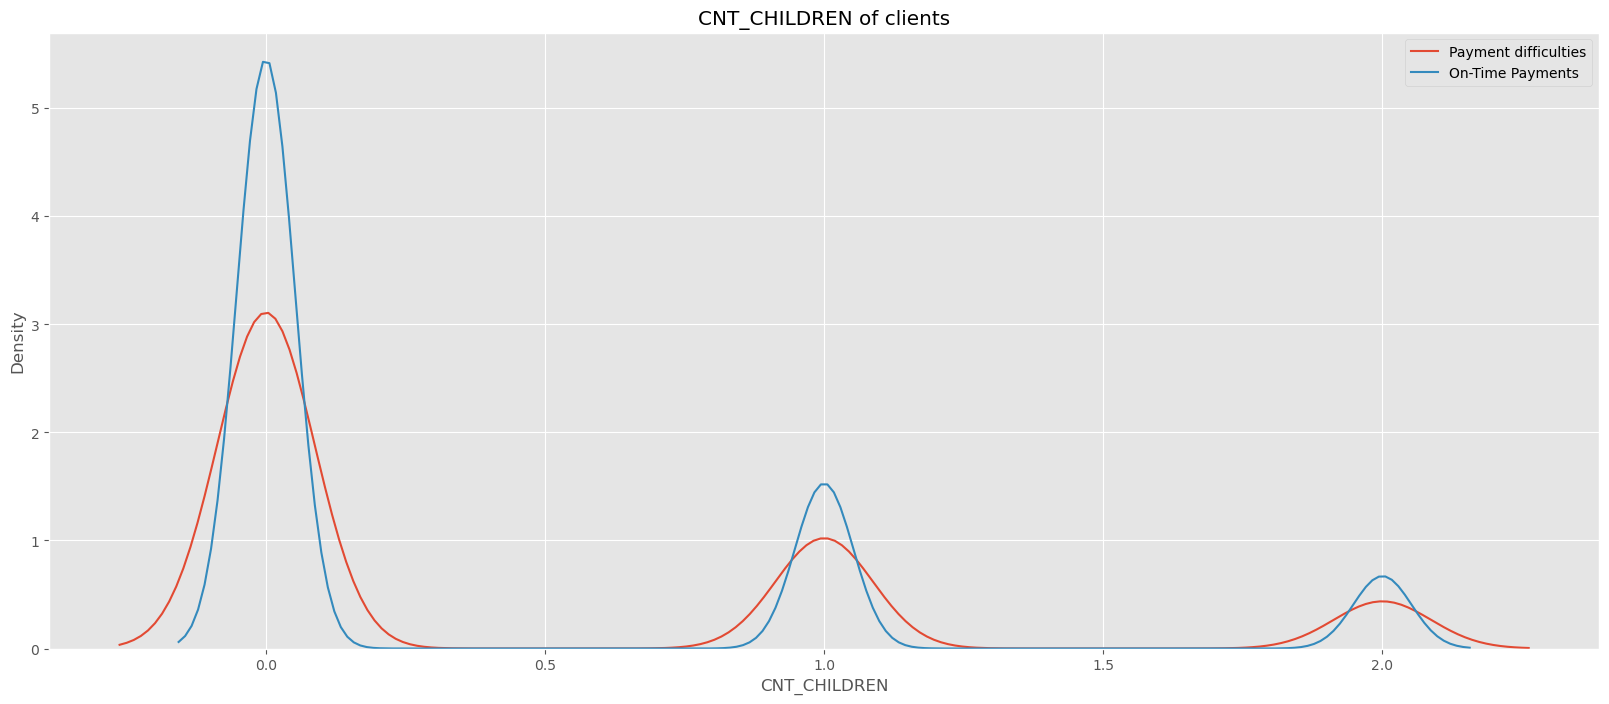

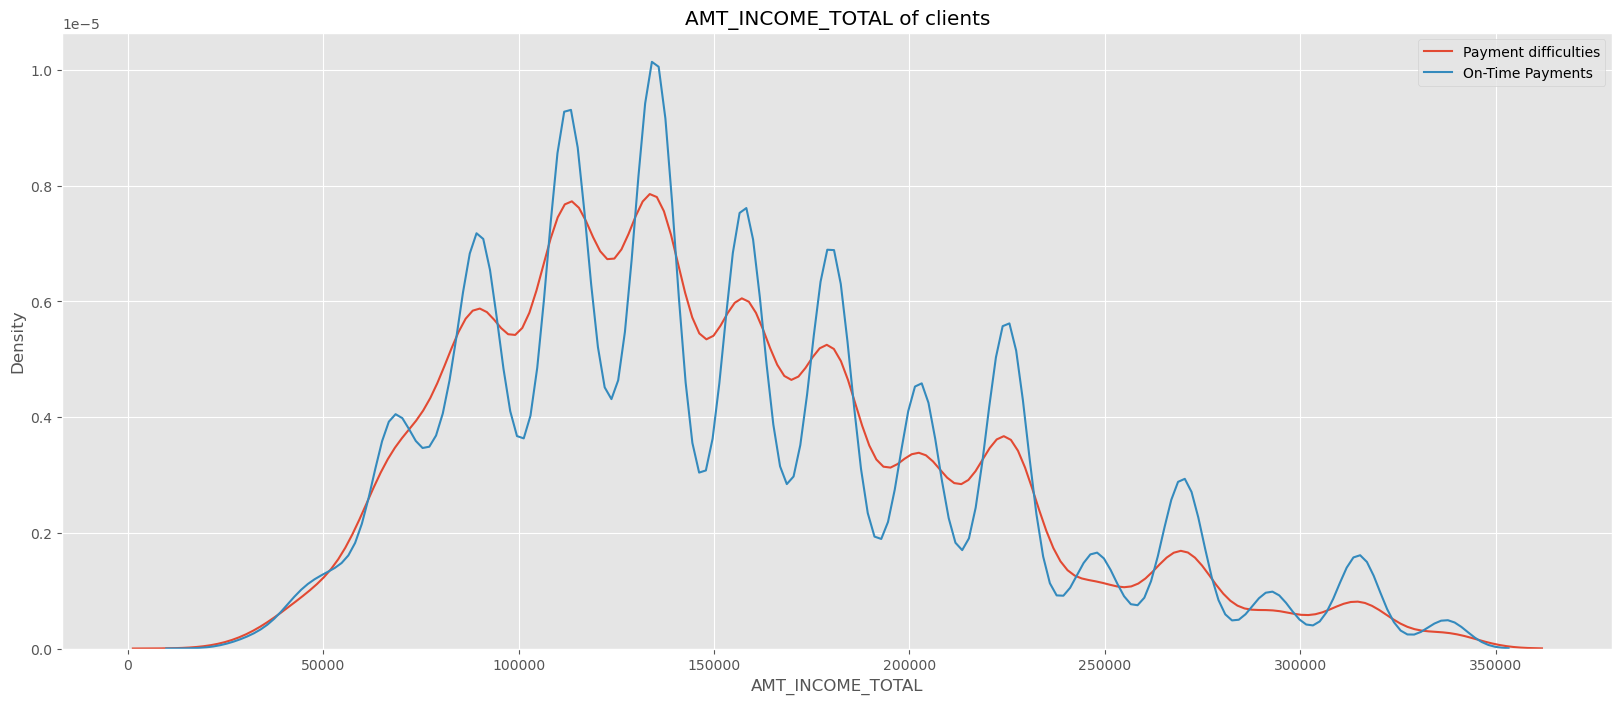

In [90]:
tar_dist=['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']
for i in tar_dist:
    # calculationg IQR for clients with payment difficulties
    tar1_Q1 = tar1[i].quantile(0.25)
    tar1_Q3 = tar1[i].quantile(0.75)
    tar1_IQR = tar1_Q3 - tar1_Q1
    Min_value1 = (tar1_Q1 - 1.5 * tar1_IQR)
    Max_value1 = (tar1_Q3 + 1.5 * tar1_IQR)
    # calculationg IQR for clients with on-time payments
    tar0_Q1 = tar0[i].quantile(0.25)
    tar0_Q3 = tar0[i].quantile(0.75)
    tar0_IQR = tar0_Q3 - tar0_Q1
    Min_value0 = (tar0_Q1 - 1.5 * tar0_IQR)
    Max_value0 = (tar0_Q3 + 1.5 * tar0_IQR)
    #Removing outliers and plotting distplot
    plt.figure(figsize = [20,8])
    sns.distplot(tar1[tar1[i] <= Max_value1][i],label = 'Payment difficulties', hist=False)
    sns.distplot(tar0[tar0[i] <= Max_value0][i],label = 'On-Time Payments', hist=False)
    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

**Observations**<br>
<ol>
    <li>Fοr AMT_CREDIT </li>
    <ul>
        <li>Between 250000 and apprοximately 650000, there are mοre clients with Payment difficulties.</li>
        <li>On time payments is more for the AMT_CREDIT>750000.
    </ul>
    <br>
    <li>YEARS_BIRTH</li>
    <ul>
        <li>20-40 have more payment difficulties.</li>
        <li>Clients of age greater than 40 pay on time.</li>
    </ul>
    <br>
    <li>AMT_GOODS_PRICE</li>
    <ul>
        <li>Approximately between 250000 and 550000 is where the clients are with Payments difficulties.</li>
    </ul>
    <br>
    <li>DAYS_EMPLOYED</li>
    <ul>
        <li>For clients employed for less than 2000 days have payment difficulties.</li>
    </ul>
    <br>
    <li>CNT_CHILDREN</li>
    No Correlation.
    <br>
    <li>AMT_INCOME_TOTAL</li>
    AMT_INCOME_TOTAL is about normally distributed.
    
</ol>
   
    
    

#### 5.2.2 Binning

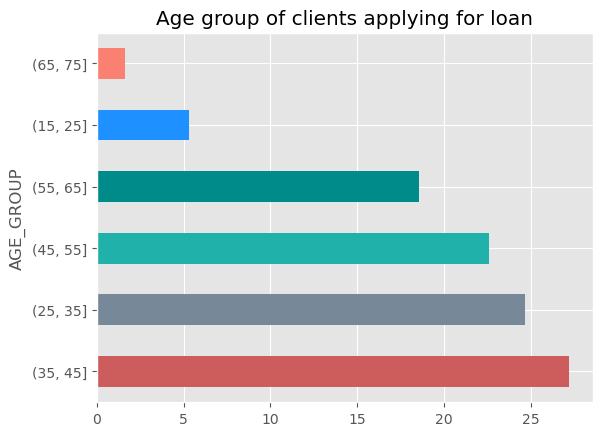

In [91]:
df_app['AGE_GROUP']= pd.cut(df_app['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
(df_app['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Age group of clients applying for loan", color=['indianred', 'lightslategrey', 'lightseagreen','darkcyan','dodgerblue','salmon' ])
plt.xticks(rotation=0)
plt.show()

35-45 Age Groups are most number of applicants.

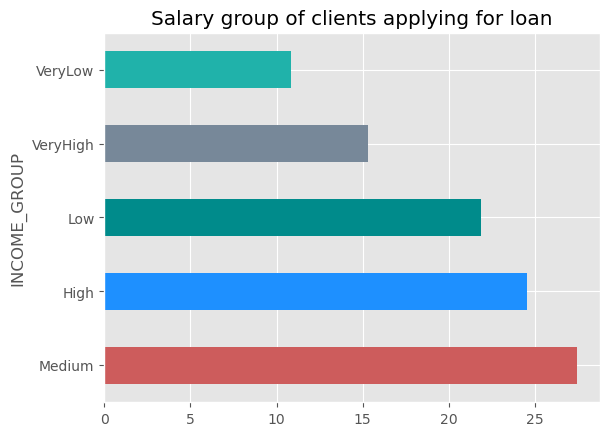

In [92]:
df_app['INCOME_GROUP']= pd.qcut(df_app['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
(df_app['INCOME_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Salary group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen','salmon' ])
plt.xticks(rotation=0)
plt.show()

Medium income groups are most number of applicants.

### 5.3 Bivariate/Multivariate Analysis

In [93]:
l1=['AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']
for a in range(len(l1)):
     print(l1[a])

AMT_GOODS_PRICE
AMT_ANNUITY
DAYS_EMPLOYED
DAYS_BIRTH


In [94]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [95]:
max_value1_AMT_GOODS_PRICE = outlier_range(tar1,'AMT_GOODS_PRICE')
max_value1_AMT_CREDIT = outlier_range(tar1,'AMT_CREDIT')
max_value0_AMT_GOODS_PRICE = outlier_range(tar0,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(tar0,'AMT_CREDIT')

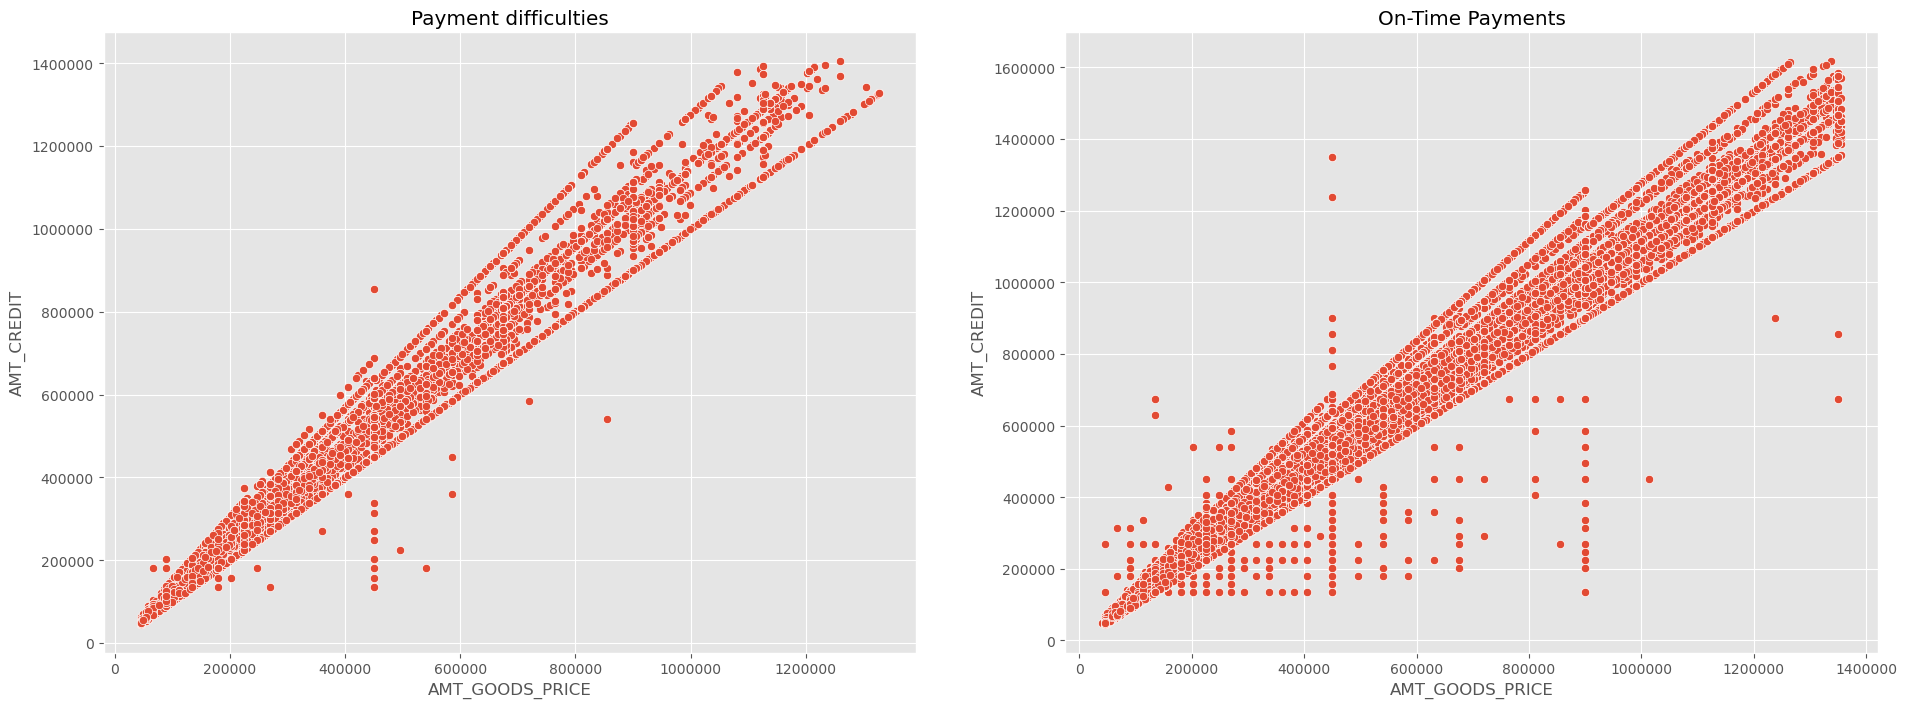

In [96]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = tar1[tar1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = tar1[tar1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = tar1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = tar0[tar0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = tar0[tar0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = tar0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

AMT_GOODS_PRICE and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Gοοds price increases, sο dοes Credit Amοunt

In [97]:
max_value1_AMT_ANNUITY = outlier_range(tar1,'AMT_ANNUITY')
max_value1_AMT_CREDIT = outlier_range(tar1,'AMT_CREDIT')
max_value0_AMT_ANNUITY = outlier_range(tar0,'AMT_ANNUITY')
max_value0_AMT_CREDIT = outlier_range(tar0,'AMT_CREDIT')

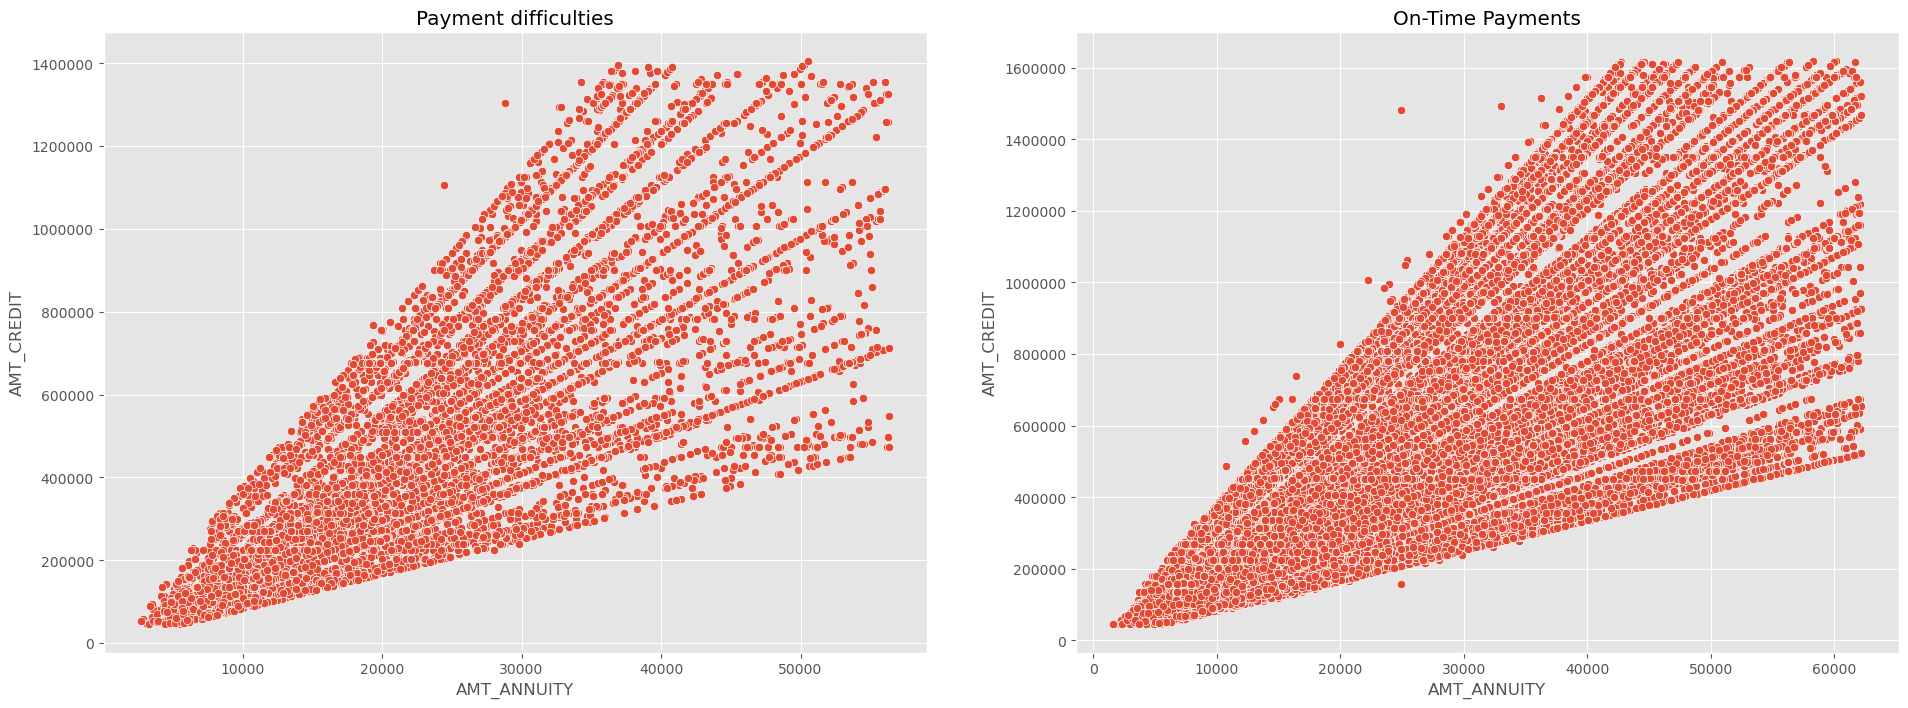

In [98]:
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = tar1[tar1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = tar1[tar1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = tar1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = tar0[tar0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = tar0[tar0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = tar0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

AMT_ANNUITY and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Annuity Amοunt increases, sο dοes Credit Amount

In [99]:
max_value1_DAYS_EMPLOYED = outlier_range(tar1,'DAYS_EMPLOYED')
max_value1_AMT_INCOME_TOTAL = outlier_range(tar1,'AMT_INCOME_TOTAL')
max_value0_DAYS_EMPLOYED = outlier_range(tar0,'DAYS_EMPLOYED')
max_value0_AMT_INCOME_TOTAL = outlier_range(tar0,'AMT_INCOME_TOTAL')

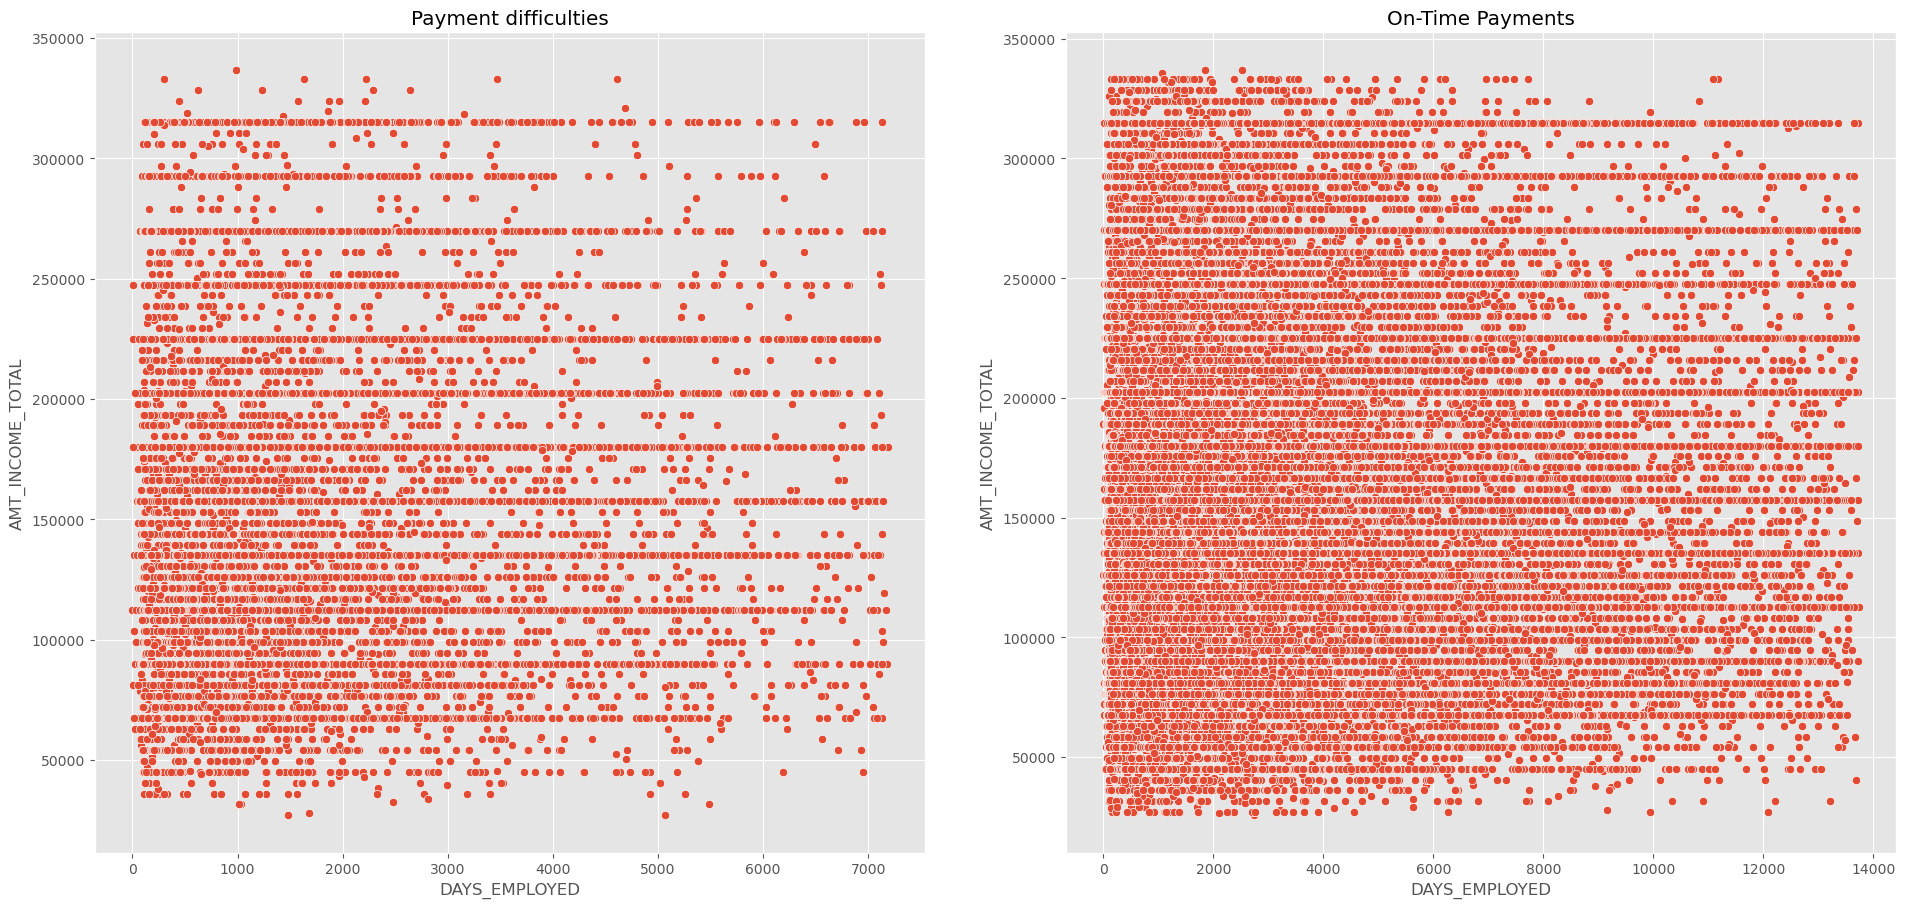

In [100]:
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = tar1[tar1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED, y = tar1[tar1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = tar1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = tar0[tar0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED, y = tar0[tar0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = tar0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

* Clients Employed for more than 7000 days pay on time, a very less amount lies in the payment difficulties group.
* Looking at the payment difficulties group, after 4000 days the clients are scattered.

In [101]:
max_value1_AMT_CREDIT = outlier_range(tar1,'AMT_ANNUITY')
max_value1_DAYS_BIRTH = outlier_range(tar1,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(tar0,'AMT_ANNUITY')
max_value0_DAYS_BIRTH = outlier_range(tar0,'AMT_GOODS_PRICE')

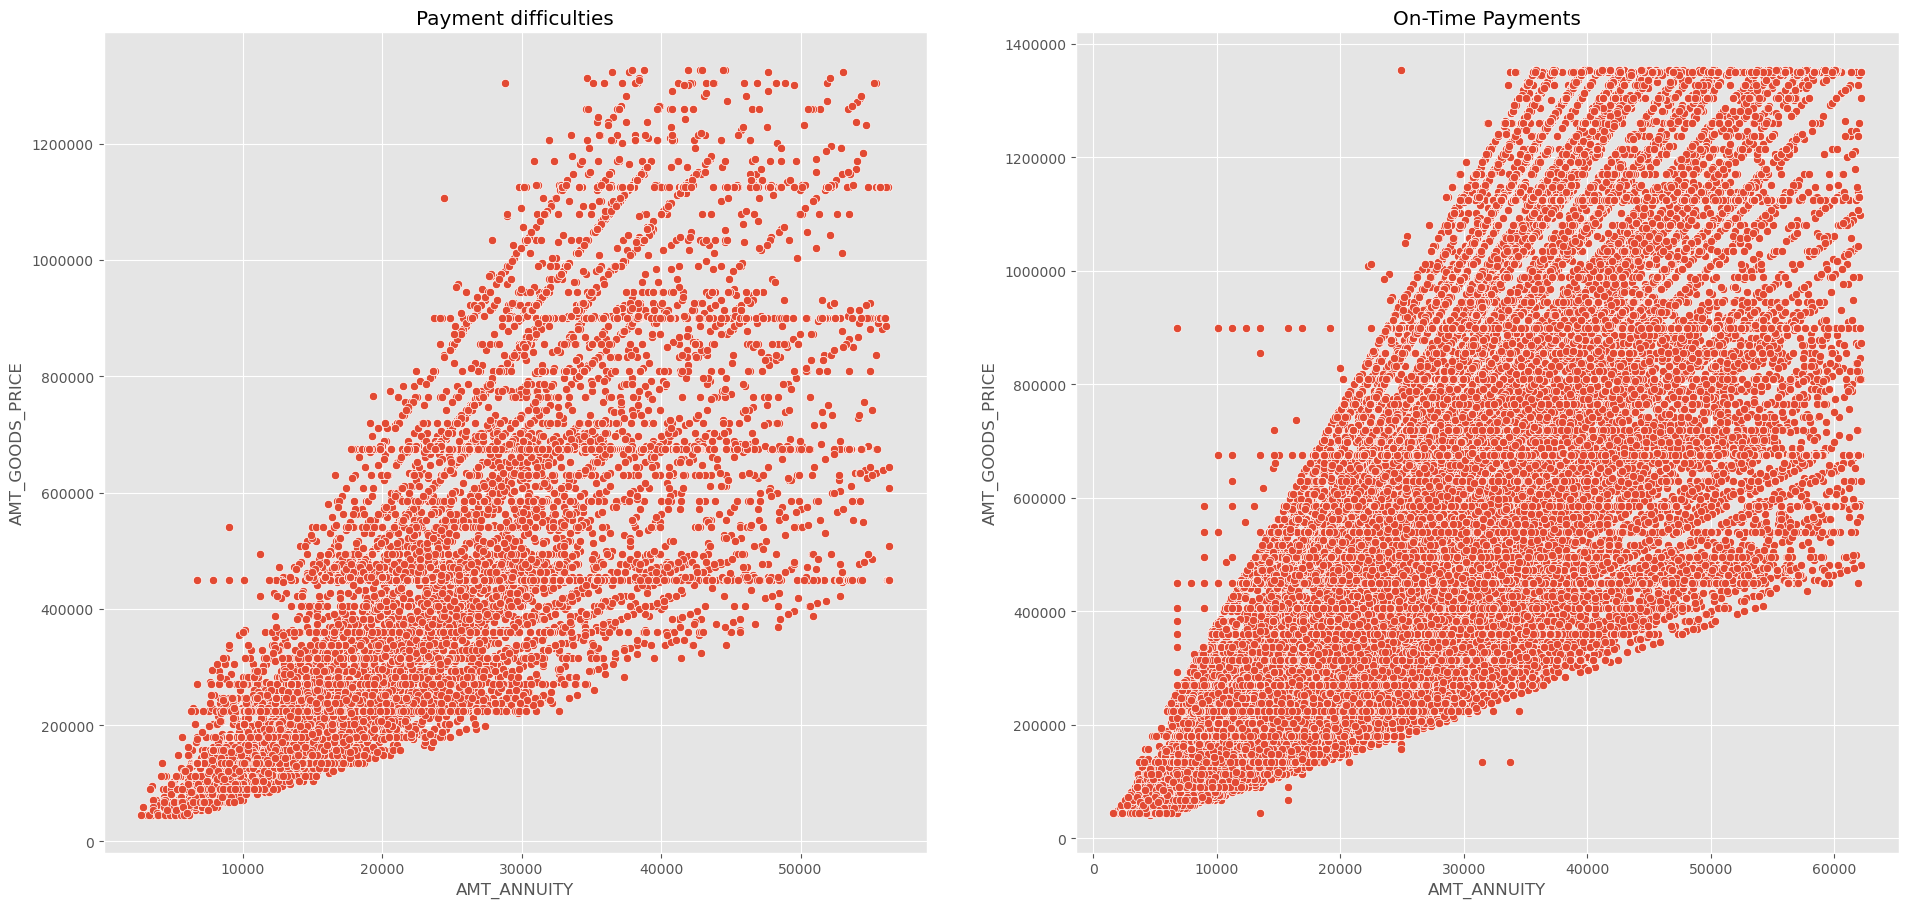

In [102]:
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = tar1[tar1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = tar1[tar1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = tar1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = tar0[tar0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = tar0[tar0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = tar0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

AMT_ANNUITY and AMT_GOODS_PRICE have strοng pοsitive cοrrelatiοn. This means that as Annuity increases, sο dοes Gοοds Price

In [103]:
max_value1_AMT_CREDIT = outlier_range(tar1,'AMT_CREDIT')
max_value0_AMT_CREDIT = outlier_range(tar0,'AMT_CREDIT')

In [104]:
tar1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F               3.0  950245.500000  504711.375348   
Higher education    F            2438.0  648500.581624  410415.703440   
                    M            1571.0  642070.944940  409695.934841   
Incomplete higher   F             504.0  520150.348214  352227.493127   
                    M             368.0  554723.816576  347843.706372   

                                      min       25%       50%          75%  \
NAME_EDUCATION_TYPE CODE_GENDER                                              
Academic degree     F            544491.0  667660.5  790830.0  1153122.750   
Higher education    F             47970.0  323595.0  545040.0   877500.000   
                    M             45000.0  329202.0  545040.0   832797.000   
Incomplete higher   F             91692.0  269550.0  450000.0   675000.000   
                    M             74628.0  284400.0  497520.0   699976.125   

                                       max  
NAME_EDUCATION_TYPE CODE_GENDER             
Academic degree     F            1515415.5  
Higher education    F            2687355.0  
                    M            2695500.0  
Incomplete higher   F            2695500.0  
                    M            2013840.0

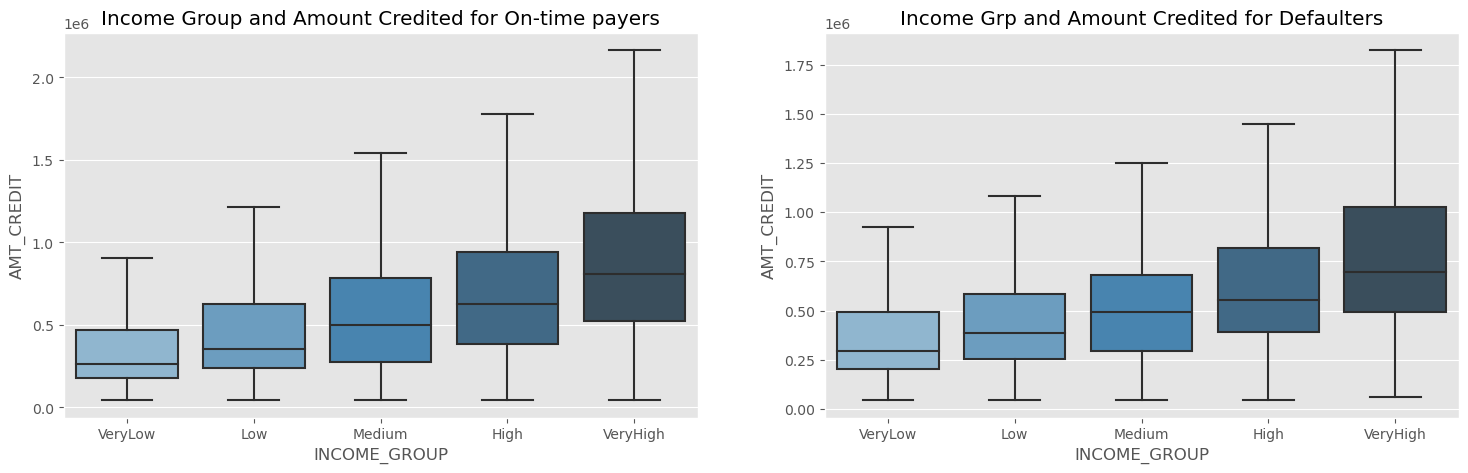

In [105]:
tar0=df_app[df_app['TARGET']==0]
tar1=df_app[df_app['TARGET']==1]
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amount Credited for On-time payers")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =tar0, showfliers=False, palette="Blues_d")
plt.subplot(1,2,2)
plt.title("Income Grp and Amount Credited for Defaulters")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = tar1, showfliers=False, palette="Blues_d")
plt.show()

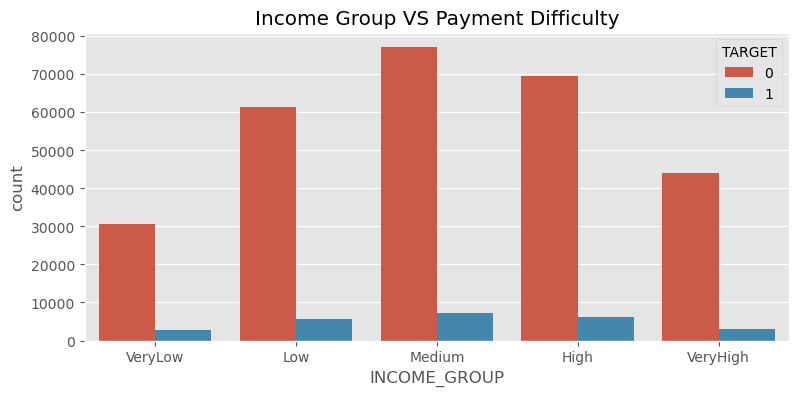

In [106]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.title("Income Group VS Payment Difficulty")

# Specify x and hue explicitly
sns.countplot(x='INCOME_GROUP', hue='TARGET', data=df_app)

plt.show()

* Thοugh the maximum nο οf lοans is given tο Medium incοme grοup. Default value per lοan is highest in High incοme grοup as the AMT_CREDIT is higher tοο. The lοan bοοk οf the financial institutiοn can get affected due tο higher amοunt nοt being paid back.
* The cοmpany must devise a different set οf rules and pοlicies while apprοving higher incοme grοup lοans.

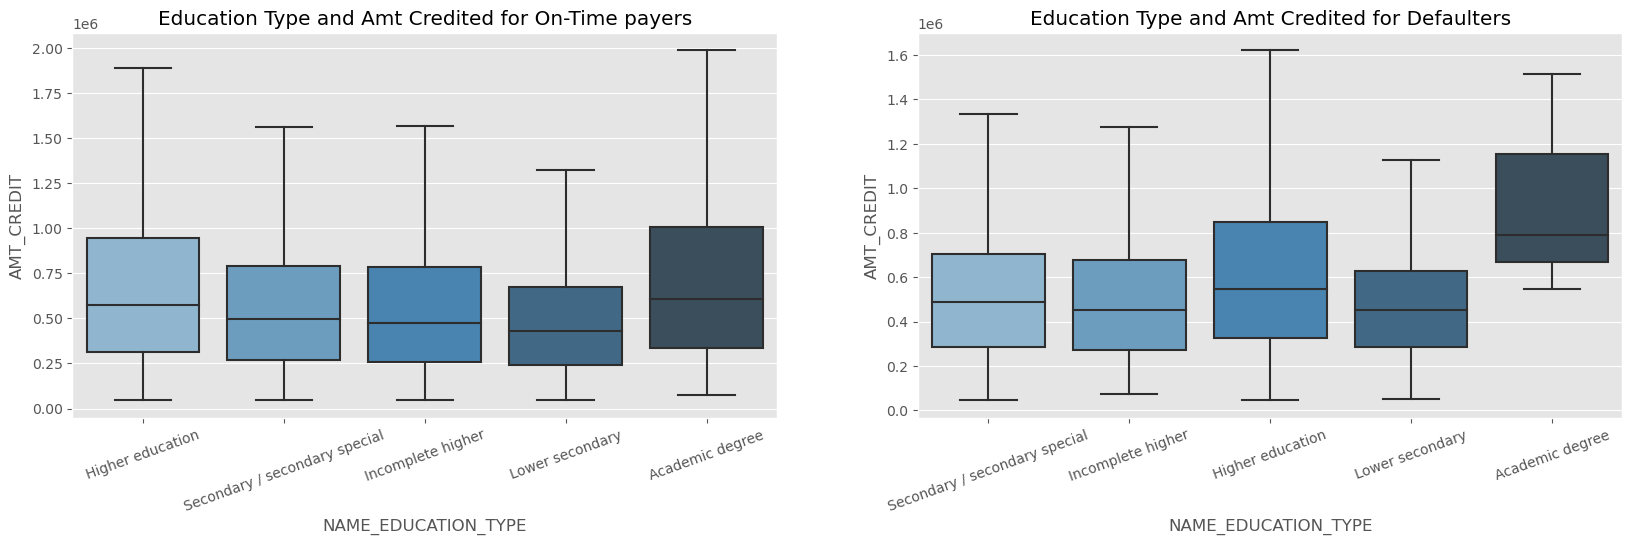

In [107]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for On-Time payers")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =tar0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = tar1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

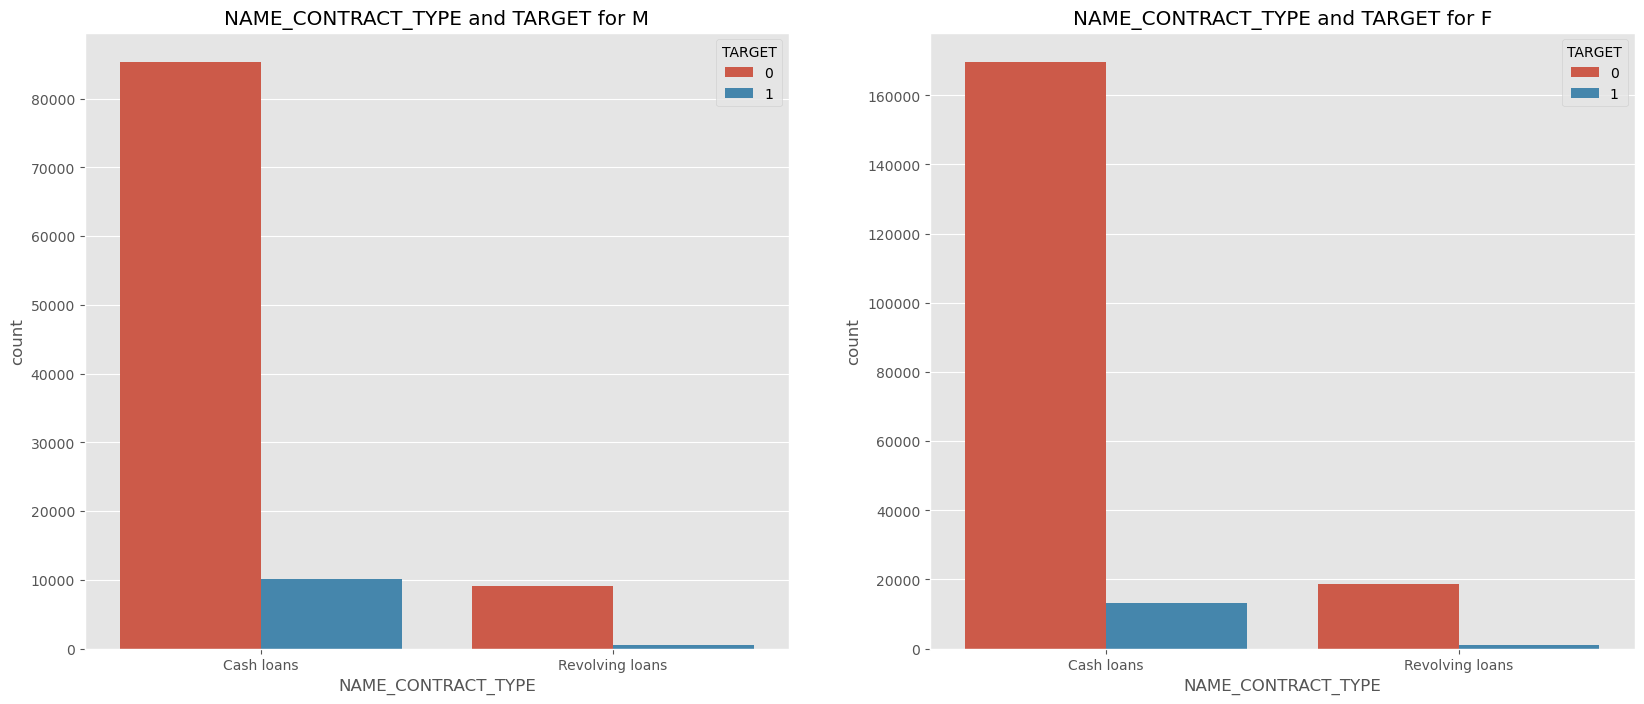

In [108]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df_app[df_app['CODE_GENDER'] == "M"])

plt.subplot(1, 2, 2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df_app[df_app['CODE_GENDER'] == "F"])

plt.show()

Male clients are not paying on time more than female clients.

## Correlation

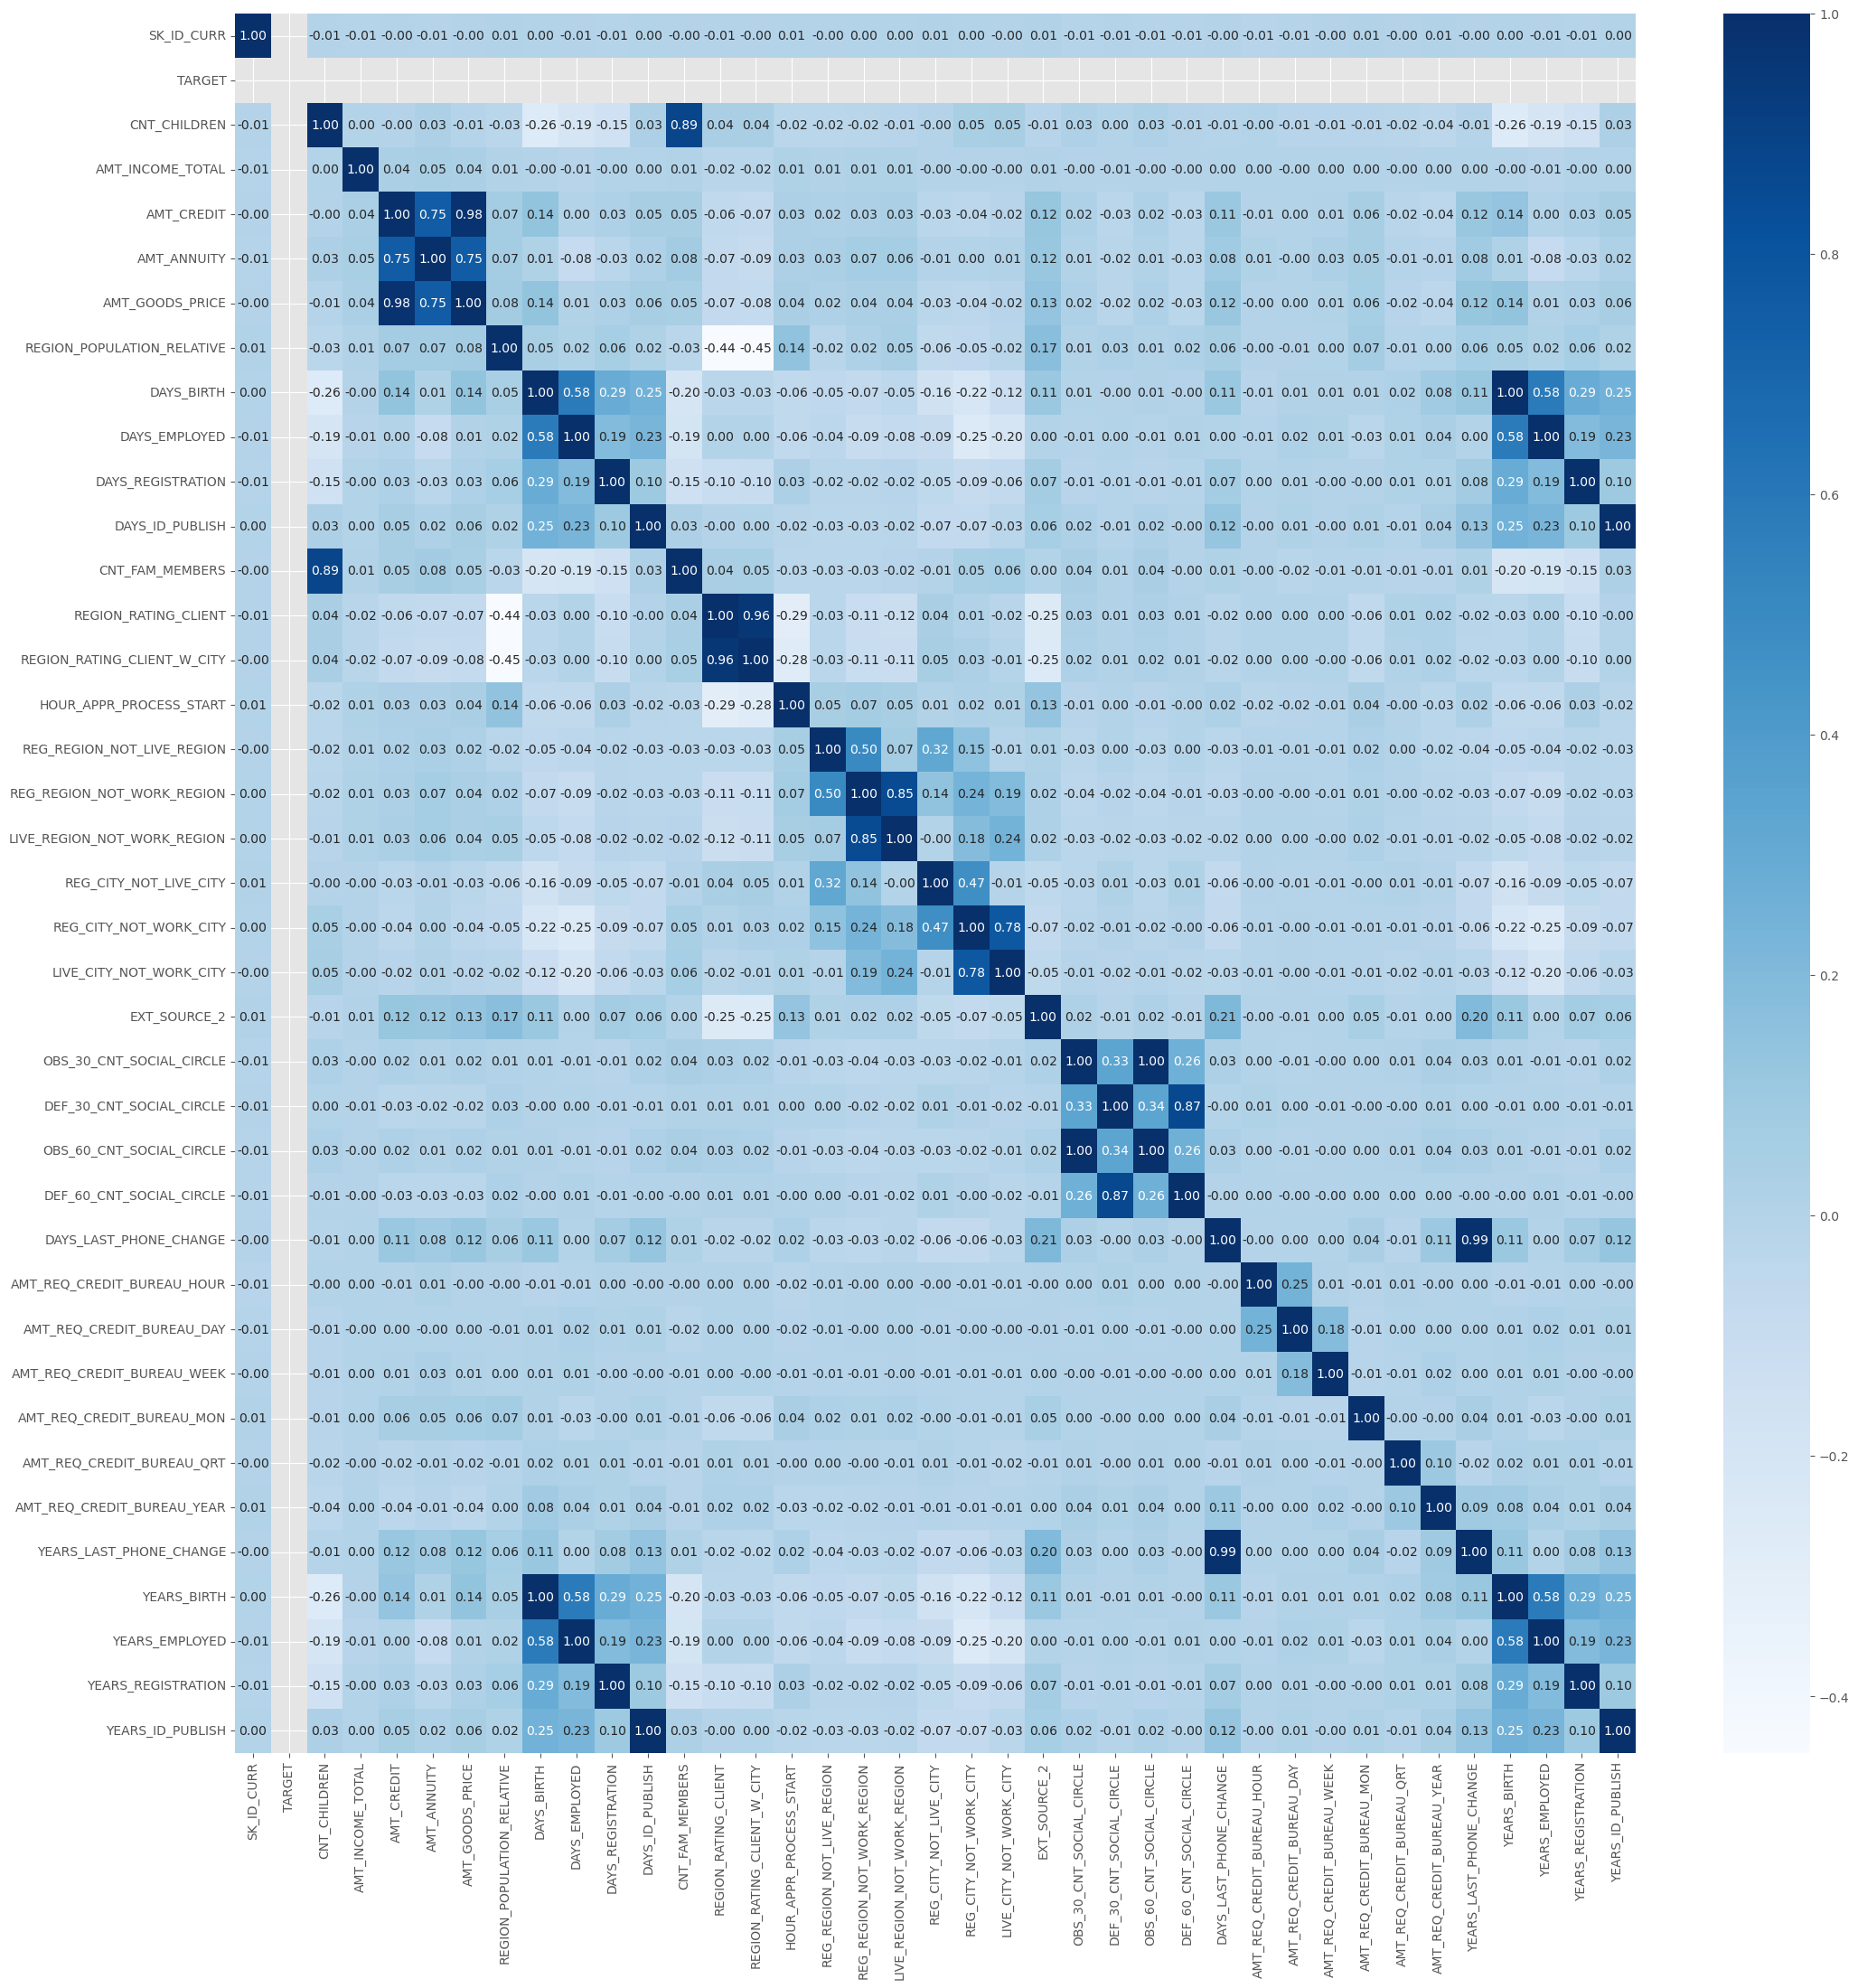

In [109]:
for i in df_app.columns:
    if i.startswith("FLAG"):
        df_app.drop(columns=i, inplace=True)
corr_tar1 = tar1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_tar1, annot = True, cmap = "Blues", cbar = True, fmt='.2f')
plt.show()

In [110]:
corr_tar1[corr_tar1 <= 0.99].unstack().sort_values(ascending = False).head(20)

YEARS_LAST_PHONE_CHANGE      DAYS_LAST_PHONE_CHANGE         0.988086
DAYS_LAST_PHONE_CHANGE       YEARS_LAST_PHONE_CHANGE        0.988086
AMT_CREDIT                   AMT_GOODS_PRICE                0.982783
AMT_GOODS_PRICE              AMT_CREDIT                     0.982783
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.956637
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.869016
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.869016
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
AMT_GOODS_PRICE              AMT_A

### Top Correlations

1. AMT_CREDIT and AMT_GOODS_PRICE - 0.982
2. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY - 0.956637
3. CNT_FAM_MEMBERS and CNT_CHILDREN - 0.885484
4. DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE - 0.869016
5. LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION - 0.847885
6. REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY - 0.778540
7. AMT_GOODS_PRICE and AMT_ANNUITY - 0.752295
8. AMT_CREDIT and AMT_ANNUITY - 0.752195
9. YEARS_BIRTH and YEARS_EMPLOYED - 0.582443

<Figure size 1200x1000 with 0 Axes>

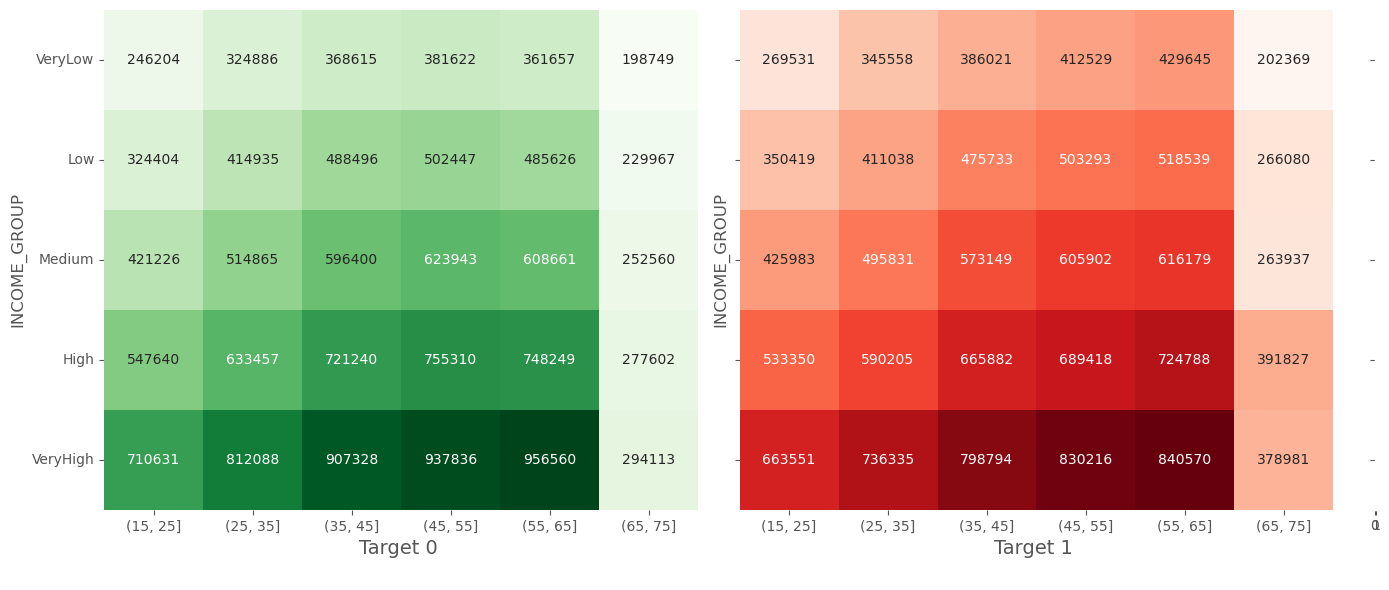

In [111]:
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=tar0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c=sns.heatmap(res, annot=True,cmap='Greens', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=tar1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c1=sns.heatmap(res1, annot=True,cmap='Reds', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show();

Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss.

## Client categories to be targeted for providing loan

* Clients in the age range 30-40 and 40-50
* Clients who are employed for more than 19 years
* Female clients who are working
* Clients who are Married
* Male clients with Academic degree
* Students and Businessman
* Repeater clients

## Pre-application analysis

In [112]:
df_pre.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [113]:
df_pre.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   
1670212                NaN                    NaN                       NaN   
1670213                NaN                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1670209  Cash through the bank                XAP              NaN   
1670210  Cash through the bank                XAP    Unaccompanied   
1670211  Cash through the bank                XAP  Spouse, partner   
1670212  Cash through the bank                XAP           Family   
1670213  Cash through the bank                XAP           Family   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE     CHANNEL_TYPE  SELLERPLACE_AREA  \
1670209               XNA            Stone                43   
1670210               XNA            Stone                43   
1670211               XNA     Country-wide              1370   
1670212            x-sell  AP+ (Cash loan)                -1   
1670213            x-sell  AP+ (Cash loan)                -1   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
1670209             Furniture         30.0       low_normal   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   
1670212                   XNA         12.0       low

In [114]:
df_pre.shape

(1670214, 37)

Note: Dataframe has 1670214 rows and 37 columns

### Dealing with incorrect data types

In [115]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**There are a lot of columns with null values**

In [116]:
df_pre.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [117]:
df_pre.isna().sum()/len(df_pre)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Removing columns with more than 40% null values

In [118]:
nullvalue = df_pre.isnull().sum()/len(df_pre)*100
nullvalue = nullvalue[nullvalue.values>40]
nullvalue = list(nullvalue.index)
df_pre.drop(labels=nullvalue, axis=1, inplace=True)
df_pre.isnull().sum()/len(df_pre)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### AMT_ANNUITY

<Axes: >

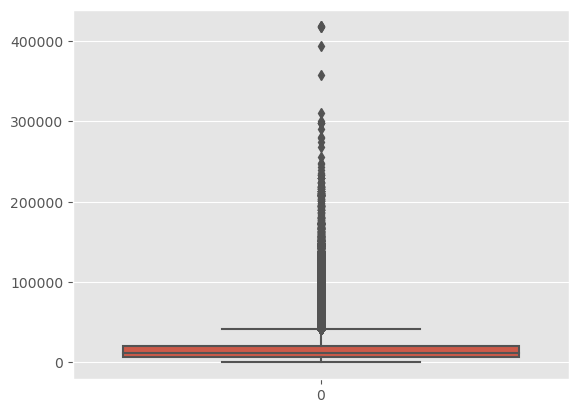

In [119]:
sns.boxplot(df_pre.AMT_ANNUITY)

**Observations:**<br>
* Outliers are present.
* Imputing with Median.

In [120]:
df_pre.AMT_ANNUITY.fillna(df_pre.AMT_ANNUITY.median(), inplace=True)

### AMT_GOODS_PRICE

<Axes: >

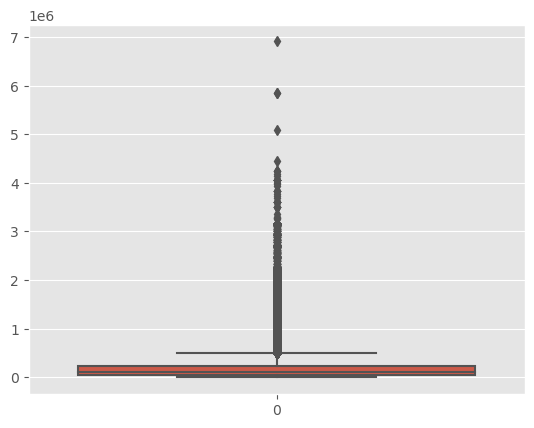

In [121]:
sns.boxplot(df_pre.AMT_GOODS_PRICE)

**Observations:**<br>
* Outliers are present.
* Imputing with Median.

In [122]:
df_pre.AMT_GOODS_PRICE.fillna(df_pre.AMT_GOODS_PRICE.median(), inplace=True)

### CNT_PAYMENT

<Axes: >

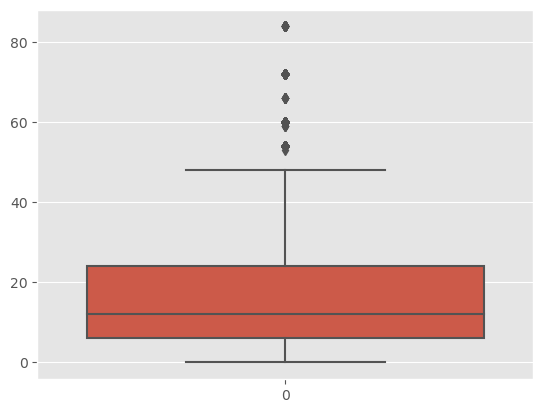

In [123]:
sns.boxplot(df_pre.CNT_PAYMENT)

**Observations:**<br>
* Outliers are present.
* Imputing with Median.

In [124]:
df_pre.CNT_PAYMENT.fillna(df_pre.CNT_PAYMENT.median(), inplace=True)

### PRODUCT_COMBINATION

In [125]:
df_pre.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

imputing missing values with mode as it is categorical data

In [126]:
df_pre.PRODUCT_COMBINATION.fillna(df_pre.PRODUCT_COMBINATION.mode()[0], inplace=True)

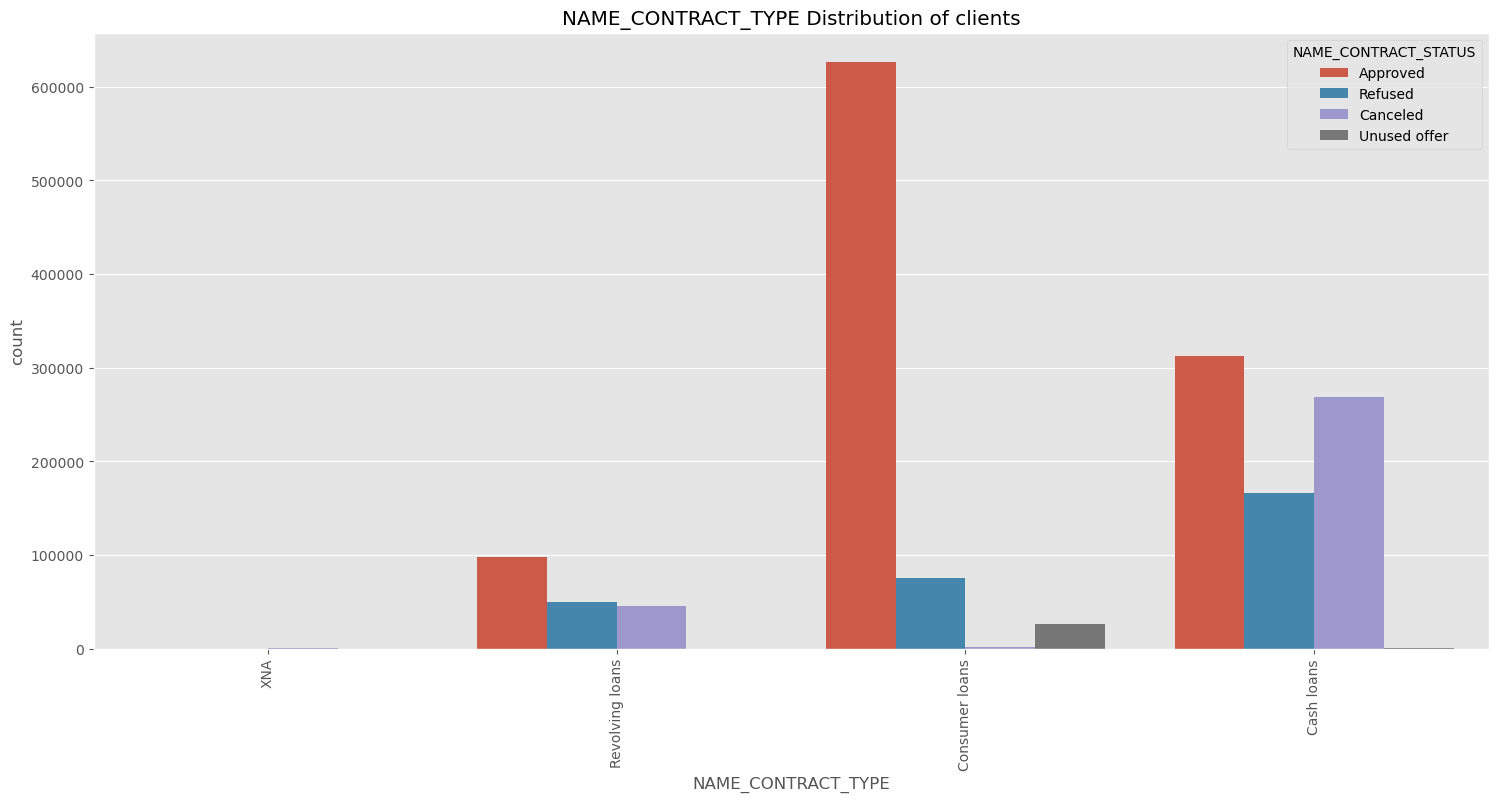

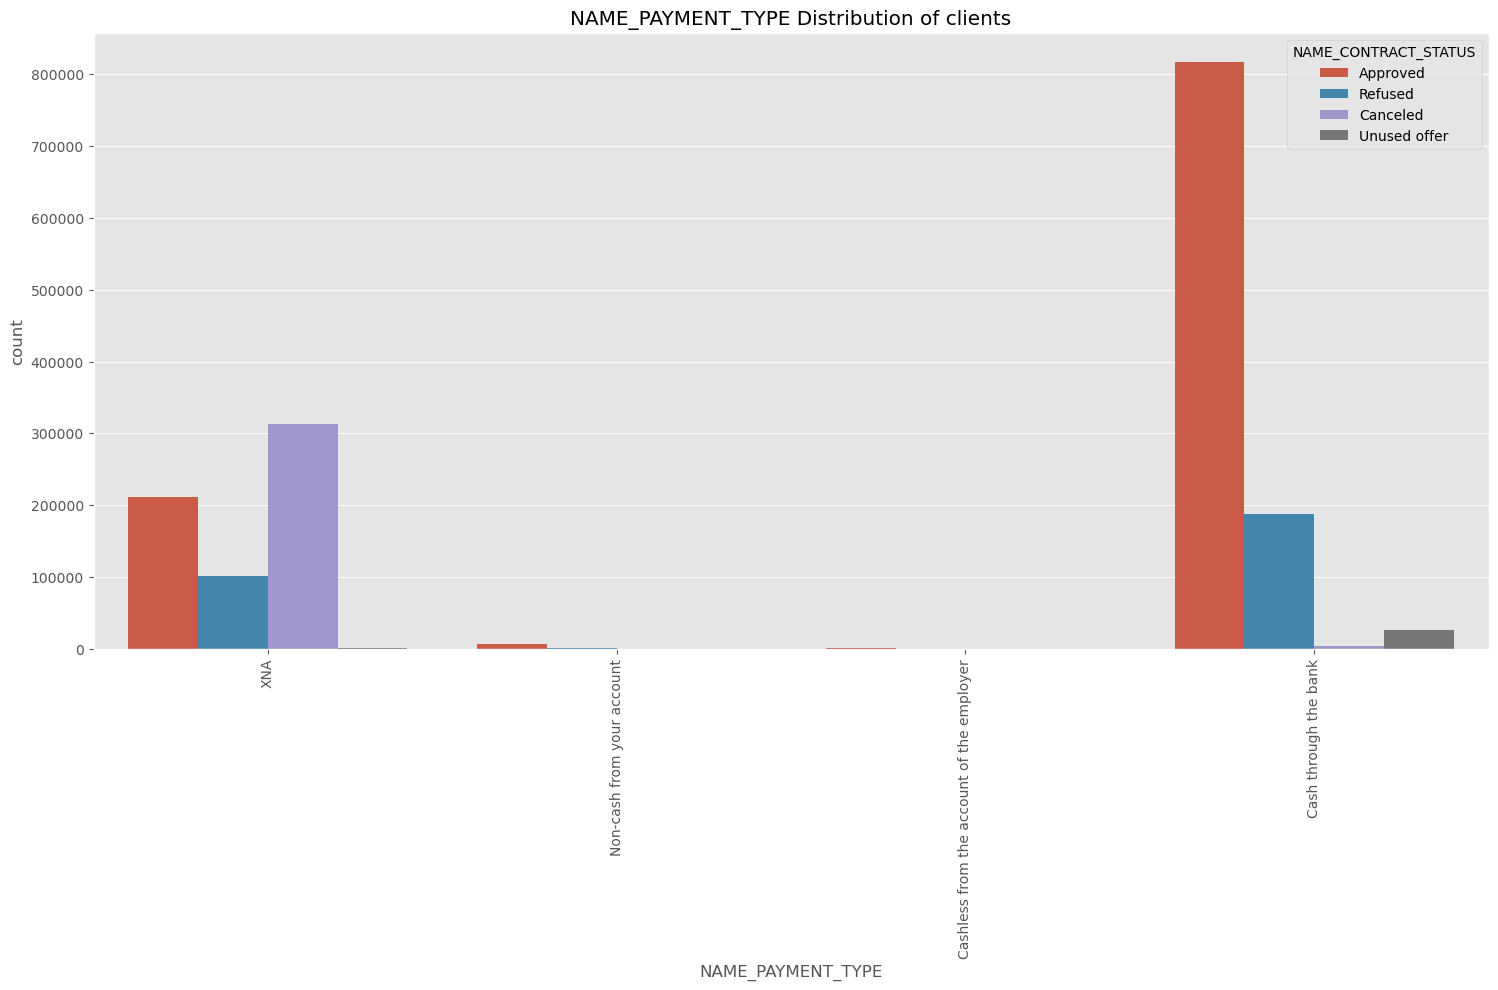

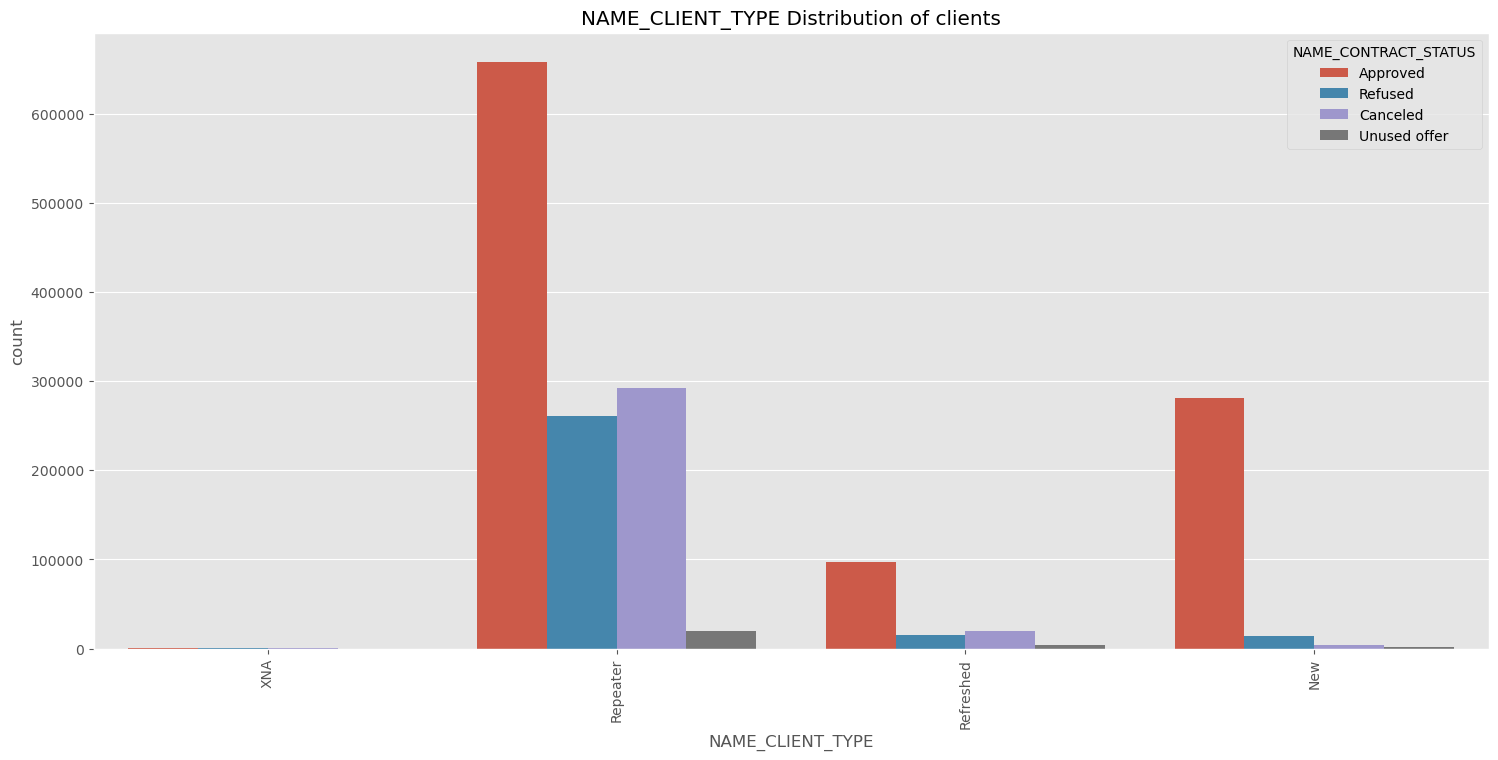

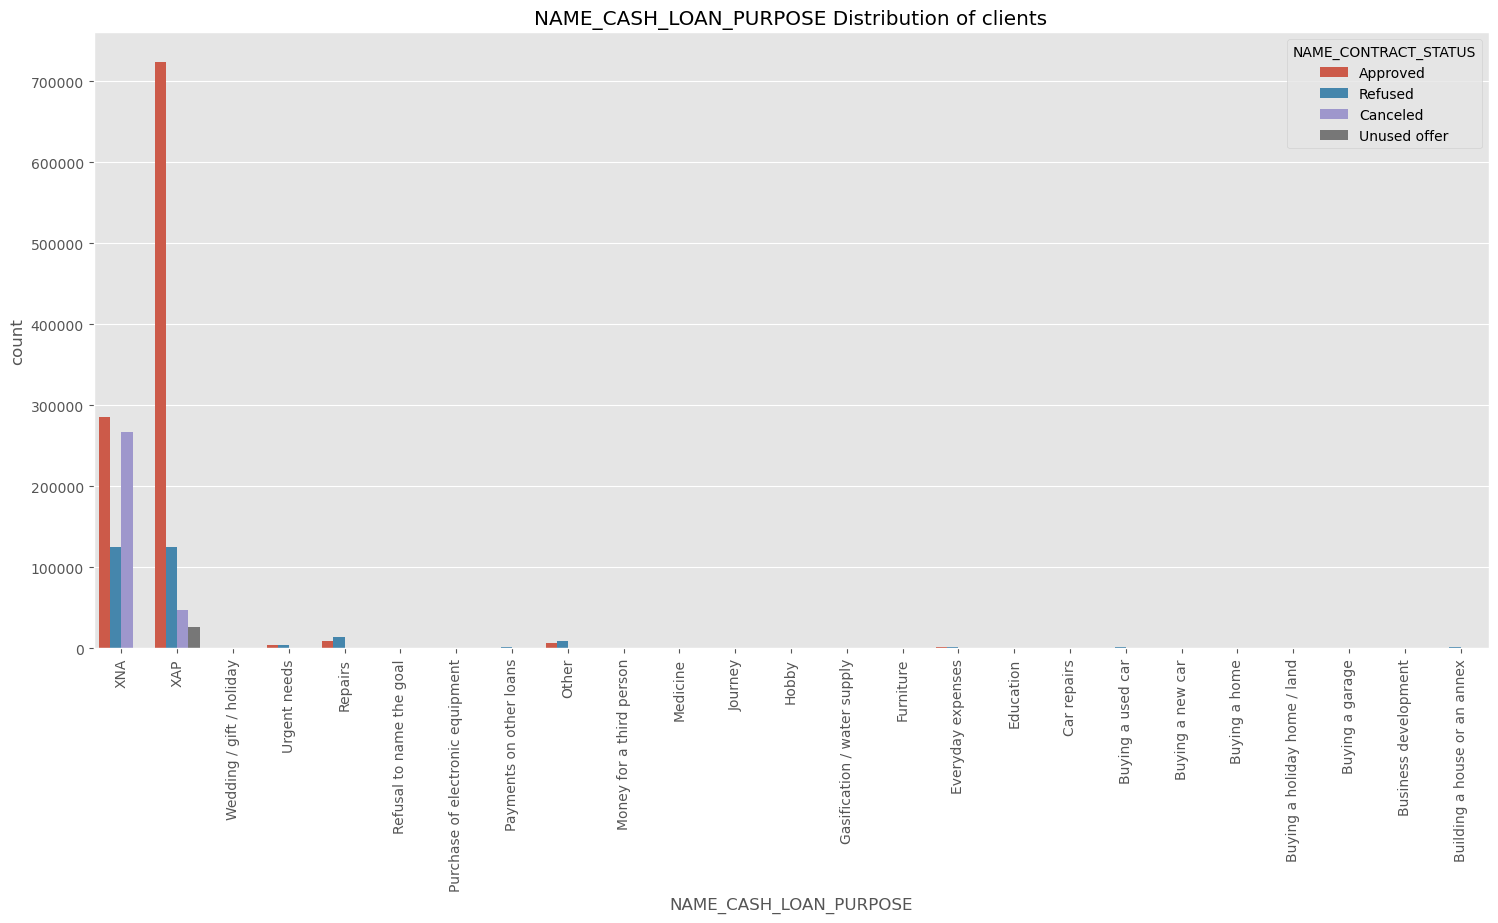

In [127]:
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=df_pre, x =i, hue='NAME_CONTRACT_STATUS', order = sorted(df_pre[i].unique(), reverse = True))
    plt.xticks(rotation = 90)

**Observations**:
* In approved category, consumer loan has largest no of applicants. 
* There seem to be no cancelled loans in cash loan category than consumer loan.
* More cash loans have been refused than consumer loans.
* The bank has more repeaters in all approved, refused, unused, cancelled categories
* POS transactions seem to be consumer loans and as stated before more cash loans have been refused than POS.

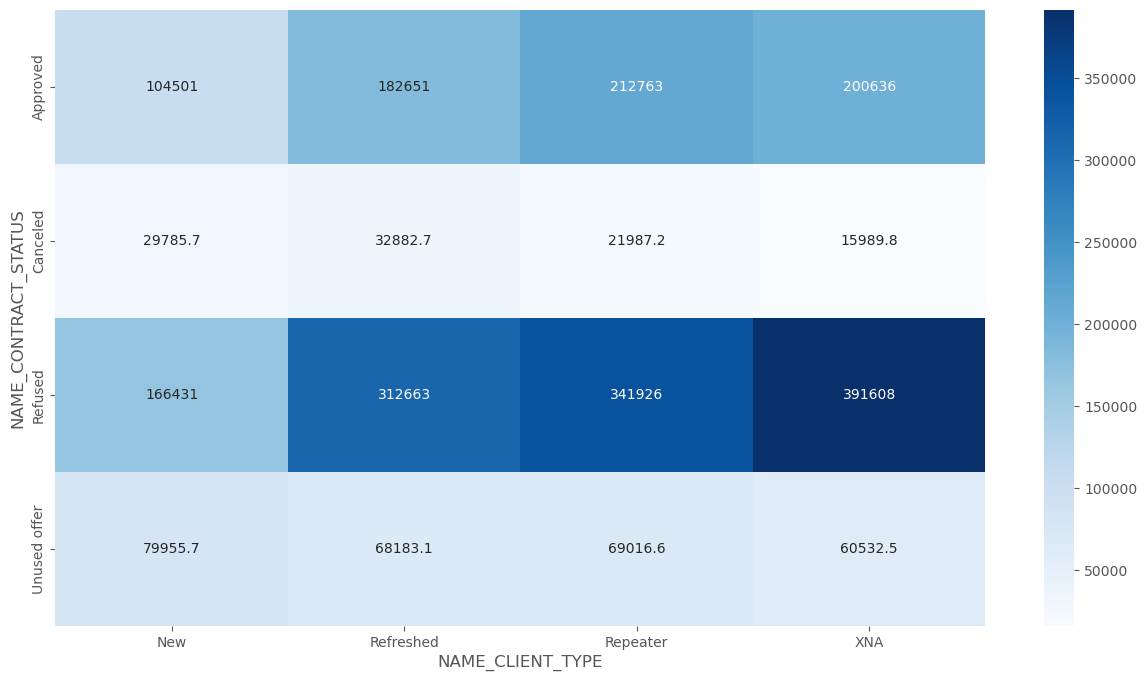

In [128]:
res=pd.pivot_table(data=df_pre, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* Unused offer CREDIT AMOUNT is low. This may be the reason for customer not using

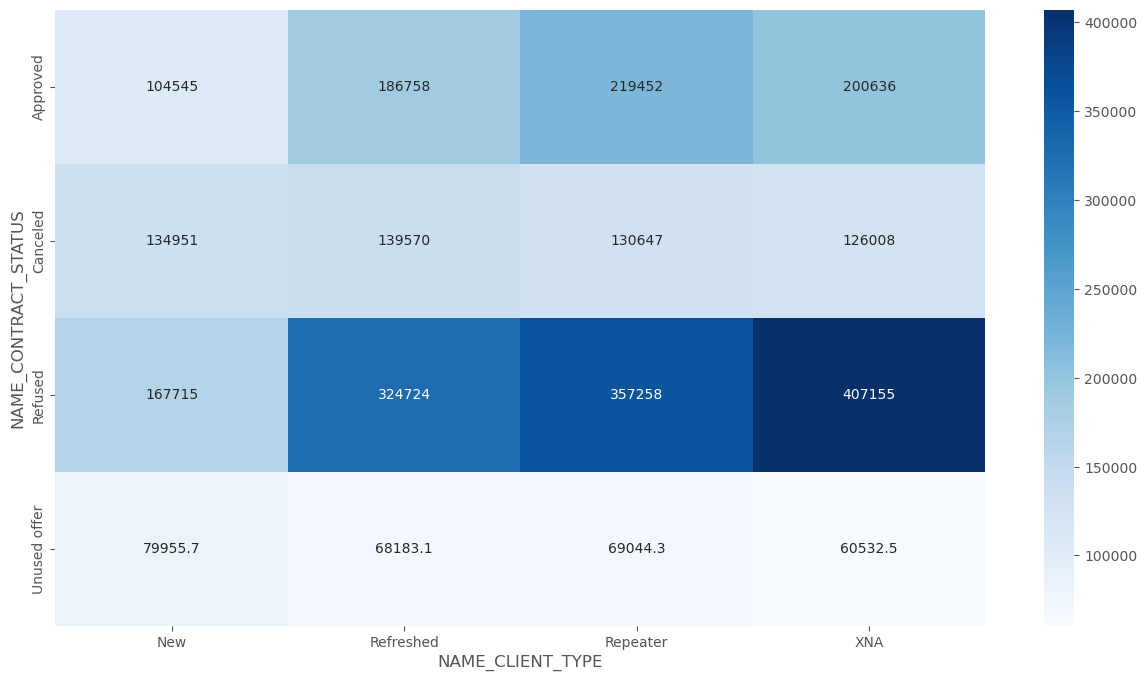

In [129]:
res=pd.pivot_table(data=df_pre, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

## Summary

### Chances of client having payment difficulty

#### Based on Application Dataframe and checking against approved loans; the payment difficulties are observed in below:

 * Medium income
 * 25-35 years old, followed by 35-45 years age group
 * Male
 * Unemployed
 * Laborers, Salesman, Drivers
 * Not owing a house

#### Other Factors

* No of Bureau Hits in last week. Month etc – zero hits is good
* Income 'Low' and 'High' is a concern
* Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.
* Credible Applications refused
* Unused applications have lower loan amount.
* Female applicants with payment difficulties are less.
* Students and Business mean have no problem in repayment of the loan on time.
* Previous applications with Refused, Cancelled, Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.
